## W207: Final Project
### PayUP
#### An exploration and prediction of salaries for data scientist

-----

Team Members: 
  - Jacquie Nesbitt <br>
  - Matt Pribadi <br>
  - Mai La <br>
  - Charlie Boatwright <br>

-----

Citations: 
  - https://insights.stackoverflow.com/survey?_ga=2.11789565.810797287.1632789089-1845374821.1632789089

### Objective: 

- The main motivation for this project is to create machine learning models that help data scientists identify an expected salary range to aid in their salary negotiations when looking for new jobs. The objective is to predict expected annual compensation based on features like the number of years of professional coding experience, education level, and data science skill sets (i.e. programming languages known, web frameworks learned, database, etc.) as well as other demographic information.
- Other companies such as Payscale and Salary.com are doing similar work. One key difference is that these companies are able to collect more data as people use their services. Whereas, our group is interested in making a generic baseline model of these salaries projections using open source data. Our data comes from the annual salary survey conducted by StackOverflow for Developers for the years 2021, 2020 and 2019 from over 180 countries. 
<br><br>

### Project Summary
#### *Outcome Variable*
In this project, we use different data formats and scales to predict the annual compensation. The objective is to compare the predictive power and model accuracies between both categorical and continuous variables for our outcome variable to find the most predictive and useful model:
- Continous outcome variable: Using the raw data of annual compensation values from 0 - 250,000 USD
- Categorical outcome variable: Using compensation brackets by grouping the raw compensation data into different brackets based on their values, 14 brackets from 1-14 (the first 100,000 USD is by intervals of 10,000 USD, 100,000+ USD is by intervals of 20,000 USD)
- Categorical outcome variable: Using the three groups for low - medium - high salary based on the compensation quantiles   
<br>

Model Evaluation:
- For the continuous outcome variable: find the best model with highest R-squared score, and lowest Root Mean Square Error (RMSE).
- For the categorical outcome variable: find the best model with highest F1 score
<br><br>

#### Baseline Model
- Using Linear Regression with all 75 features for all countries in the dataset. 
- Baseline model performance:

|       Model       | RMSE Dev Data | R2 Score Dev Data |
|:------------------|--------------:|------------------:|
| Linear Regression |     30,144.14 |             0.632 |

<br><br>

#### Best Model
- Using XGBoost Regressor with all 75 features for all countries in the dataset. 
- Best model performance:

<br>

|         Model        | RMSE Dev Data | R2 Score Dev Data |                                      Hyperparameters Tuning                                 |
|:---------------------|--------------:|------------------:|:--------------------------------------------------------------------------------------------|
| XGBoosting Regressor |     29,166.97 |             0.656 | max_depth=10, n_estimators=150, <br>colsample_bytree=0.5, lambda=100, <br>learning_rate=0.1 |

<br>

|       Model          | RMSE Test Data | R2 Score Test Data |
|:---------------------|--------------:|--------------------:|
| XGBoosting Regressor |     32,615.69 |               0.593 |


<br><br>

####  Model Comparison
Different models were built and evaluated, here is the summary of these models with hyperparameters tuning 
- For the continuous outcome variable: 

| Model                                   | RMSE Dev Data | R2 Score Dev Data | Hyperparameters Tuning                                                                                        |
|-----------------------------------------|--------------:|------------------:|---------------------------------------------------------------------------------------------------------------|
| XGBoosting Regressor (Best Model)       |     29,166.97 |             0.656 | max_depth=10, n_estimators=150, <br>colsample_bytree=0.5, lambda=100, <br>learning_rate=0.1                 |
| OLS Regression (Baseline)               |     30,144.14 |             0.632 |                                                                                                               |
| OLS Regression Log Transformed          |     32,153.94 |             0.495 |                                                                                                               |
| Ridge Regression                        |     30,161.06 |             0.632 | alpha=2                                                                                                       |
| Lasso Regression                        |     30,144.72 |             0.632 | alpha=10                                                                                                      |
| Random Forest Regressor                 |     29,907.63 |             0.638 | max_depth=30, n_estimators=150,<br>min_samples_split=30, min_samples_leaf=3                                 |
| ADA Boosting Regressor                  |     29,986.60 |             0.636 | max_depth=30, n_estimators=150,<br>min_samples_split=20, min_samples_leaf=3                                 |
| Gradient Boosting Regressor             |     29,683.04 |             0.644 | max_depth=3, n_estimators=150, <br>min_samples_split=20, min_samples_leaf=5                               |
| Support Vector Regressor                |     30,439.58 |             0.625 | kernel=linear, C=100, epsilon=0.001                                                                           |
| Regression with PCA                     |     31,449.84 |             0.600 | n_components = 50                                                                                             |
| XGBoosting Regressor with PCA           |     30,720.91 |             0.618 | n_components = 50, max_depth=3, <br>colsample_bytree=0.3, lambda=1,   <br>learning_rate=0.3, n_estimators=150 |
| Regression with Top n Important Features |     30,311.20 |             0.628 | n_features=50                                                                                                 |

<br>

- For the categorical outcome variable: 

| Model                                   | F1 Score | Hyperparameters Tuning                                               
|-----------------------------------------|--------------:|-------------------------|
| Random Forest - Final (Compensation Brackets)| 0.261 | bootstrap='False', max_depth=40, max_features='sqrt', <br>min_samples_split=10, n_estimators=400<br>             |
| Random Forest - Final (HML Categories)  |     0.732  | bootstrap='False', max_depth=40, max_features='sqrt', <br>min_samples_split=10, n_estimators=1750<br> 
| Logistic Regression - Final - Global (Compensation Brackets)| 0.246 | C = 100, penalty = l2, solver = cg-newton<br>
| Logistic Regression - Final - Global (HML Categories) | 0.743 | C = 100, penalty = l2, solver = cg-newton<br>
| Logistic Regression - Final - US (Compensation Brackets) | 0.153 | C = 100, penalty = l2, solver = cg-newton<br>
| Logistic Regression - Final - US (HML Categories) | 0.722 | C = 100, penalty = l2, solver = cg-newton<br>

<br><br>

#### Limitations
- For many of our models, we delimited the data to US only, however, our predictive performance, as judged by RMSE and R2, was much lower than when we included all countries. This limitation is likely due to omitted variable bias as we are missing several key features like state, industry, and weekly hours worked. In some cases, like state, we had some of this data, however, low sample counts for them could lead us to high bias and underfitting of the models so we excluded them.
- The models are sensitive to outliers in our data. To mitigate their effect and improve the performance of our models, we excluded observations that claimed to have an annual compensation of over \$250,000 from our model data. 

## Step 1: Import packages

In [111]:
# general
import io
import os
import numpy as np
import pandas as pd
from zipfile import ZipFile
import requests
from requests.auth import HTTPBasicAuth
import warnings
warnings.filterwarnings('ignore')
import re

# plots
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
import pydot

# model selection and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

import xgboost as xgb
from sklearn.svm import SVR
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline
sns.set_theme(color_codes=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<hr style="border:2px solid gray"> </hr>

## Step 2: Define Functions for Data Cleaning & Processing

### 2.1. Ordinal or Continuous Features: 
- The data was generated by merging survey data for 3 years (2021, 2020 and 2019). The format and schema for some variables over the 3 years were different. Therefore, we standardized the data, hot encoded many of the categorical variables and converted many others into an ordinal scale with the following functions.
- The null/missing values were handled by either removing them from the dataset, or replaced with median values.

In [112]:
#Function to recode Age variable
def ActualAge(age):
    if isinstance(age, float):
        int_age = int(age)
        age = str(int_age)
        if int(age) < 18:
            return age.replace(age, 'Under 18 years old')
        elif int(age) < 25:
            return age.replace(age, '18-24 years old')
        elif int(age) < 35:
            return age.replace(age, '25-34 years old')
        elif int(age) < 45:
            return age.replace(age, '35-44 years old')
        elif int(age) < 55:
            return age.replace(age, '45-54 years old')
        elif int(age) < 65:
            return age.replace(age, '55-64 years old')
        else:
            return age.replace(age, '65 years or older')
    elif isinstance(age, str):
        if age == 'Prefer not to say':
            return np.nan
        else:
            return age
    else:
        return age
    
#Function to recode Age1stCode variable
def MapAge(age):
    a1 = -1
    if int(age) < 5:
        a1 = age.replace(age, 'Younger than 5 years')
    elif int(age) < 11:
        a1 = age.replace(age, '5 - 10 years')
    elif int(age) < 18:
        a1 = age.replace(age, '11 - 17 years')
    elif int(age) < 25:
        a1 = age.replace(age, '18 - 24 years')
    elif int(age) < 35:
        a1 = age.replace(age, '25 - 34 years')
    elif int(age) < 45:
        a1 = age.replace(age, '35 - 44 years')
    elif int(age) < 55:
        a1 = age.replace(age, '45 - 54 years')
    elif int(age) < 65:
        a1 = age.replace(age, '55 - 64 years')
    else:
        a1 = age.replace(age, 'Older than 64')
    return a1

#Function to recode YearsCode variable
def MapYearsCode(years):
    yr = -1
    if int(years) < 2:
        yr = years.replace(years, 'Less than 2 years')
    elif int(years) < 5:
        yr = years.replace(years, '2 - 5 years')
    elif int(years) < 10:
        yr = years.replace(years, '6 - 10 years')
    elif int(years) < 20:
        yr = years.replace(years, '11 - 20 years')
    elif int(years) < 30:
        yr = years.replace(years, '21 - 30 years')
    else:
        yr = years.replace(years, 'greater than 30 years')
    return yr

#Function to create compensation bracket variable
def CompBracket(comp):
    comp = str(comp)
    if int(comp) < 10000:
        c = comp.replace(comp, '0 - 9999')
    elif int(comp) < 20000:
        c = comp.replace(comp, '10000 - 19999')
    elif int(comp) < 30000:
        c = comp.replace(comp, '20000 - 29999')
    elif int(comp) < 40000:
        c = comp.replace(comp, '30000 - 39999')
    elif int(comp) < 50000:
        c = comp.replace(comp, '40000 - 49999')
    elif int(comp) < 60000:
        c = comp.replace(comp, '50000 - 59999')
    elif int(comp) < 70000:
        c = comp.replace(comp, '60000 - 69999')
    elif int(comp) < 80000:
        c = comp.replace(comp, '70000 - 79999')
    elif int(comp) < 100000:
        c = comp.replace(comp, '80000 - 99999')
    elif int(comp) < 120000:
        c = comp.replace(comp, '100000 - 119999')
    elif int(comp) < 140000:
        c = comp.replace(comp, '120000 - 139999')
    elif int(comp) < 160000:
        c = comp.replace(comp, '140000 - 159999')
    elif int(comp) < 200000:
        c = comp.replace(comp, '160000 - 199999')
    elif int(comp) < 250000:
        c = comp.replace(comp, '200000 - 249999')
    elif int(comp) >= 250000:
        c = comp.replace(comp, '+250000')
    return c

#Function to create high, medium low compensation brackets
def CompBracket_HML(comp):
    comp = str(comp)
    if int(comp) < 27220:
        c = comp.replace(comp, 'Low')
    elif int(comp) < 94495:
        c = comp.replace(comp, 'Medium')
    else:
        c = comp.replace(comp, 'High')
    return c

def education_clean(x):
    education_dict = {"missing":np.nan,
                  'Something else':np.nan,
                  'I never completed any formal education':1,
                  'Primary/elementary school':1,
                  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':1,
                  'Some college/university study without earning a degree':1, 
                  'Associate degree (A.A., A.S., etc.)': 2,
                  'Associate degree':2,
                  'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':3,
                  'Bachelor’s degree (BA, BS, B.Eng., etc.)':3,
                  'Professional degree (JD, MD, etc.)':4,
                  'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':5,
                  'Master’s degree (MA, MS, M.Eng., MBA, etc.)':5,
                  'Other doctoral degree (Ph.D., Ed.D., etc.)':6
                 }
    return x.map(education_dict)

def CleanAgeAndYearsCode(data, age_categories, cat_yc, cat_org):
    ''' Cleans the columns in col_list and combines categories for data processing
    '''
    col_list = ['Age1stCode', 'YearsCode', 'YearsCodePro', 'OrgSize']
    
    #Store the master data into a working array
    working_clean = data
    
    #Remove null values from each category in col_list
    for col in col_list:
        working_clean = working_clean[working_clean[col].notnull()]

    #Clean up extranueous categories
    #Combining categories in Age1stCode
    working_clean.loc[working_clean['Age1stCode'] == 'Older than 85', 'Age1stCode'] = 'Older than 64 years'
    
    #Separate out categories from numerical values
    clean_age = working_clean[working_clean['Age1stCode'].isin(age_categories)]
    fix_age = working_clean[~working_clean['Age1stCode'].isin(age_categories)]

    #Categorize ages that are not already in a category
    #Combine the two separated lists to reform the working_clean array
    fix_age['Age1stCode'] = fix_age['Age1stCode'].apply(MapAge)
    working_clean = clean_age.append(fix_age, sort=False)
   
    print('Age1stCode')
    print(working_clean['Age1stCode'].value_counts())

    #Cleaning categories for YearsCode by combing specific categories to improve dataset
    working_clean.loc[working_clean['YearsCode'] == 'Older than 64 years'] = '64'
    working_clean.loc[working_clean['YearsCode'] == 'More than 50 years'] = '50'
    working_clean.loc[working_clean['YearsCode'] == 'Less than 1 year'] = '1'
    working_clean = working_clean.astype({"YearsCode":"int"})

    print('\nYears Code')
    print(working_clean['YearsCode'].describe())
        
    #Cleaning categories for YearsCodePro
    working_clean['YearsCodePro'].replace({'Less than 1 year':1,'More than 50 years':50}, inplace=True)
    working_clean = working_clean.astype({"YearsCodePro":"int"})   

    print('\nYearsCodePro')
    print(working_clean['YearsCodePro'].describe())
    
    #Cleaning categories for OrgSize
    working_clean = working_clean[working_clean['OrgSize'] != 'I don’t know']
    working_clean.loc[working_clean['OrgSize'] == 'Just me - I am a freelancer, sole proprietor, etc.', 'OrgSize'] = '1'
    working_clean.loc[working_clean['OrgSize'] == '2-9 employees', 'OrgSize'] = '2 to 9 employees'
    working_clean.loc[working_clean['OrgSize'] == '50', 'OrgSize'] = '20 to 99 employees'
    working_clean.loc[working_clean['OrgSize'] == '64', 'OrgSize'] = '20 to 99 employees'
    working_clean.loc[working_clean['OrgSize'] == '1', 'OrgSize'] = '1 employee'
    
    print('\nOrgSize')
    print(working_clean['OrgSize'].value_counts())
    print('\n')
    
    return working_clean

def CleanActualAgeCountryYearlyComp(data, age_cat):
    ''' Cleans the columns in col_list and combines categories for data processing for Age, Compensation and Country
    '''
    col_list = ['Age', 'ConvertedCompYearly', 'Country',]
    
    #Store the master data into a working array
    working_clean = data
    
    #Remove null values from each category in col_list
    for col in col_list:
        working_clean = working_clean[working_clean[col].notnull()]
    
    #map integers to strings
    working_clean['Age'].replace({1:'Under 18 years old','1':'Under 18 years old', 2:'18-24 years old', 3:'25-34 years old',
                         4:'35-44 years old', 5:'45-54 years old', 6:'55-64 years old',
                         7:'65 years or older', '50':'45-54 years old'}, inplace=True)
    #map floats to strings
    working_clean['Age'] = working_clean['Age'].apply(ActualAge)
   
    print('Age')
    print(working_clean['Age'].value_counts())
    
    #convert compensation to integer
    working_clean['ConvertedCompYearly'] = working_clean['ConvertedCompYearly'].astype('int64')
    
    #Apply the CompBracket function to create compensation brackets
    working_clean['Comp_Bracket'] = working_clean['ConvertedCompYearly'].apply(CompBracket)
    working_clean['Comp_Bracket_HML'] = working_clean['ConvertedCompYearly'].apply(CompBracket_HML)
    
    print('\nYearly Compensation')
    print(working_clean['ConvertedCompYearly'].value_counts().sort_values(ascending=False)[:5])
    
    print('\nYearly Compensation Bracket')
    print(working_clean['Comp_Bracket'].value_counts())
    
    print('\nYearly Compensation Bracket')
    print(working_clean['Comp_Bracket_HML'].value_counts())
    
    #combine countries with different names
    working_clean['Country'].replace({'United States of America':'United States', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                           'Iran, Islamic Republic of...':'Iran', 'Republic of Korea': 'South Korea', 'Syrian Arab Republic': 'Syria', 'Russian Federation':'Russia',
                          'Venezuela, Bolivarian Republic of...':'Venezuela', 'The former Yugoslav Republic of Macedonia': 'Macedonia',
                            'United Republic of Tanzania':'Tanzania'}, inplace = True)
    
    print('\nTop 5 Country with most records')
    print(working_clean['Country'].value_counts()[:5])
    
    return working_clean

def MappingOrdinal(data):
    ''' Mapping ordinal columns'''
    age_mapping = {'Under 18 years old':1, '18-24 years old':2, '25-34 years old':3,
                         '35-44 years old':4, '45-54 years old':5, '55-64 years old':6, '65 years or older':7}
    comp_mapping = {'0 - 9999':1, '10000 - 19999':2, '20000 - 29999':3, '30000 - 39999':4,
                    '40000 - 49999':5, '50000 - 59999':6, '60000 - 69999':7, '70000 - 79999':8,
                    '80000 - 99999':9, '100000 - 119999':10, '120000 - 139999':11, '140000 - 159999':12,
                    '160000 - 199999':13, '200000 - 249999':14, '+250000':15}
    comp_mapping_hml = {'Low':1, 'Medium':2, 'High':3}
    orgsize_mapping = {label:idx for idx, label in enumerate(cat_orgsize)}
    age1stcode_mapping = {label:idx for idx, label in enumerate(cat_age)}
    
    #Assign data
    data_map = data
    
    #Map age
    data_map['Age'] = data_map['Age'].map(age_mapping)
    
    #Map Compensation Bracket
    data_map['Comp_Bracket'] = data_map['Comp_Bracket'].map(comp_mapping)
    
    #Map Comp Bracket High, Medium, Low
    data_map['Comp_Bracket_HML'] = data_map['Comp_Bracket_HML'].map(comp_mapping_hml)
    
    # Map OrgSize
    data_map['OrgSize'] = data_map['OrgSize'].map(orgsize_mapping)
    
    # Map Years Code
    data_map['Age1stCode'] = data_map['Age1stCode'].map(age1stcode_mapping)
    
    # Convert Comp_Bracket to int for running classification
    data_map = data_map[data_map['Comp_Bracket'].notna()]
    data_map = data_map[data_map['Age'].notna()]
    data_map = data_map.astype({"Comp_Bracket":"int", "Age":"int"})
    
    return data_map

In [113]:
#Actual age categories
age_cat = ['Under 18 years old', '18-24 years old','25-34 years old', '35-44 years old',
            '45-54 years old', '55-64 years old','65 years or older']

#Compensation Brackets lables
comp_cat = ['0 - 9999', '10000 - 19999', '20000 - 29999', '30000 - 39999',
    '40000 - 49999', '50000 - 59999', '60000 - 69999', '70000 - 79999',
    '80000 - 99999', '100000 - 119999', '120000 - 139999', '140000 - 159999',
    '160000 - 199999', '200000 - 249999', '+250000']

#Categories for years when the surveyee first started to code
cat_age = ['Younger than 5 years', '5 - 10 years', '11 - 17 years', '18 - 24 years',
              '25 - 34 years','35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years']

#Categories for years coded
cat_years = ['Less than 2 years', '2 - 5 years', '6 - 10 years', '11 - 20 years',
              '21 - 30 years','greater than 30 years'] 

#Categories for organization size
cat_orgsize = ['1 employee', '2 to 9 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees',
       '500 to 999 employees','1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees']


### 2.2. Data Science Skills Features : 
- To process different data scientist skills, we grouped them into different categories, and counted the total number of skills that the person has for each category. The skill categories include: the number of data science scripting languages (reference: [Top Data Science Programing Languages](https://intellipaat.com/blog/data-science-programming-languages/)), the number of web development languages or framework that a person knows, and others.
- We used an ordinal scale for these skills instead of using one-hot encoding to binary features for each feature in order to reduce the quantity of features in the model and avoid potential overfitting.

In [114]:
## Functions for cleaning Skills columns and grouping of skillsets
def vectorizer(column, df):
    '''Function to convert the skill column to word vectors'''
    # replace null value to the string "NA", since vectorizer couldn't take on empty string
    languages = list(df[column].replace(np.nan, "na").values)
    
    # Use Count vectorizer to create a bag of word
    count = CountVectorizer(tokenizer=tokenizer,
                            lowercase=False,
                            stop_words = ["Other","na"],
                           )
    X_vect = count.fit_transform(languages).toarray()
    X_names = count.get_feature_names()
    
    # Replace repeated values to 1 if a same language is listed >1 times (count >1) for a person
    X_vect = np.where(X_vect >= 1, 1, 0)
    
    return X_vect, X_names
    
    
def clean_up_text(text):
    '''Clean up text in the skill columns'''
    
    ## Clean data for languageHaveWorkedWith
    # Split Bash/Shell/Powershell to Bash/Shell (Linux) & Powershell(window)
    # Because Powershell is also listed by in self in some record
    text = re.sub(r'/(?=PowerShell)', ';', text)
    # Remove (s) from Other(s):
    text = re.sub(r'\(s\)','', text)
    
    ## Clean data for DatabaseHaveWorkedWith
    # Replace whitespace by "_" for not splitting
    text = re.sub(r'\s','_', text)
    
    ## Clean data for WebframeHaveWorkedWith
    # Standardize all versions of ASP.NET
    text = re.sub(r'(?<=ASP.NET)_Core_?','',text)
    # Standardize all versions of Angular.js
    text = re.sub(r'Angular(?!.js)','Angular.js', text)
    
    ## Clean data for MiscTechHaveWorkedWith
    # Standardize all .NET_Core, .NET_5, .NET_Framework versions to .NET
    text = re.sub(r'(?<=.NET)((_Core)(_/_.NET_5)?|_Framework)','',text)
    
    return text
    
    
def tokenizer(text):
    '''Custom tokenizer function with clean_up text data before processing'''
    # Remove null values and Other from bag of word
    return [w.strip(':').strip() for w in clean_up_text(text).split(';')]


def show_texts(column, df):
    '''Show all languages with their frequency in the data set using WordCloud'''
    # Replace null value to the string "NA"
    languages = list(df[column].replace(np.nan, "na").values)
    
    # Combine all rows to a string/ document & apply clean up
    text = ';'.join(languages)
    text = clean_up_text(text)
    
    # create a word cloud
    word_cloud = WordCloud(background_color='white',
                           collocations=False,
                           relative_scaling = 0.3,
                           regexp = r"[\w/#+-.]+",  # Keep words & these special characters
                           stopwords={'na','other'})  # Do not create null & other column
    
    # Display word cloud
    word_cloud.generate(text)
    fig = plt.figure(figsize=(10, 8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

def show_distribution(column, df):
    '''Function return the count of each word vector (skills) in the dataframe'''
    language_vects, language_names = vectorizer(column, df)
    counts = np.sum(language_vects, axis=0)
    df2 = pd.DataFrame([language_names, counts]).T
    df2.columns = ['language_names', 'counts']
    df2.sort_values('counts', ascending=False, inplace=True)
    df2.reset_index(drop=True, inplace=True)
    
    return df2


def process_skills(df):
    '''Process all the skill columns from the dataframe, split each skill to a new binary column
    and return as a new dataframe'''
    
    # Clean up texts & vectorize each skill column
    language_vects, language_names = vectorizer('LanguageHaveWorkedWith', df)
    database_vects, database_names = vectorizer('DatabaseHaveWorkedWith', df)
    platform_vects, platform_names = vectorizer('PlatformHaveWorkedWith', df)
    web_vects, web_names = vectorizer('WebframeHaveWorkedWith', df)
    misc_vects, misc_names = vectorizer('MiscTechHaveWorkedWith', df)
    
    # Return new DataFrame
    df_skills = pd.DataFrame(np.hstack((language_vects, database_vects,
                                       platform_vects, web_vects, misc_vects)))
    columns = list(np.hstack((language_names, database_names, platform_names,
                             web_names, misc_names)))
    df_skills.columns = columns
    
    return df_skills

def grouping_skills(df):
    '''Grouping the skill sets together by categories, 
    return the number of tools in each categories that the person knows'''
    df.reset_index(drop=True, inplace=True)
    df2 = process_skills(df)
    
    # Define skill categories
    skills = {'language_DS': ['C', 'C++', 'Java', 'JavaScript', 'Julia', 'Matlab','Python', 'R', 'SQL'],
              'language_others': ['APL', 'C#', 'COBOL', 'Clojure', 'Crystal',
                                      'Delphi', 'Elixir', 'Erlang', 'F#', 'Go', 'Groovy',
                                      'Haskell', 'Kotlin', 'LISP','Objective-C', 'Ruby', 'Rust',
                                      'Swift', 'TypeScript','VBA','Assembly', 'WebAssembly'],
              'command_line': ['Bash/Shell', 'PowerShell'],
              'web_dev': ['HTML/CSS', 'PHP', 'Node.js','.NET'],
              'sql_database': ['IBM_DB2', 'MariaDB', 'Microsoft_SQL_Server', 'MySQL',
                                'Oracle', 'PostgreSQL', 'SQLite'],
              'nosql_database': ['Cassandra', 'Couchbase', 'DynamoDB', 'Elasticsearch', 
                                 'Firebase', 'MongoDB', 'Redis'],
              'cloud_computing': ['AWS', 'DigitalOcean', 'Google_Cloud_Platform', 'Heroku',
                                  'IBM_Cloud_or_Watson', 'Microsoft_Azure', 'Oracle_Cloud_Infrastructure'],
              #'operating_system': ['Android', 'Linux', 'MacOS', 'Windows', 'iOS'],
              'elec_platform': ['Arduino', 'Raspberry_Pi'],
              'container_platform': ['Docker', 'Kubernetes'],
              'web_framework': ['WordPress', 'ASP.NET', 'Angular.js', 'Django', 'Drupal',
                                'Express', 'FastAPI', 'Flask', 'Gatsby', 'Laravel', 
                                'React.js', 'Ruby_on_Rails', 'Spring', 'Svelte', 'Symfony',
                                'Vue.js', 'jQuery'],
              'ML_tools': ['Apache_Spark', 'Keras','TensorFlow', 'Torch/PyTorch'],
              'app_UI_dev': ['Dart', 'Ansible', 'Cordova', 'CryEngine', 'Flutter', 'Qt', 
                             'React_Native', 'Unity_3D', 'Unreal_Engine', 'Xamarin'],
              'server_dist_config': ['Chef', 'Hadoop', 'Puppet', 'Teraform']
             }
    
    # Grouping skills
    for key, value in skills.items():
        df[key] = df2[value].sum(axis=1)
    
    return df

### 2.3. Categorical Features: 
- We standardized the data for the following categorical variables by creating one-hot encoding features for them.
- Many of these features were more than binary, but because of the skewed distribution observed in the value counts, we decided to condense them into one-hot encoded features.
- The null/missing values were handled by either removing them from the dataset, or replacing with the mode or median value.

In [115]:
# Categorical Data Cleaning Functions:
def gender_bin(x):
    if x == "Man":
        return 1
    else:
        return 0

def gender_bin_woman(x):
    if x == 'Woman':
        return 1
    else:
        return 0

def employ(x):
    if x == "Employed full-time":
        return 1
    else:
        return 0

def employ_parttime(x):
    if x == "Employed part-time":
        return 1
    else:
        return 0
    
def employ_others(x):
    if x == "Independent contractor, freelancer, or self-employed":
        return 1
    else:
        return 0
    
def white(x):
    if "White or of European descent" in x:
        return 1
    else:
        return 0
    
def asian(x):
    if "Asian" in x:
        return 1
    else:
        return 0
    
def hispanic(x):
    if "Hispanic" in x:
        return 1
    else:
        return 0
def black(x):
    if "Black" in x:
        return 1
    else:
        return 0
    
def mideast(x):
    if "Middle Eastern" in x:
        return 1
    else:
        return 0
    
def biracial(x):
    if "Multiracial" in x:
        return 1
    if "Biracial" in x:
        return 1
    else:
        return 0
    
def straight(x):
    if "Straight" in x:
        return 0
    else:
        return 1
    
def trans(x):
    if "No" in x:
        return 0
    else:
        return 1 

def MappingCategorical(master):
    '''Input data frame, create new columns to convert categorical variables'''
    # Code block for pulling running the dataframe through the functions:
    # Gender, records with "not man or woman" will be 0 for both man & woman 
    master['Gender'] = ['missing' if i is np.nan else i for i in master['Gender']]
    master["man"] = master["Gender"].apply(gender_bin)
    master["woman"] = master["Gender"].apply(gender_bin_woman)

    # Sexuality
    master['Sexuality'] = ['missing' if i is np.nan else i for i in master['Sexuality']]
    master["sexualitycat"] = master["Sexuality"].apply(straight)
    
    # Trans Gender
    master['Trans'] = ['missing' if i is np.nan else i for i in master['Trans']]
    master['transbin'] = master['Trans'].apply(trans)

    # Education
    master['EdLevel'] = ['missing' if i is np.nan else i for i in master['EdLevel']]
    master['ed_ordinal'] = education_clean(master['EdLevel'])
    # replace null values with median
    master['ed_ordinal'].fillna(master['ed_ordinal'].median(), inplace=True)

    # Employment status
    master['Employment'] = ['missing' if i is np.nan else i for i in master['Employment']]
    master['employ'] = master['Employment'].apply(employ)  # full-time position
    master['employ_parttime'] = master['Employment'].apply(employ_parttime)   # part-time position
    # Self-employed or freelance, independent contractor will be 0 for both 'employ' & 'employ_parttime' 

    # Ethnicity
    master['Ethnicity'] = ['missing' if i is np.nan else i for i in master['Ethnicity']]

    # White
    master['white'] = master['Ethnicity'].apply(white)

    # Asian
    master['asian'] = master['Ethnicity'].apply(asian)

    # Black
    master["black"] = master['Ethnicity'].apply(black)

    # Middle Eastern
    master['mideast'] = master['Ethnicity'].apply(mideast)

    # Hispanic
    master['hispanic'] = master['Ethnicity'].apply(hispanic)

    # Non specified bi-racial
    master['biracial'] = master['Ethnicity'].apply(biracial)
    
    # Survey year
    # Drop row doesn't have a year
    master = master.astype({"SurveyYear":"int",'ed_ordinal':"int" })
    master = master[master['SurveyYear'] >= 2019]
    # Create dummies columns
    year_dummies = pd.get_dummies(master.SurveyYear, drop_first=True)
    master = pd.concat((master, year_dummies), axis=1)
    
    # Countries
    # Grouping all countries having less than 30 records to 'OtherCountry' group
    country_count = master.Country.value_counts()
    country_others = [key for key in country_count.index if country_count[key] <= 30] 
    master['Country'] = master['Country'].apply(
        lambda x: "OtherCountry" if x in country_others else x)
    # Create dummies columns
    country_dummies = pd.get_dummies(master.Country)
    master = pd.concat((master, country_dummies), axis=1)
    # Drop OtherCountry dummy column
    master.drop('OtherCountry', axis=1, inplace=True)
    
    # Report Compensation by weekly or monthly or yearly
    compfreq_dummies = pd.get_dummies(master.CompFreq, drop_first=True)
    master = pd.concat((master, compfreq_dummies), axis=1)
    master.reset_index(drop=True, inplace=True)

    return master

## Step 3: Read Data, Cleaning and Preprocessing 

In [116]:
url_2021 = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip'
url_2020 = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip'
url_2019 = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2019.zip'

response = requests.get(url_2021, stream=True, verify=False)
with ZipFile(io.BytesIO(response.content)) as myzip:
    with myzip.open(myzip.namelist()[2]) as myfile:
        df_2021 = pd.read_csv(myfile)

response = requests.get(url_2020, stream=True, verify=False)
with ZipFile(io.BytesIO(response.content)) as myzip:
    with myzip.open(myzip.namelist()[2]) as myfile:
        df_2020 = pd.read_csv(myfile)

response = requests.get(url_2019, stream=True, verify=False)
with ZipFile(io.BytesIO(response.content)) as myzip:
    with myzip.open('survey_results_public.csv') as myfile:
         df_2019 = pd.read_csv(myfile)

<hr style="border:2px solid gray"> </hr>

### 3.1. Raw data overview
- Some columns had different data schema and column names between the three years of data
- Only 2021 had information about US_State, therefore we could not use this feature in our model.

In [8]:
# Raw data 2021 survey overview
df_2021.head(3)

ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2             I am a student who is learning to code   
2           3  I am not primarily a developer, but I write co...   

                                          Employment             Country  \
0  Independent contractor, freelancer, or self-em...            Slovakia   
1                                 Student, full-time         Netherlands   
2                                 Student, full-time  Russian Federation   

  US_State UK_Country                                            EdLevel  \
0      NaN        NaN  Secondary school (e.g. American high school, G...   
1      NaN        NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2      NaN        NaN       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

      Age1stCode                                          LearnCode YearsCode  \
0  18 - 24 years  Coding Bootcamp;Other online resources (ex: vi...       NaN   
1  11 - 17 years  Other online resources (ex: videos, blogs, etc...         7   
2  11 - 17 years  Other online resources (ex: videos, blogs, etc...       NaN   

  YearsCodePro            DevType             OrgSize           Currency  \
0          NaN  Developer, mobile  20 to 99 employees  EUR European Euro   
1          NaN                NaN                 NaN                NaN   
2          NaN                NaN                 NaN                NaN   

   CompTotal CompFreq                         LanguageHaveWorkedWith  \
0     4800.0  Monthly  C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift   
1        NaN      NaN                              JavaScript;Python   
2        NaN      NaN                       Assembly;C;Python;R;Rust   

  LanguageWantToWorkWith DatabaseHaveWorkedWith DatabaseWantToWorkWith  \
0                  Swift      PostgreSQL;SQLite                 SQLite   
1                    NaN             PostgreSQL                    NaN   
2      Julia;Python;Rust                 SQLite                 SQLite   

  PlatformHaveWorkedWith PlatformWantToWorkWith WebframeHaveWorkedWith  \
0                    NaN                    NaN        Laravel;Symfony   
1                    NaN                    NaN   Angular;Flask;Vue.js   
2                 Heroku                    NaN                  Flask   

  WebframeWantToWorkWith                 MiscTechHaveWorkedWith  \
0                    NaN                                    NaN   
1                    NaN                                Cordova   
2                  Flask  NumPy;Pandas;TensorFlow;Torch/PyTorch   

                        MiscTechWantToWorkWith ToolsTechHaveWorkedWith  \
0                                          NaN                     NaN   
1                                          NaN         Docker;Git;Yarn   
2  Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch                     NaN   

  ToolsTechWantToWorkWith                       NEWCollabToolsHaveWorkedWith  \
0                     NaN                                     PHPStorm;Xcode   
1                     Git          Android Studio;IntelliJ;Notepad++;PyCharm   
2                     NaN  IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...   

                        NEWCollabToolsWantToWorkWith    OpSys  \
0                                         Atom;Xcode    MacOS   
1                                                NaN  Windows   
2  IPython/Jupyter;RStudio;Sublime Text;Visual St...    MacOS   

                                            NEWStuck  \
0  Call a coworker or friend;Visit Stack Overflow...   
1                     Visit Stack Overflow;Google it   
2  Visit Stack Overflow;Google it;Watch help / tu...   

                      NEWSOSites             SOVisitFreq SOAccount  \
0                 Stack Overflow  Multiple times per day       Yes   
1                 Stack Overflow   Daily or almost daily       Yes   
2  Stack Overflow;Stack 

In [8]:
# Raw data 2020 survey overview
df_2020.head(2)

Respondent                      MainBranch Hobbyist  Age Age1stCode  \
0           1  I am a developer by profession      Yes  NaN         13   
1           2  I am a developer by profession       No  NaN         19   

  CompFreq  CompTotal  ConvertedComp         Country    CurrencyDesc  \
0  Monthly        NaN            NaN         Germany   European Euro   
1      NaN        NaN            NaN  United Kingdom  Pound sterling   

  CurrencySymbol DatabaseDesireNextYear  \
0            EUR   Microsoft SQL Server   
1            GBP                    NaN   

                          DatabaseWorkedWith  \
0  Elasticsearch;Microsoft SQL Server;Oracle   
1                                        NaN   

                                             DevType  \
0  Developer, desktop or enterprise applications;...   
1            Developer, full-stack;Developer, mobile   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed full-time   

                      Ethnicity Gender  \
0  White or of European descent    Man   
1                           NaN    NaN   

                                          JobFactors              JobSat  \
0  Languages, frameworks, and other technologies ...  Slightly satisfied   
1                                                NaN   Very dissatisfied   

                                        JobSeek  LanguageDesireNextYear  \
0  I am not interested in new job opportunities  C#;HTML/CSS;JavaScript   
1  I am not interested in new job opportunities            Python;Swift   

       LanguageWorkedWith            MiscTechDesireNextYear  \
0  C#;HTML/CSS;JavaScript                 .NET Core;Xamarin   
1        JavaScript;Swift  React Native;TensorFlow;Unity 3D   

  MiscTechWorkedWith            NEWCollabToolsDesireNextYear  \
0     .NET;.NET Core  Microsoft Teams;Microsoft Azure;Trello   
1       React Native                            Github;Slack   

                       NEWCollabToolsWorkedWith NEWDevOps       NEWDevOpsImpt  \
0  Confluence;Jira;Slack;Microsoft Azure;Trello        No  Somewhat important   
1           Confluence;Jira;Github;Gitlab;Slack       NaN                 NaN   

          NEWEdImpt NEWJobHunt NEWJobHuntResearch     NEWLearn NEWOffTopic  \
0  Fairly important        NaN                NaN  Once a year    Not sure   
1  Fairly important        NaN                NaN  Once a year    Not sure   

  NEWOnboardGood NEWOtherComms                       NEWOvertime  \
0            NaN            No  Often: 1-2 days per week or more   
1            NaN            No                               NaN   

                                 NEWPurchaseResearch NEWPurpleLink  \
0  Start a free trial;Ask developers I know/work ...        Amused   
1                                                NaN        Amused   

                                          NEWSOSites  \
0   Stack Overflow (public Q&A for anyone who codes)   
1  Stack Overflow (public Q&A for anyone who code...   

                                            NEWStuck    OpSys  \
0  Visit Stack Overflow;Go for a walk or other ph...  Windows   
1  Visit Stack Overflow;Go for a walk or other ph...    MacOS   

                    OrgSize                          PlatformDesireNextYear  \
0          2 to 9 employees  Android;iOS;Kubernetes;Microsoft Azure;Windows   
1  1,000 to 4,999 employees                      iOS;Kubernetes;Linux;MacOS   

  PlatformWorkedWith                   PurchaseWhat                Sexuality  \
0            Windows                            NaN  Straight / Heterosexual   
1                iOS  I have little or no influence                      NaN   

  SOAccount           SOComm                           SOPartFreq  \
0        No   

In [9]:
# Raw data 2019 survey overview
df_2019.head(2)

Respondent                              MainBranch Hobbyist  \
0           1  I am a student who is learning to code      Yes   
1           2  I am a student who is learning to code       No   

               OpenSourcer                                         OpenSource  \
0                    Never  The quality of OSS and closed source software ...   
1  Less than once per year  The quality of OSS and closed source software ...   

                               Employment                 Country  \
0  Not employed, and not looking for work          United Kingdom   
1      Not employed, but looking for work  Bosnia and Herzegovina   

          Student                                            EdLevel  \
0              No                          Primary/elementary school   
1  Yes, full-time  Secondary school (e.g. American high school, G...   

  UndergradMajor                                           EduOther OrgSize  \
0            NaN  Taught yourself a new language, framework, or ...     NaN   
1            NaN  Taken an online course in programming or softw...     NaN   

                                             DevType YearsCode Age1stCode  \
0                                                NaN         4         10   
1  Developer, desktop or enterprise applications;...       NaN         17   

  YearsCodePro CareerSat JobSat MgrIdiot MgrMoney MgrWant  \
0          NaN       NaN    NaN      NaN      NaN     NaN   
1          NaN       NaN    NaN      NaN      NaN     NaN   

                           JobSeek          LastHireDate LastInt FizzBuzz  \
0                              NaN                   NaN     NaN      NaN   
1  I am actively looking for a job  I've never had a job     NaN      NaN   

                                          JobFactors  \
0                                                NaN   
1  Financial performance or funding status of the...   

                                        ResumeUpdate CurrencySymbol  \
0                                                NaN            NaN   
1  Something else changed (education, award, medi...            NaN   

  CurrencyDesc  CompTotal CompFreq  ConvertedComp  WorkWeekHrs WorkPlan  \
0          NaN        NaN      NaN            NaN          NaN      NaN   
1          NaN        NaN      NaN            NaN          NaN      NaN   

  WorkChallenge WorkRemote WorkLoc ImpSyn CodeRev  CodeRevHrs UnitTests  \
0           NaN        NaN     NaN    NaN     NaN         NaN       NaN   
1           NaN        NaN     NaN    NaN     NaN         NaN       NaN   

  PurchaseHow PurchaseWhat               LanguageWorkedWith  \
0         NaN          NaN  HTML/CSS;Java;JavaScript;Python   
1         NaN          NaN              C++;HTML/CSS;Python   

                            LanguageDesireNextYear DatabaseWorkedWith  \
0  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL             SQLite   
1                      C++;HTML/CSS;JavaScript;SQL                NaN   

  DatabaseDesireNextYear PlatformWorkedWith   PlatformDesireNextYear  \
0                  MySQL      MacOS;Windows  Android;Arduino;Windows   
1                  MySQL            Windows                  Windows   

  WebFrameWorkedWith WebFrameDesireNextYear MiscTechWorkedWith  \
0       Django;Flask           Flask;jQuery            Node.js   
1             Django                 Django                NaN   

  MiscTechDesireNextYear                  DevEnviron    OpSys  \
0                Node.js  IntelliJ;Notepad++;PyCharm  Windows   
1                    NaN                Atom;PyCharm  Windows   

                Containers BlockchainOrg  \
0  I do not use containers           NaN   
1  I do not use containers           NaN   

                                        BlockchainIs BetterLife  \
0                                                NaN        Yes   
1  Useful across many domains and could change ma...        Yes   

                                   ITperson OffOn SocialM

### 3.2. Apply Data Cleaning and Processing
- The raw data contains all records for different Developer jobs, we will only use the records having "data scientist" in the job type. 
- The raw data is quite large, however after merging subsetting and cleaning the data we have 8331 records to use for our models.
- As previously mentioned, we learned our models are sensitive to outliers and therefore we decided to remove all records of compensation >250,000 USD since it may negatively impact our models performance.

In [117]:
print('\nShape of data 2021:', df_2021.shape)
print('\nShape of data 2020:', df_2020.shape)
print('\nShape of data 2019:', df_2019.shape)

# Only choose these columns & renamesome columns to standardize the three datasets for merging
df_2021c = df_2021[['DevType', 'OrgSize', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 
                    'Employment', 'Country', 'EdLevel', 'Age1stCode', 'YearsCode',
                    'YearsCodePro','PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
                    'Age', 'Gender', 'Trans', 'Sexuality','Ethnicity', 'CompFreq', 'ConvertedCompYearly']].copy()

df_2020c = df_2020[['DevType', 'OrgSize', 'LanguageWorkedWith', 'DatabaseWorkedWith', 
                    'Employment', 'Country', 'EdLevel', 'Age1stCode', 'YearsCode',
                    'YearsCodePro','PlatformWorkedWith', 'WebframeWorkedWith', 'MiscTechWorkedWith',
                    'Age', 'Gender', 'Trans','Sexuality','Ethnicity','CompFreq' ,'ConvertedComp']].copy()

df_2019c = df_2019[['DevType', 'OrgSize', 'LanguageWorkedWith', 'DatabaseWorkedWith',
                    'Employment', 'Country', 'EdLevel', 'Age1stCode', 'YearsCode', 
                    'YearsCodePro', 'PlatformWorkedWith', 'WebFrameWorkedWith', 'MiscTechWorkedWith',
                   'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity','CompFreq', 'ConvertedComp']].copy()

df_2020c.rename(columns={'DatabaseWorkedWith': 'DatabaseHaveWorkedWith', 'PlatformWorkedWith': 'PlatformHaveWorkedWith',
                         'WebframeWorkedWith':'WebframeHaveWorkedWith', 'MiscTechWorkedWith':'MiscTechHaveWorkedWith',
                         'ConvertedComp':'ConvertedCompYearly', 'LanguageWorkedWith':'LanguageHaveWorkedWith'}, inplace=True)

df_2019c.rename(columns={'DatabaseWorkedWith': 'DatabaseHaveWorkedWith', 'PlatformWorkedWith': 'PlatformHaveWorkedWith',
                         'WebframeWorkedWith':'WebframeHaveWorkedWith', 'MiscTechWorkedWith':'MiscTechHaveWorkedWith',
                         'ConvertedComp':'ConvertedCompYearly', 'LanguageWorkedWith':'LanguageHaveWorkedWith'}, inplace=True)

df_2021c['SurveyYear'] = 2021
df_2020c['SurveyYear'] = 2020
df_2019c['SurveyYear'] = 2019

# Merging datasets
master = pd.concat([df_2021c, df_2020c, df_2019c])

# Subset datasets to only include records for data scientist and removing rows with missing values for compensation
master = master[master['DevType'].notna()]
master = master[master['DevType'].str.lower().str.contains("data scientist")]
master = master[master['ConvertedCompYearly'].notna()]

print(f'\nShape of data Master: {master.shape}\n')

# Apply cleaning and processing data functions
master_clean = CleanAgeAndYearsCode(master, cat_age, cat_years, cat_orgsize)
master_clean = CleanActualAgeCountryYearlyComp(master_clean, age_cat)
master_clean = grouping_skills(master_clean)
master_clean = MappingCategorical(master_clean)
master_clean = MappingOrdinal(master_clean)

# Subset to include only compensations that are less than $250,000 as above these are outliers that could megatively impact the model performance
# Removing $250,000 and above as these seems to be wrong input during the survey, mostly in montly or weekly converted to yearly
master_clean = master_clean[(master_clean.ConvertedCompYearly < 250000) & (master_clean.ConvertedCompYearly > 0)]
master_clean.reset_index(drop=True, inplace=True)

print(f'\nShape of data Master after Cleaning: {master_clean.shape}\n')


Shape of data 2021: (83439, 48)

Shape of data 2020: (64461, 61)

Shape of data 2019: (88883, 85)

Shape of data Master: (9814, 22)

Age1stCode
11 - 17 years           5104
18 - 24 years           2386
5 - 10 years            1574
25 - 34 years            375
Younger than 5 years      62
35 - 44 years             61
45 - 54 years             29
55 - 64 years              6
Older than 64 years        2
Name: Age1stCode, dtype: int64

Years Code
count    9599.000000
mean       13.658506
std         9.298093
min         1.000000
25%         7.000000
50%        11.000000
75%        18.000000
max        50.000000
Name: YearsCode, dtype: float64

YearsCodePro
count    9599.000000
mean        7.933951
std         7.469645
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        50.000000
Name: YearsCodePro, dtype: float64

OrgSize
20 to 99 employees          1827
10,000 or more employees    1755
100 to 499 employees        1498
1,000 to 4,999 employees  

In [11]:
# Data After Cleaning and Processing Overview
master_clean.head()

DevType  OrgSize  \
0      Data scientist or machine learning specialist        2   
1  Engineer, data;Data scientist or machine learn...        2   
2  Developer, full-stack;Data scientist or machin...        3   
3  Developer, front-end;Developer, desktop or ent...        8   
4      Data scientist or machine learning specialist        5   

                              LanguageHaveWorkedWith  \
0                                         C++;Python   
1                                  JavaScript;Python   
2          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
3  C#;HTML/CSS;JavaScript;Node.js;PowerShell;Pyth...   
4                                  HTML/CSS;Python;R   

               DatabaseHaveWorkedWith          Employment        Country  \
0                          PostgreSQL  Employed full-time         Sweden   
1                               MySQL  Employed full-time         France   
2                              Oracle  Employed full-time         Russia   
3  Microsoft SQL Server;Oracle;SQLite  Employed full-time  United States   
4                            DynamoDB  Employed full-time         Canada   

                                           EdLevel  Age1stCode  YearsCode  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           2          7   
1  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           2          9   
2               Professional degree (JD, MD, etc.)           2          5   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           2         13   
4       Other doctoral degree (Ph.D., Ed.D., etc.)           1         10   

   YearsCodePro                   PlatformHaveWorkedWith  \
0             4                                      NaN   
1             2                                      NaN   
2             3                                   Heroku   
3             5  AWS;IBM Cloud or Watson;Microsoft Azure   
4             8                                      AWS   

  WebframeHaveWorkedWith                             MiscTechHaveWorkedWith  \
0                    NaN        Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch   
1                    NaN  Apache Spark;Keras;NumPy;Pandas;TensorFlow;Tor...   
2  Django;FastAPI;Vue.js                         NumPy;Pandas;Torch/PyTorch   
3                Express                                                NaN   
4                  Flask        Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch   

   Age Gender Trans                Sexuality                     Ethnicity  \
0    3    Man    No  Straight / Heterosexual  White or of European descent   
1    3    Man    No                  missing  White or of European descent   
2    3    Man    No  Straight / Heterosexual  White or of European descent   
3    3    Man    No  Straight / Heterosexual                       missing   
4    4    Man    No  Straight / Heterosexual  White or of European descent   

  CompFreq  ConvertedCompYearly  SurveyYear WebFrameWorkedWith  Comp_Bracket  \
0  Monthly                51552        2021                NaN             6   
1   Yearly                38915        2021                NaN             4   
2  Monthly                22644        2021                NaN             3   
3   Yearly               130000        2021                NaN            11   
4   Yearly               151263        2021                NaN            12   

   Comp_Bracket_HML  language_DS  language_others  command_line  web_dev  \
0                 2            2                0             0        0   
1                 2            2                0             0        0   
2                 1            3                0             1        1   
3                 3            3                2             1        2   
4                 3            2                0             0        1   

   sql_database  nosql_database  cloud_computing  elec_platform  \
0             1               0                0              0   
1             1     

<hr style="border:2px solid gray"> </hr>

### Step 4: Exploratory Data Analysis

### 4.1. Compensation Distribution

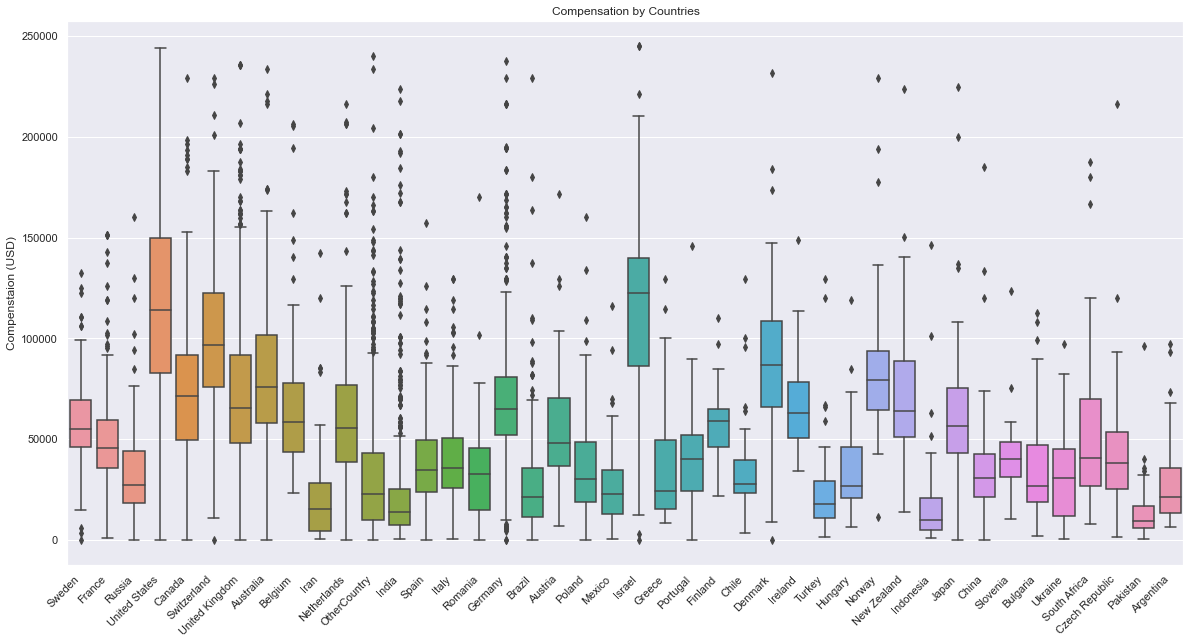

In [17]:
# EDA - Distribution of Employment Type and Compensation By Countries
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y='ConvertedCompYearly', x='Country', 
                 data=master_clean 
                 #palette="colorblind",
                 #hue='Employment'
           )
plt.title('Compensation by Countries')
plt.ylabel('Compenstaion (USD)')
plt.xlabel('')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

**Comment:**
- The Boxplot of compensation by countries show that US and Israel have higher expected salaries than the other countries with average values above \$110K. Additionally, we see that salaries in Israel and the US have some of the highest variance of compensation among all countries in the data set
- Developed EU countries mostly have average salary between \\$50K and \$100K
- Countries having less than 30 records were grouped in the `OtherCountry` group, these countries had a mean salary around \$25K

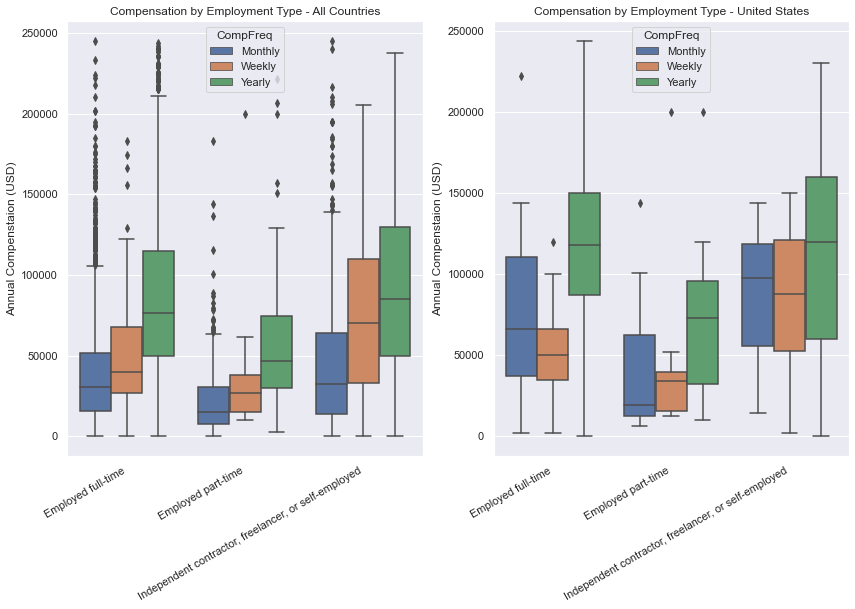

In [18]:
## EDA - Distribution of Employment Type and Compensation 
# Compensation by Reported CompFreq types
sort_data = master_clean.sort_values(['Employment', 'CompFreq'])
usa_master = sort_data[sort_data['Country']=='United States']

# All Countries
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
plt.subplot(1, 2, 1)
ax[0] = sns.boxplot(y='ConvertedCompYearly', x='Employment', 
                 data=sort_data, 
                 #palette="colorblind",
                 hue='CompFreq'
           )
ax[0].set_title('Compensation by Employment Type - All Countries')
ax[0].set_ylabel('Annual Compenstaion (USD)')
ax[0].set_xlabel('')
plt.setp(ax[0].get_xticklabels(), rotation=30, ha='right')

# United States
plt.subplot(1, 2, 2)
ax[1] = sns.boxplot(y='ConvertedCompYearly', x='Employment', 
                 data=usa_master, 
                 #palette="colorblind",
                 hue='CompFreq'
           )
ax[1].set_title('Compensation by Employment Type - United States')
ax[1].set_ylabel('Annual Compenstaion (USD)')
ax[1].set_xlabel('')
plt.setp(ax[1].get_xticklabels(), rotation=30, ha='right')

plt.show()

In [19]:
master_clean.Employment.value_counts()

Employed full-time                                      7185
Independent contractor, freelancer, or self-employed     729
Employed part-time                                       417
Name: Employment, dtype: int64

In [20]:
master_clean.CompFreq.value_counts()

Yearly     5003
Monthly    3136
Weekly      192
Name: CompFreq, dtype: int64

**Comment:**
- Most observations are employed full-time positions (86%). However a small portion of the dataset (5%) is employed part-time with the remaining 9% coming from contractors, freelancers, or self-employed respondents.
- We see from the boxplot of compensation by employment type that annual compensation does not vary dramatically between full-time and independent contractors. On the other hand, part time employees, on average, make approximately half of what full time employees earn. Additionally, we are missing hourly wages which would allow us to make a more apples to apples comparison.
- The survey format allows respondents to report their compensation in either weekly, monthly or annual increments represented by the `CompFreq` variable, these values are then converted into annual compensation in USD represented by the `ConvertedCompYearly` variable. We notice that respondents who reported their salary in annual increments tend to have a higher annual compensation than people who reported a weekly or monthly compensation frequency. This is unusual and could impact our models perfomance. To better account for any differences caused by the reporting increment, we decided to include `CompFreq` as a variable in our model. 
- The observed differences between annual salaries and weekly/monthly salaries could be attributed to a host of reasons like including their bonus pay in their annual compensation, or the annual compensation could be a reflection of gross pay whereas weekly or monthly compensation may be net take home pay. Alternatively, annual salary inputs could simply be wrong, as most of our outliers (i.e. compensation above \\$250K or below \$10K) come from this category. 

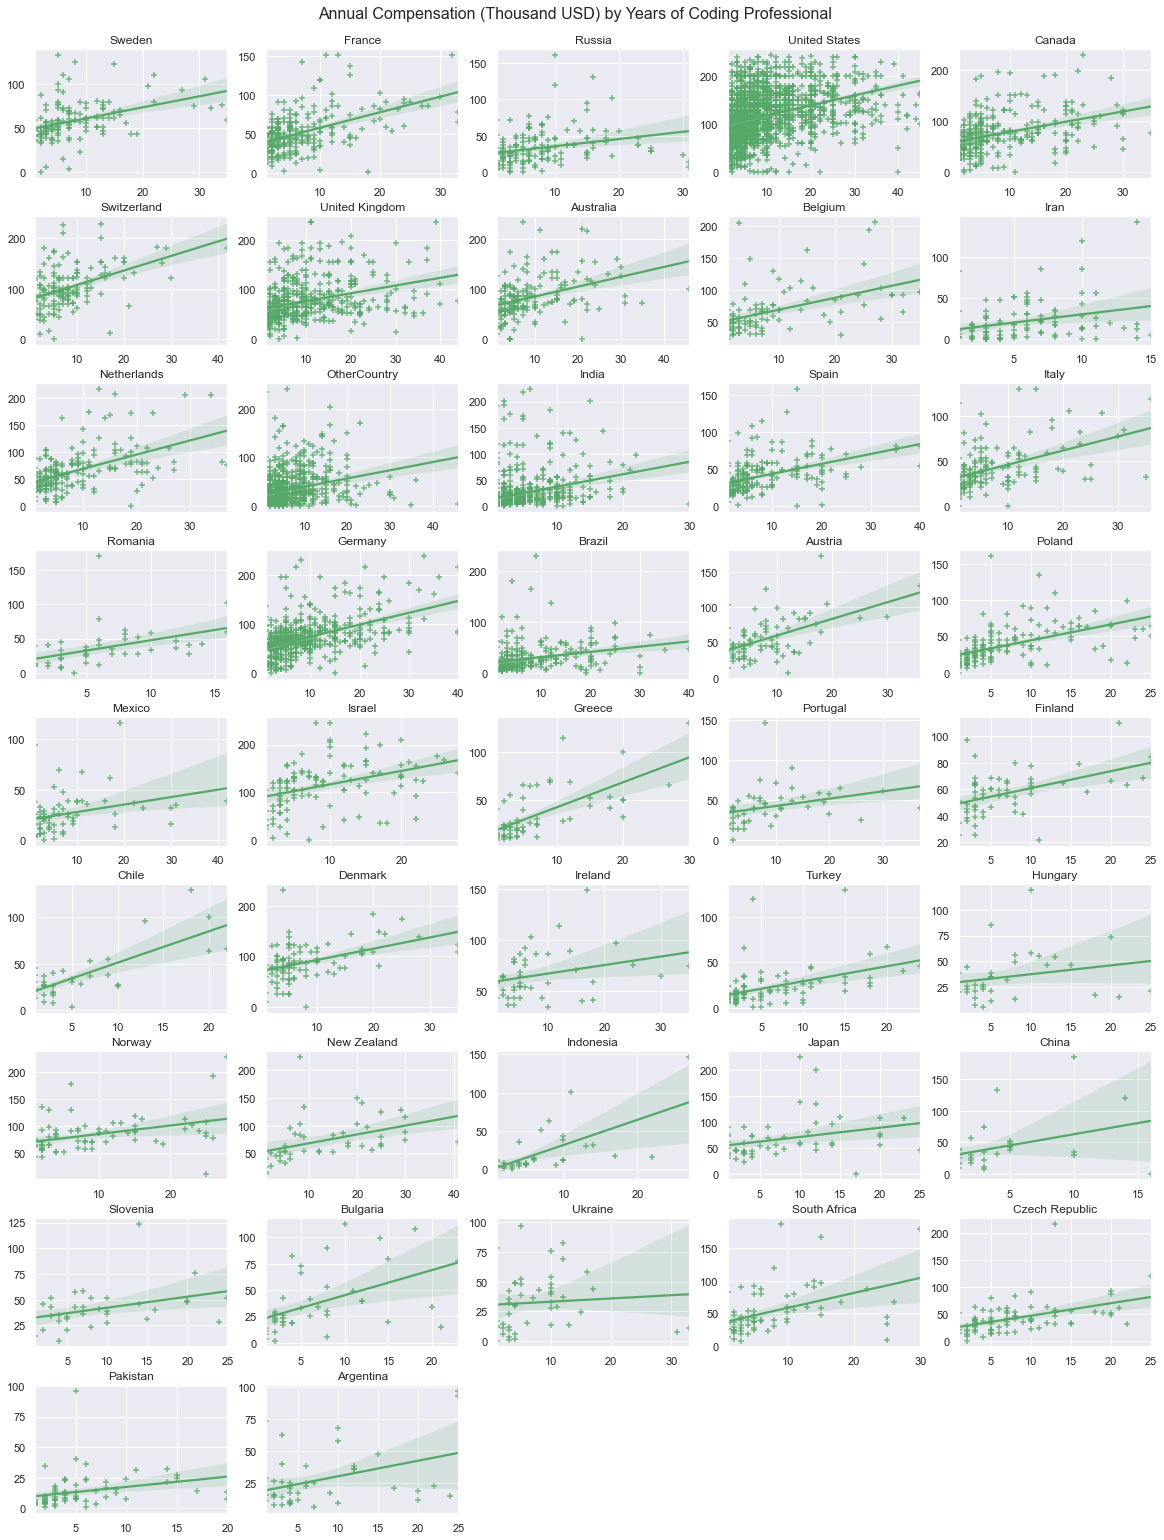

In [21]:
# EDA Compensation by Years of Coding Professional by Countries
fig = plt.figure(figsize=(20,30))
plt.suptitle('Annual Compensation (Thousand USD) by Years of Coding Professional', size=16, y = 0.9)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
i = 1
for idx, label in enumerate(master_clean.Country.unique()):
    plt.subplot(10, 5, i)
    subset = master_clean[master_clean.Country == label]
    sns.regplot(y=subset.ConvertedCompYearly/1000, x=subset.YearsCodePro, color='g', marker='+')
    plt.title(label)
    plt.ylabel('')
    plt.xlabel('')
    i += 1

**Comment:**
- There is an observed positive correlation between the number of years of professional coding experience and compensation for all countries. This is aligned with our expectations as we expect someone with more experience coding to be able to command a higher salary.
- Compensation data versus years of professional coding in the US is very noisy, especially for observations with coding experience between 1-10 years experience with salaries ranging from \$10K - 250K. This is likely a situation where our lack of additional data granularity like state or metropolitan area would improve our understanding of the data and reduce the noise.

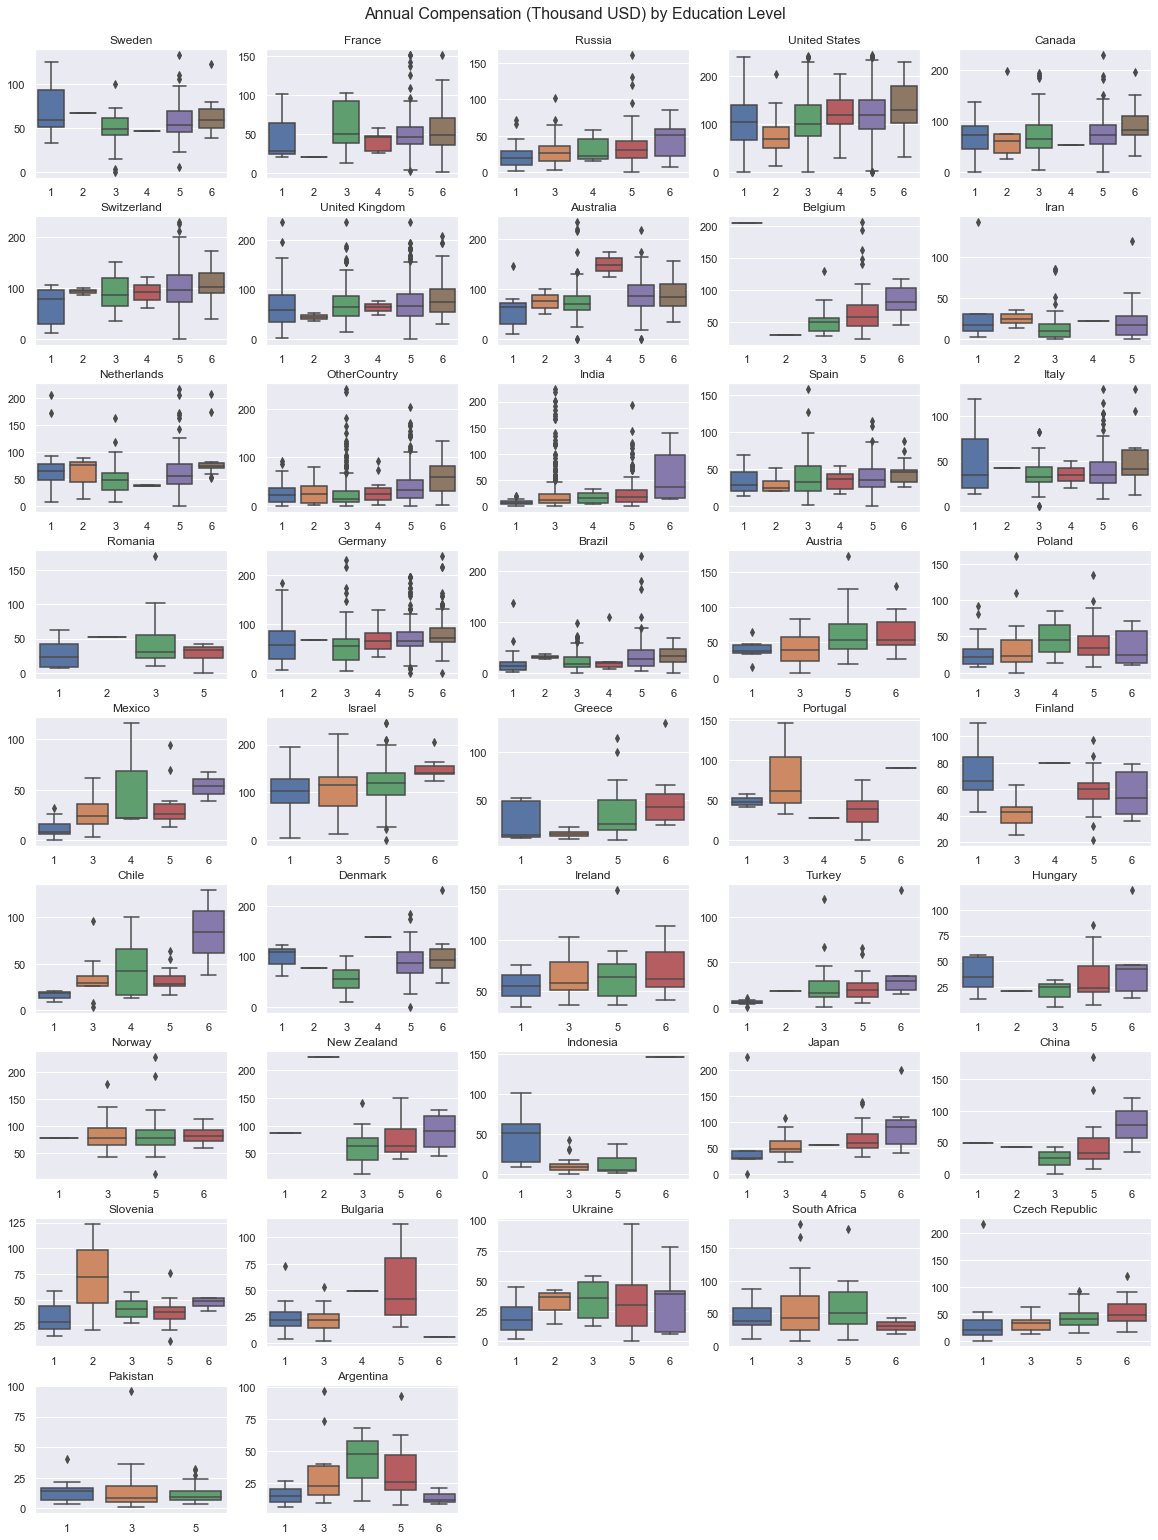

In [209]:
# EDA Compensation by Education Level by Countries
fig = plt.figure(figsize=(20,30))
plt.suptitle('Annual Compensation (Thousand USD) by Education Level', size=16, y = 0.9)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
i = 1
for idx, label in enumerate(master_clean.Country.unique()):
    plt.subplot(10, 5, i)
    subset = master_clean[master_clean.Country == label]
    sns.boxplot(y=subset.ConvertedCompYearly/1000, x=subset.ed_ordinal)
    plt.title(label)
    plt.ylabel('')
    plt.xlabel('')
    i += 1

## Reference:    
# 1 - less than college or not reported
# 2 - Associate degree
# 3 - Bachelor degree
# 4 - Professional degree
# 5 - Master degree
# 6 - Doctor & up

**Comment:**
- For most countries, there appears to be a positive correlation between compensation and higher levels of education. Once again, we are limited in our inferences because of how the data was formatted. Rather than generating ordinal categorical variables based on reported degrees earned, it would have been better to model education levels based on a discrete variable indicating the number of years of education received as the specificity of that variable might improve our understanding of the relationship between education and compensation.
- One other area we are lacking in education, is field of study. Knowing that what the observations earned their degrees in may help us better predict earning power as a data scientist.

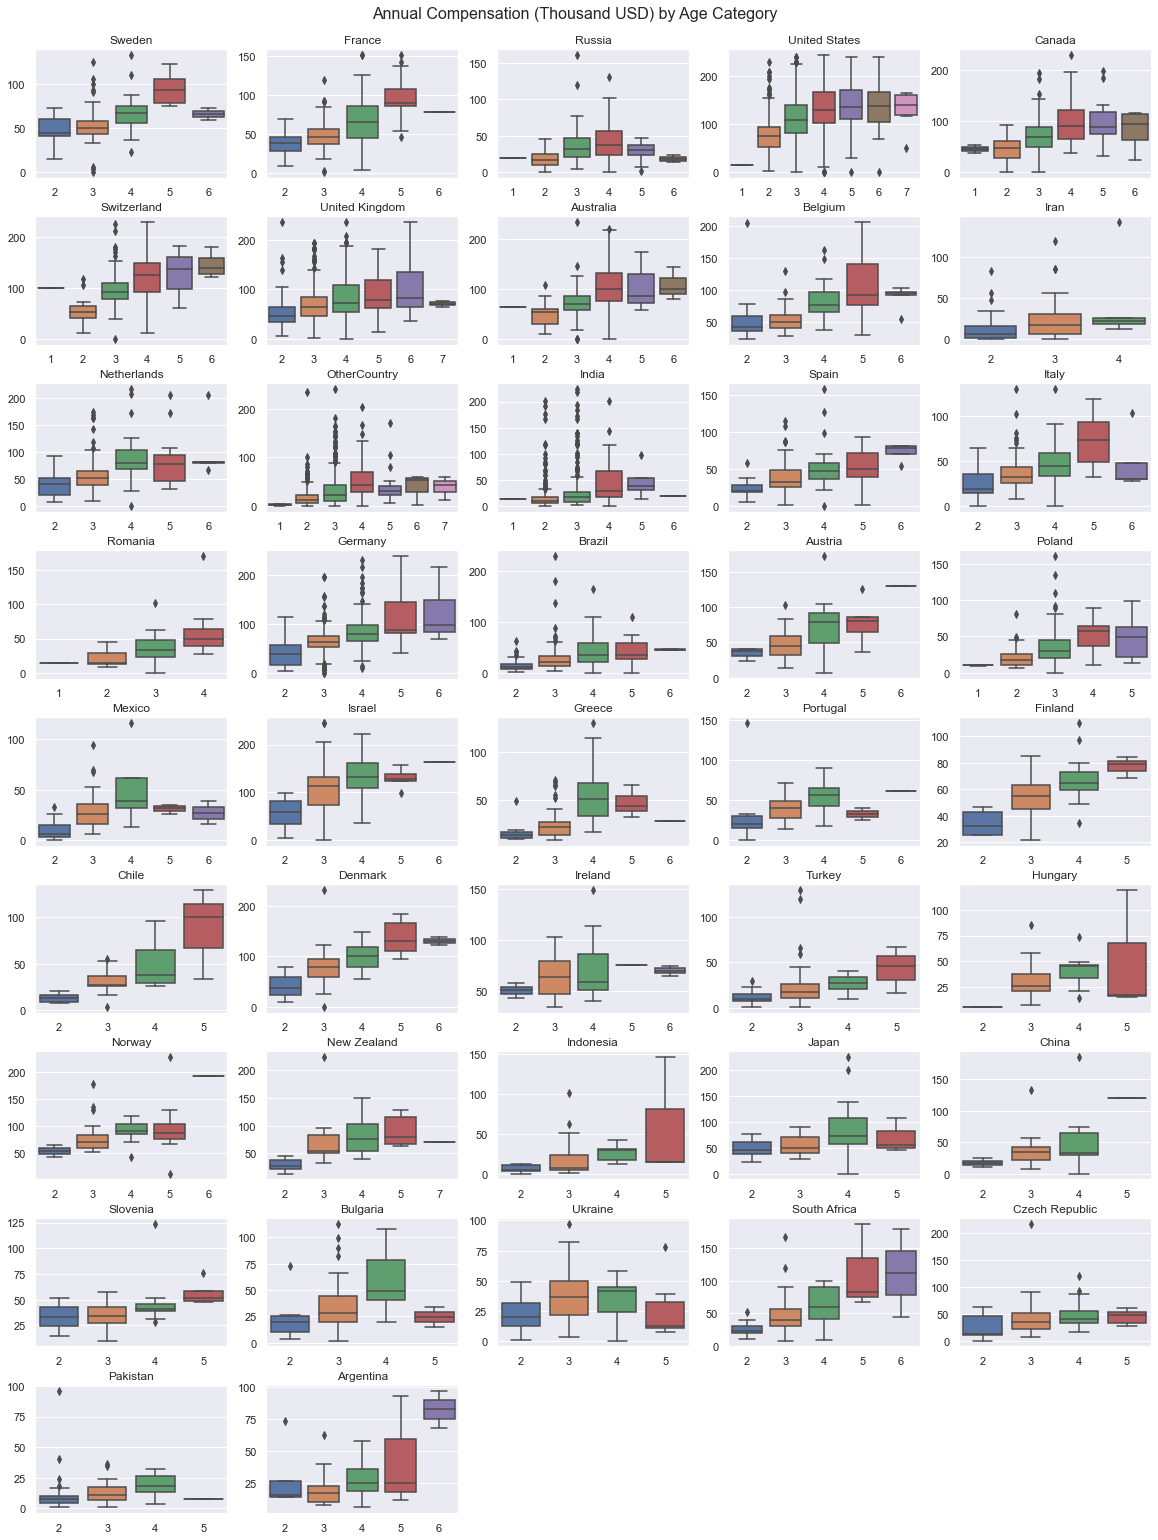

In [25]:
# EDA Compensation by Age By Countries
fig = plt.figure(figsize=(20,30))
plt.suptitle('Annual Compensation (Thousand USD) by Age Category', size=16, y = 0.9)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
i = 1
for idx, label in enumerate(master_clean.Country.unique()):
    plt.subplot(10, 5, i)
    subset = master_clean[master_clean.Country == label]
    #sns.regplot(y=subset.ConvertedCompYearly/1000, x=subset.Age, color='g', marker='+')
    sns.boxplot(y=subset.ConvertedCompYearly/1000, x=subset.Age)
    plt.title(label)
    plt.ylabel('')
    plt.xlabel('')
    i += 1

## Reference:    
# 1 - < 18 years old
# 2 - 18-24 years old
# 3 - 25-34 years old
# 4 - 35-44 years old
# 5 - 45-54 years old
# 6 - 55-64 years old
# 7 - >= 65 years old

**Comment:**
- We observe a positive correlaton between age and compensation for all countries in the data set.

Summary of Ethnicity after grouping:
white       5218
asian       1155
hispanic    1103
biracial     448
mideast      284
black        123
Name: Ethnicity_summary, dtype: int64


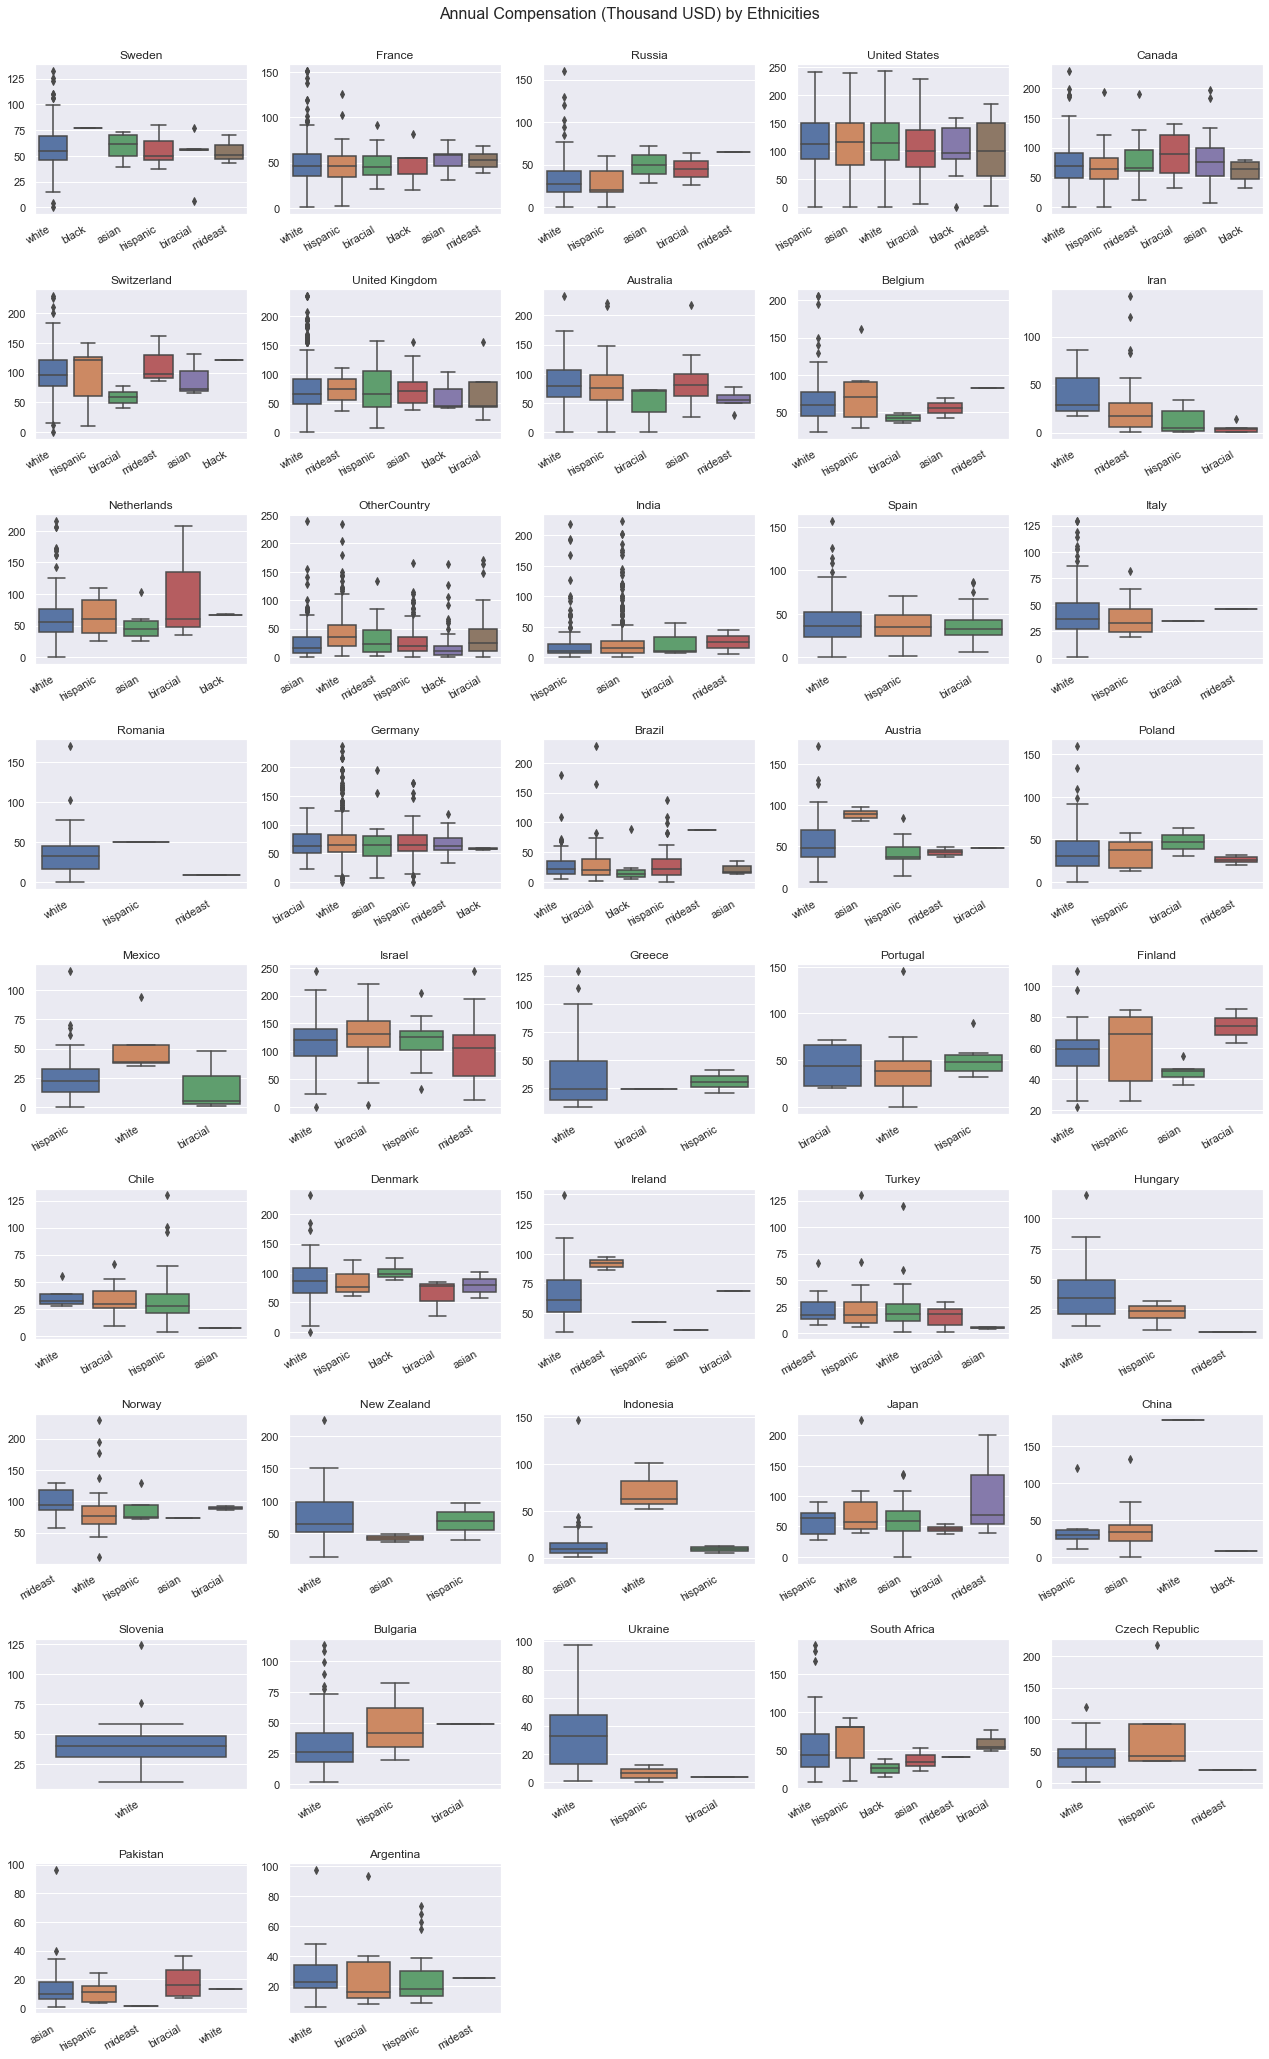

In [26]:
# EDA Compensation by Ethnicity by Countries
def ethnicity_summary(data):
    df = data.copy()
    df['Ethnicity_summary'] = np.where(df.white + df.asian + df.black + df.mideast + df.hispanic > 1, 'biracial',
                                       np.where(df.white == 1, 'white',
                                               np.where(df.asian == 1, 'asian',
                                                       np.where(df.black == 1,'black',
                                                               np.where(df.mideast == 1, 'mideast','hispanic')))))
    return df

master_clean_ethnicity = ethnicity_summary(master_clean)
print('Summary of Ethnicity after grouping:')
print(master_clean_ethnicity.Ethnicity_summary.value_counts())

# Plotting
fig = plt.figure(figsize=(22,40))
plt.suptitle('Annual Compensation (Thousand USD) by Ethnicities', size=16, y = 0.9)
fig.subplots_adjust(hspace=0.5, wspace=0.2)
i = 1
for idx, label in enumerate(master_clean_ethnicity.Country.unique()):
    plt.subplot(10, 5, i)
    subset = master_clean_ethnicity[master_clean_ethnicity.Country == label]
    ax = sns.boxplot(y=subset.ConvertedCompYearly/1000, x=subset.Ethnicity_summary)
    plt.title(label)
    plt.ylabel('')
    plt.xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
    i += 1


**Comment:**
- Surprisingly, ethnicity does not appear to be strongly correlated with compensation either within diverse countries like the US or in more ethnically homogeneous countries like Sweden. We also observe that the ethnicity of our respondents is heavily skewed to white representing 62.6% of our population. The second and third most reported ethnicities (Asian and Hispanic) represent only 13.9% and 13.2% of our population respectively.
- In order to handle respondents who reported themselves as belonging to multiple racial groups, we one hot encoded each of the ethnic groups into their own categories to allow for multiple categories to be selected for a given observation.

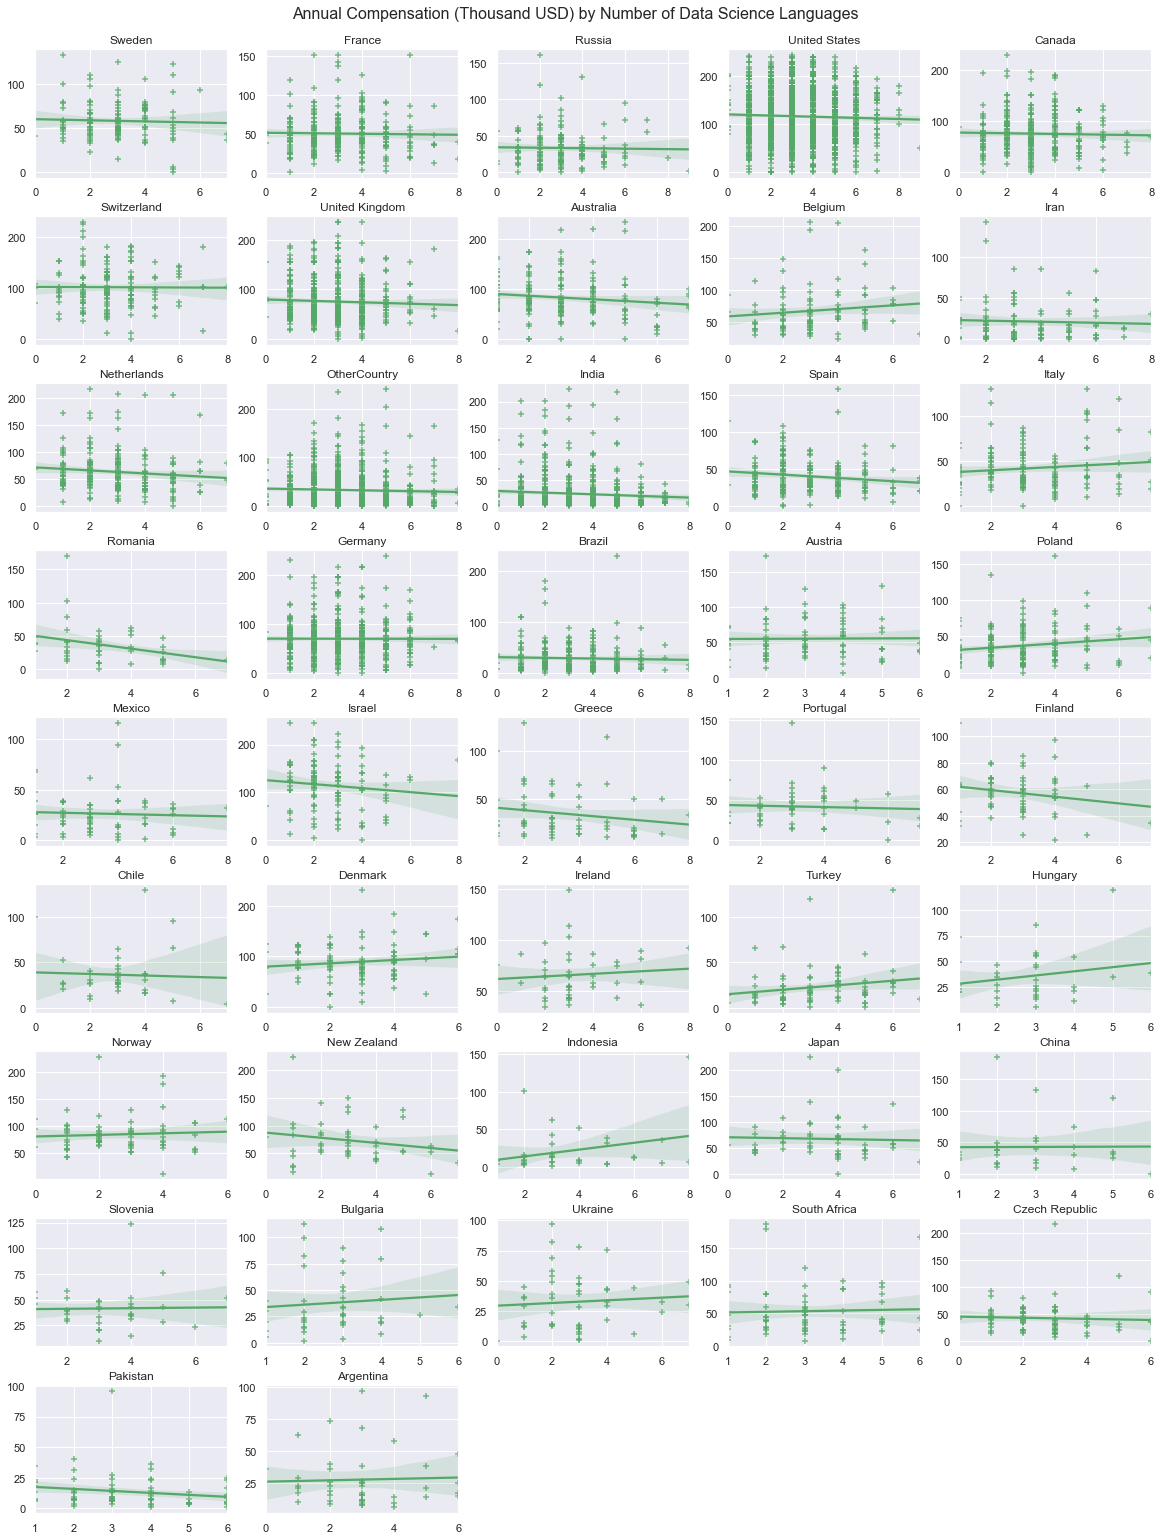

In [27]:
# EDA Compensation by Number of Data Science Languages by Countries
fig = plt.figure(figsize=(20,30))
plt.suptitle('Annual Compensation (Thousand USD) by Number of Data Science Languages', size=16, y = 0.9)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
i = 1
for idx, label in enumerate(master_clean.Country.unique()):
    plt.subplot(10, 5, i)
    subset = master_clean[master_clean.Country == label]
    sns.regplot(y=subset.ConvertedCompYearly/1000, x=subset.language_DS, color='g', marker='+')
    plt.title(label)
    plt.ylabel('')
    plt.xlabel('')
    i += 1
    
## Reference - top 10 most common languages for data scientist
# Define a language as Data Science language when they are in the following group
# 'C', 'C++', 'Java', 'JavaScript', 'Julia', 'Matlab','Python', 'R', 'SQL'

**Comment:**
- We observe no strong correlation between compensation and the quantity of known coding languages by a respondent for most countries. In fact, for some countries, like the US, knowing more coding languages is actually correlated with smaller compensation. This could either be a situation where specialization is more important (i.e. mastering one language is more important than knowledge in many languages) or there could be persistant issues in how respondents reported their knowledge. Additional information we would like to have here would be some measure of mastery of a given language.
- Most respondents claim to know between 1 and 5 different languages.

### 4.2. Skills Distribution

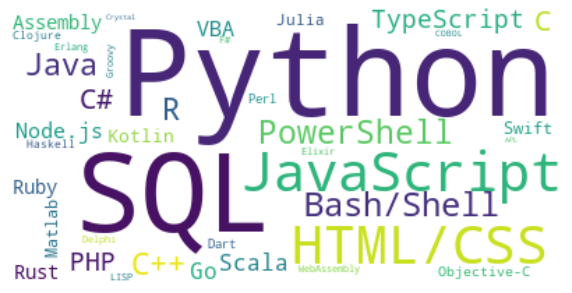

In [28]:
# Show the word cloud of LanguageHaveWorkedWith   
show_texts('LanguageHaveWorkedWith', master_clean)

In [29]:
# Show top 10 Language & their counts 
show_distribution('LanguageHaveWorkedWith', master_clean).head(10)

language_names counts
0         Python   7044
1            SQL   4895
2     JavaScript   4038
3       HTML/CSS   3764
4     Bash/Shell   3619
5     PowerShell   2959
6           Java   2587
7              R   2482
8            C++   2362
9              C   1738

**Comment:**
- The most common languages are Python & SQL.
- We grouped the languages into the following categories and aggregated the total number of languages a person knows into each group:
    - Data Science Languages: 'C', 'C++', 'Java', 'JavaScript', 'Julia', 'Matlab','Python', 'R', 'SQL'
    - Command Line: 'Bash/Shell', 'PowerShell'
    - Web Development: 'HTML/CSS', 'PHP', 'Node.js','.NET'

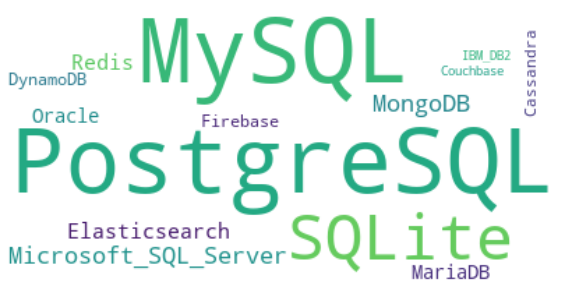

In [30]:
# Show the word cloud of DatabaseHaveWorkedWith  
show_texts('DatabaseHaveWorkedWith', master_clean)

In [31]:
# Show top 10 DataBase & their counts 
show_distribution('DatabaseHaveWorkedWith', master_clean).head(10)

language_names counts
0            PostgreSQL   3579
1                 MySQL   3494
2                SQLite   2757
3  Microsoft_SQL_Server   2210
4               MongoDB   2129
5                 Redis   1465
6         Elasticsearch   1433
7                Oracle   1197
8               MariaDB   1063
9              Firebase    680

**Comment:**
- The most common databases that respondents have worked with are PostgreSQL and MySQL.
- We've grouped the databases into the following categories:
    - SQL Database: 'IBM_DB2', 'MariaDB', 'Microsoft_SQL_Server', 'MySQL', 'Oracle', 'PostgreSQL', 'SQLite'
    - NoSQL Database: 'Cassandra', 'Couchbase', 'DynamoDB', 'Elasticsearch', 'Firebase', 'MongoDB', 'Redis'
- More respondents are familiar with SQL Dabatase than NoSQL Database. More data around these types of differences would potentially allow us to make a statement about the value of niche languages and skills, however, as previously discussed, we see little evidence in our data of a relationship between skills and compensation.

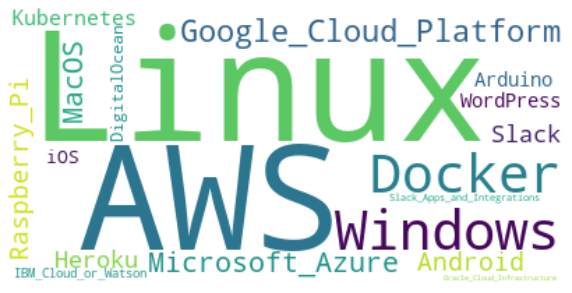

In [32]:
# Show the word cloud of PlatformHaveWorkedWith  
show_texts('PlatformHaveWorkedWith', master_clean)

In [33]:
# Show top 10 Platform & their counts 
show_distribution('PlatformHaveWorkedWith', master_clean).head(10)

language_names counts
0                  Linux   3774
1                    AWS   3200
2                Windows   2662
3                 Docker   2372
4  Google_Cloud_Platform   1926
5        Microsoft_Azure   1471
6                  MacOS   1433
7           Raspberry_Pi   1011
8                Android    978
9                  Slack    856

**Comment:**
- The most common platform that respondents have worked with are AWS and Docker (excluding OS platform)
- We grouped the platforms into the following categories:
    - Cloud computing: 'AWS', 'DigitalOcean', 'Google_Cloud_Platform', 'Heroku', 'IBM_Cloud_or_Watson', 'Microsoft_Azure', 'Oracle_Cloud_Infrastructure'
    - Electronic platform: 'Arduino', 'Raspberry_Pi'
    - Container platform: 'Docker', 'Kubernetes'

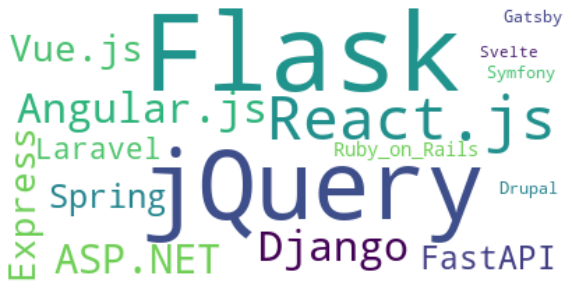

In [34]:
# Show the word cloud of WebframeHaveWorkedWith 
show_texts('WebframeHaveWorkedWith', master_clean)

In [35]:
# Show top 10 WebFrame & their counts 
show_distribution('WebframeHaveWorkedWith', master_clean).head(10)

language_names counts
0          Flask   1482
1         jQuery    960
2       React.js    942
3         Django    874
4     Angular.js    682
5        ASP.NET    517
6        Express    476
7         Vue.js    473
8         Spring    353
9        FastAPI    324

**Comment:**
- The most common web framework that respondents have worked with is Flask.
- All of the above tools were grouped into the total number of web frameworks a respondent knows. 

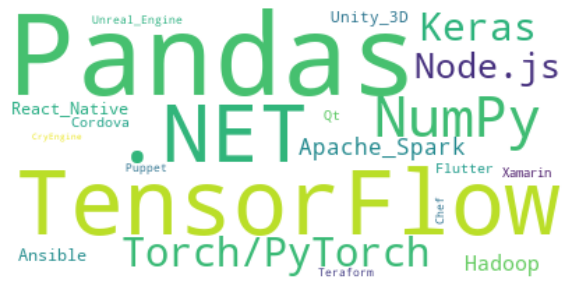

In [36]:
# Show the word cloud of MiscTechHaveWorkedWith
show_texts('MiscTechHaveWorkedWith', master_clean)

In [37]:
# Show top 10 MiscTech & their counts 
show_distribution('MiscTechHaveWorkedWith', master_clean).head(10)

language_names counts
0         Pandas   4798
1     TensorFlow   3401
2          NumPy   2004
3  Torch/PyTorch   1868
4          Keras   1570
5        Node.js   1486
6           .NET   1448
7   Apache_Spark   1402
8         Hadoop   1042
9   React_Native    453

**Comment:**
- The most common 'other tools' that respondents have worked with are Pandas and TensorFlow.
- We've grouped the tools into the following categories:
    - Machine Learning tools: 'Apache_Spark', 'Keras','TensorFlow', 'Torch/PyTorch'
    - App & UI development tools: 'Dart', 'Ansible', 'Cordova', 'CryEngine', 'Flutter', 'Qt', 'React_Native', 'Unity_3D', 'Unreal_Engine', 'Xamarin'
    - Server & distribution configuration tools: 'Chef', 'Hadoop', 'Puppet', 'Teraform'

### 4.3.  Compensation and Primary Features Distribution

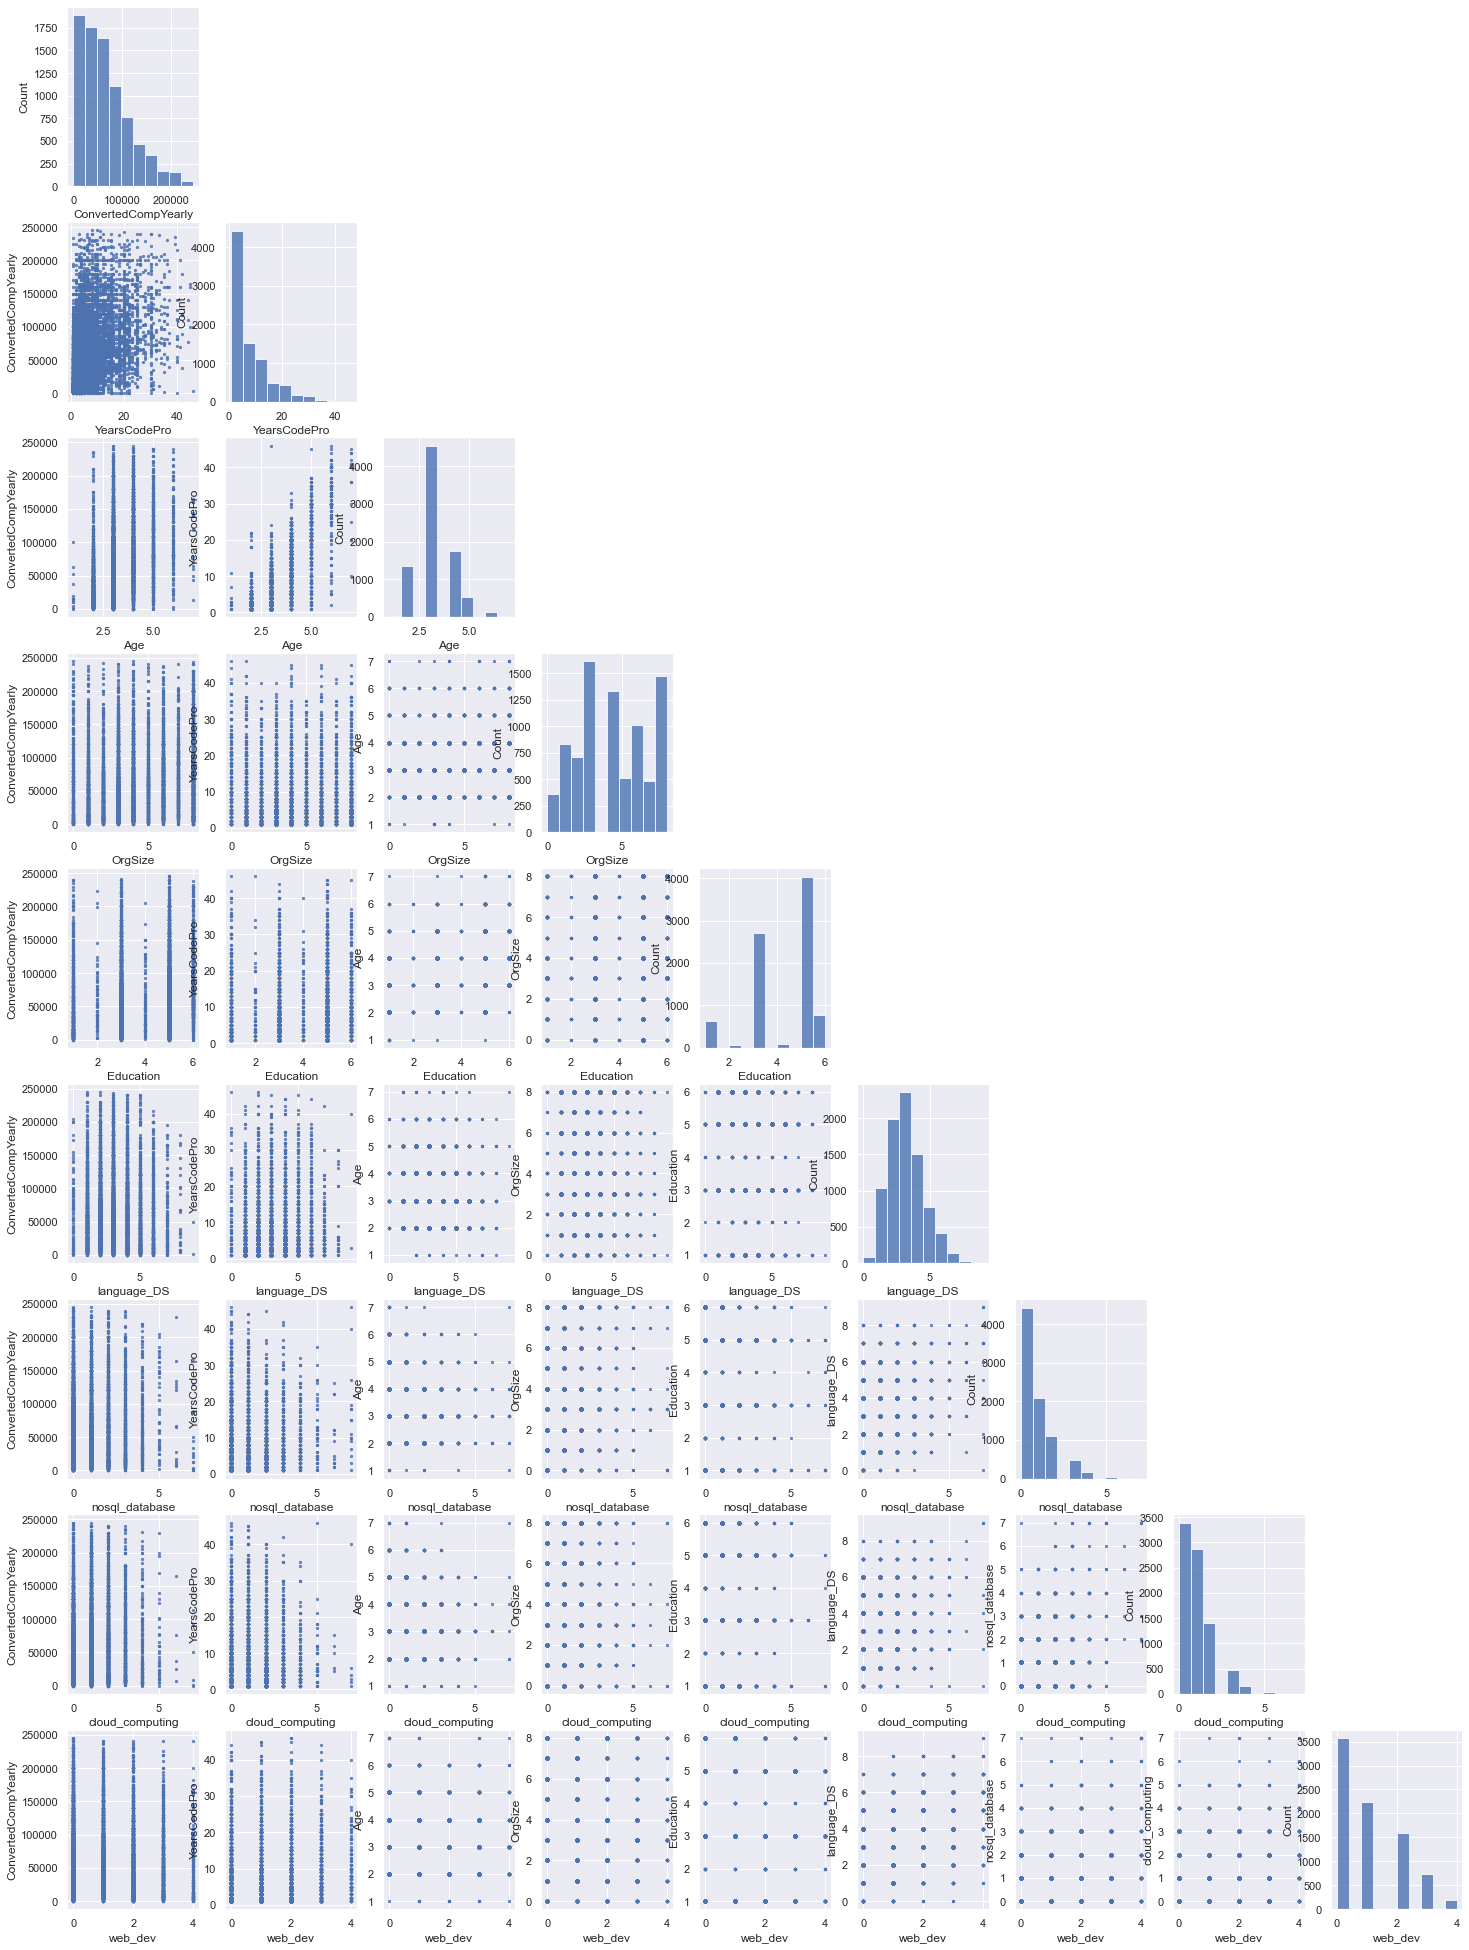

In [22]:
# Correlation of some variables - All Countries
df = master_clean.copy()
df['Log_Compensation'] = np.log(df['ConvertedCompYearly'])
df.rename(columns = {'ed_ordinal':'Education'}, inplace = True)
features = ['ConvertedCompYearly','YearsCodePro','Age','OrgSize','Education','language_DS','nosql_database','cloud_computing','web_dev']
scatterplotmatrix(df[features].values, names=features, figsize=(25,35), alpha=0.8, s=5);

**Comment:**
- The distribution for compensation value has right skew with most of the respondents reporting an annual compensation of below \\$100K, with very few records above \$150K. This imbalance could negatively impact the performance of our models leading to predictions of higher salaries being prone to low accuracy and large confidence intervals.
- More than 50% of respondents have less than 5 years of professional coding.
- More than 50% of respondents have a master degree (Education=5).
- The average age is between 25-34 years old (age=3)
- The average number of data science languages that a respondent reports knowing is 3 languages.
- There is no strong correlation between compensation and any of the features above, and compensation looks moderately linear. The spread of compensation against values of the listed features indicates that our data may be lacking in statistical power and predicting compensation may be very challenging.

<hr style="border:2px solid gray"> </hr>

## Step 5: Model data
### 5.1. All countries data 

In [118]:
# Define Features Matrix for all countries
X = pd.concat((master_clean.iloc[:,[1,7,9,13]], master_clean.iloc[:,24:]), axis=1)
print('Feature Dimension:', X.values.shape)
X.head()

Feature Dimension: (8331, 75)


OrgSize  Age1stCode  YearsCodePro  Age  language_DS  language_others  \
0        2           2             4    3            2                0   
1        2           2             2    3            2                0   
2        3           2             3    3            3                0   
3        8           2             5    3            3                2   
4        5           1             8    4            2                0   

   command_line  web_dev  sql_database  nosql_database  cloud_computing  \
0             0        0             1               0                0   
1             0        0             1               0                0   
2             1        1             1               0                1   
3             1        2             3               0                3   
4             0        1             0               1                1   

   elec_platform  container_platform  web_framework  ML_tools  app_UI_dev  \
0              0                   0              0         3           0   
1              0                   0              0         4           0   
2              0                   0              3         1           0   
3              0                   0              1         0           0   
4              0                   0              1         3           0   

   server_dist_config  man  woman  sexualitycat  transbin  ed_ordinal  employ  \
0                   0    1      0             0         0           5       1   
1                   0    1      0             1         0           5       1   
2                   0    1      0             0         0           4       1   
3                   0    1      0             0         0           3       1   
4                   0    1      0             0         0           6       1   

   employ_parttime  white  asian  black  mideast  hispanic  biracial  2020  \
0                0      1      0      0        0         0         0     0   
1                0      1      0      0        0         0         0     0   
2                0      1      0      0        0         0         0     0   
3                0      0      0      0        0         0         0     0   
4                0      1      0      0        0         0         0     0   

   2021  Argentina  Australia  Austria  Belgium  Brazil  Bulgaria  Canada  \
0     1          0          0        0        0       0         0       0   
1     1          0          0        0        0       0         0       0   
2     1          0          0        0        0       0         0       0   
3     1          0          0        0        0       0         0       0   
4     1          0          0        0        0       0         0       1   

   Chile  China  Czech Republic  Denmark  Finland  France  Germany  Greece  \
0      0      0               0        0        0       0        0       0   
1      0      0               0        0        0       1        0       0   
2      0      0               0        0        0       0        0       0   
3      0      0               0        0        0       0        0       0   
4      0      0               0        0        0       0        0       0   

   Hungary  India  Indonesia  Iran  Ireland  Israel  Italy  Japan  Mexico  \
0        0      0          0     0        0       0      0      0       0   
1        0      0          0     0        0       0      0      0       0   
2        0      0          0     0        0       0      0      0       0   
3        0      0          0     0        0       0      0      0       0   
4        0      0          0     0        0       0      0      0       0   

   Netherlands  New Zealand  Norway  Pakistan  Poland  Portugal  Romania  \
0            0            0       0         0       0         0        0   
1            0            0       0         0       0         0        0   
2            0            0       0         0       0      

In [119]:
# Define Target values and Target classification for all countries
y = master_clean[['ConvertedCompYearly','Comp_Bracket','Comp_Bracket_HML']]
print("Target dimension:", y.values.shape)
y.head()

Target dimension: (8331, 3)


ConvertedCompYearly  Comp_Bracket  Comp_Bracket_HML
0                51552             6                 2
1                38915             4                 2
2                22644             3                 1
3               130000            11                 3
4               151263            12                 3

<AxesSubplot:>

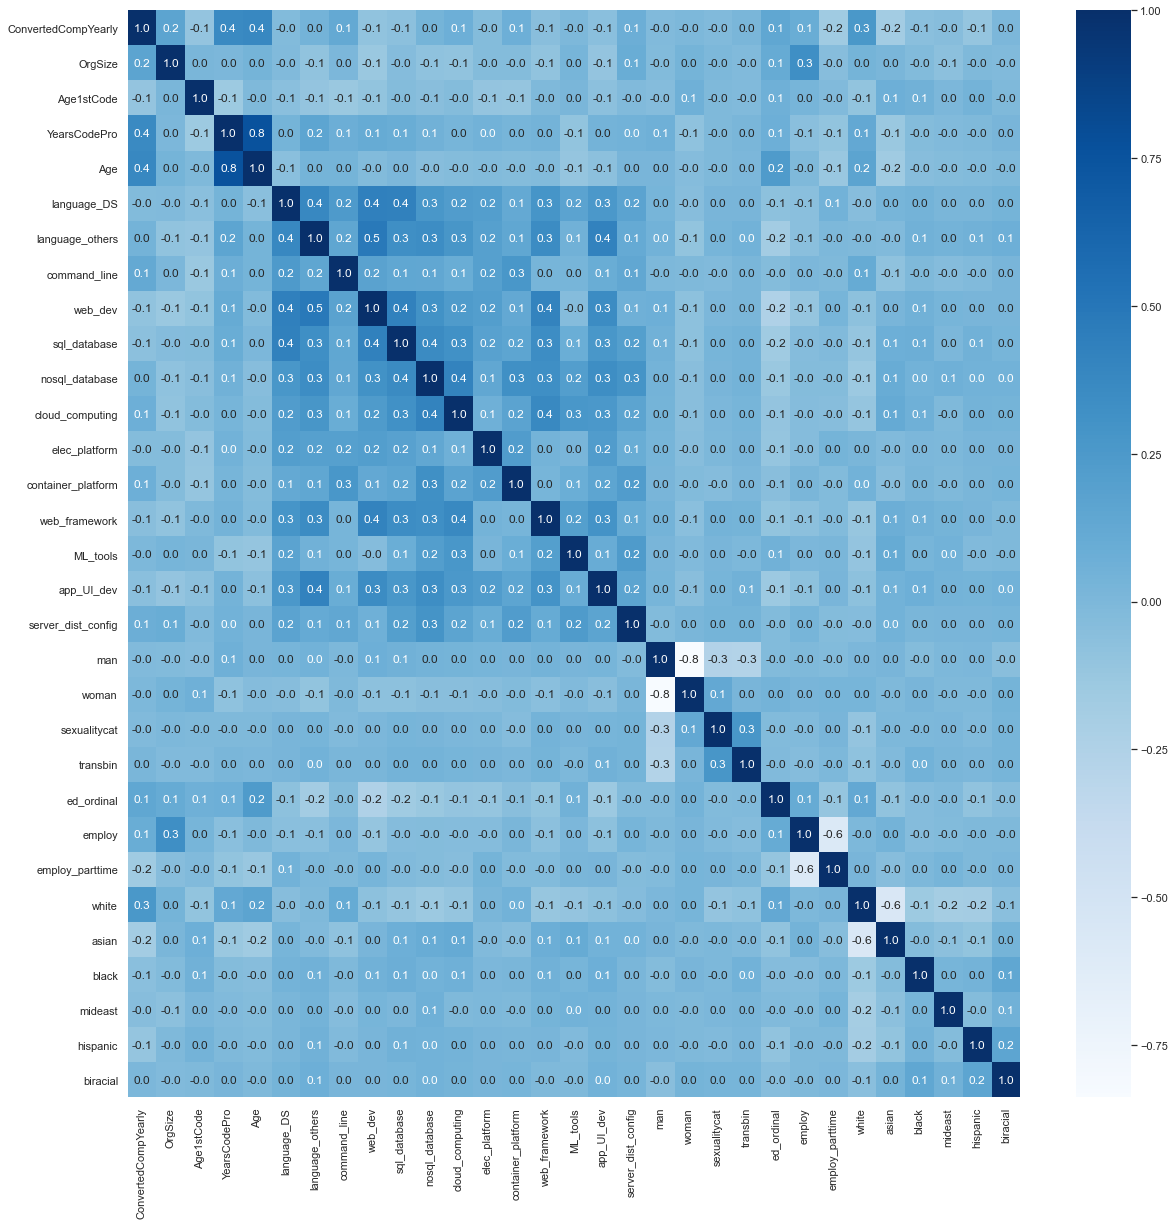

In [16]:
## Check Correlation Matrix of the Features and Target
corr_data = pd.concat((y.iloc[:,0], X.iloc[:,:30]), axis=1)
corr_matrix = corr_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.1f')
# Features with high correlation:
# 1. YearsCodePro and Age, corr=0.8
# 2. woman and man, corr=0.8
# 3. employ_parttime and employ_fulltime, corr=0.6
# 4. white and asian, corr=0.6

**Comment:**
- The correlation matrix between the target and the features (excluding countries) demonstrates that we do not have strong correlation between compensation and any of our chosen features as most of the correlations are below .2.
- The features with the strongest correlation with compensation are:
    - Number of years with professional coding experience: corr = 0.4
    - Age: corr = 0.4
    - Ethnicity is white: corr = 0.3
- There is no perfect colinearity between the features. 
- The highest correlation between features are expected:
    - Number of years with professional coding and Age: corr = 0.8
    - Employ part-time and employ full-time, corr = 0.6
    - White and asian, corr=0.6
- We will include these slightly correlated features in our model as they do not represent correlations strong enough for us to reject the assumption of perfect collinearity.

In [120]:
# Split data to training set, development set and test set
# Split test set
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X.values,y.values,
                                                            test_size=0.15,
                                                            random_state=0)
                                                            #stratify=y.values[:,1])
# Split train and dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev,y_train_dev,
                                                            test_size=0.1765,
                                                            random_state=0)
                                                            #stratify=y_train_dev[:,1])

print('Train Data Dimension:', X_train.shape)
print('Train Label Dimension:', y_train.shape)
print('Development Data Dimension:', X_dev.shape)
print('Development Label Dimension:', y_dev.shape)
print('Test Data Dimension:', X_test.shape)
print('Test Label Dimension:', y_test.shape)

Train Data Dimension: (5831, 75)
Train Label Dimension: (5831, 3)
Development Data Dimension: (1250, 75)
Development Label Dimension: (1250, 3)
Test Data Dimension: (1250, 75)
Test Label Dimension: (1250, 3)


In [121]:
# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_dev_std = sc.transform(X_dev)
X_test_std = sc.transform(X_test)

#### 5.2. US Only data 

In [122]:
# Define Features Matrix for just US Only
master_clean_US = master_clean.copy()
master_clean_US = master_clean_US[master_clean_US['Country'] == 'United States']
X_US = pd.concat((master_clean_US.iloc[:,[1,7,9,13]], master_clean_US.iloc[:,24:52]), axis=1)
print('Feature Dimension:', X_US.values.shape)
X_US.head()

Feature Dimension: (1971, 32)


OrgSize  Age1stCode  YearsCodePro  Age  language_DS  language_others  \
3         8           2             5    3            3                2   
5         3           2             1    3            3                1   
9         1           2             9    3            4                3   
19        8           0             6    4            2                0   
30        4           1            20    4            2                1   

    command_line  web_dev  sql_database  nosql_database  cloud_computing  \
3              1        2             3               0                3   
5              1        1             0               0                1   
9              0        0             1               2                1   
19             1        0             2               0                2   
30             1        2             2               0                1   

    elec_platform  container_platform  web_framework  ML_tools  app_UI_dev  \
3               0                   0              1         0           0   
5               0                   0              0         0           0   
9               0                   0              2         1           1   
19              0                   0              0         0           0   
30              0                   0              4         0           0   

    server_dist_config  man  woman  sexualitycat  transbin  ed_ordinal  \
3                    0    1      0             0         0           3   
5                    0    1      0             0         0           6   
9                    0    1      0             0         0           5   
19                   0    1      0             0         0           6   
30                   0    1      0             0         0           3   

    employ  employ_parttime  white  asian  black  mideast  hispanic  biracial  \
3        1                0      0      0      0        0         0         0   
5        1                0      0      1      0        0         0         0   
9        1                0      1      0      0        0         0         0   
19       1                0      1      0      0        0         0         0   
30       1                0      1      0      0        0         0         0   

    2020  2021  
3      0     1  
5      0     1  
9      0     1  
19     0     1  
30     0     1

In [123]:
# Define Target values and Target classification for just US Only
y_US = master_clean_US[['ConvertedCompYearly','Comp_Bracket','Comp_Bracket_HML']]
print("Target dimension:", y_US.values.shape)
y_US.head()

Target dimension: (1971, 3)


ConvertedCompYearly  Comp_Bracket  Comp_Bracket_HML
3                130000            11                 3
5                100000            10                 3
9                 70000             8                 2
19                90000             9                 2
30               130000            11                 3

In [124]:
# Split data to training set, development set and test set for just US Only
# Split test set
X_train_dev_US, X_test_US, y_train_dev_US, y_test_US = train_test_split(X_US.values, y_US.values,
                                                            test_size=0.15,
                                                            random_state=0)
# Split train and dev set
X_train_US, X_dev_US, y_train_US, y_dev_US = train_test_split(X_train_dev_US, y_train_dev_US,
                                                            test_size=0.1765,
                                                            random_state=0)

print('Train Data Dimension - US Only:', X_train_US.shape)
print('Train Label Dimension - US Only:', y_train_US.shape)
print('Development Data Dimension - US Only:', X_dev_US.shape)
print('Development Label Dimension - US Only:', y_dev_US.shape)
print('Test Data Dimension - US Only:', X_test_US.shape)
print('Test Label Dimension - US Only:', y_test_US.shape)

Train Data Dimension - US Only: (1379, 32)
Train Label Dimension - US Only: (1379, 3)
Development Data Dimension - US Only: (296, 32)
Development Label Dimension - US Only: (296, 3)
Test Data Dimension - US Only: (296, 32)
Test Label Dimension - US Only: (296, 3)


In [78]:
# Standardize the features for US Only
X_train_std_US = sc.fit_transform(X_train_US)
X_dev_std_US = sc.transform(X_dev_US)
X_test_std_US = sc.transform(X_test_US)

<hr style="border:2px solid gray"> </hr>

## Step 6: Model Training - Continuous Outcome Variable
### 6.1. Linear Regression

## Base Model - Linear Regression:

RMSE train: 31794.68
RMSE test: 30144.14

R2 Score train: 0.600
R2 Score test: 0.632

Adjusted R2 Score train: 0.595
Adjusted R2 Score test: 0.609


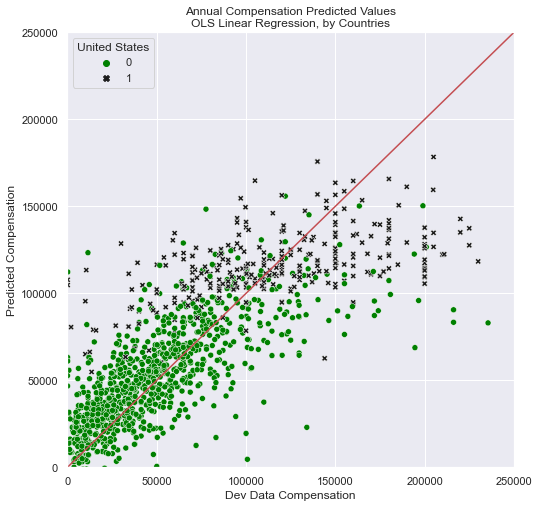

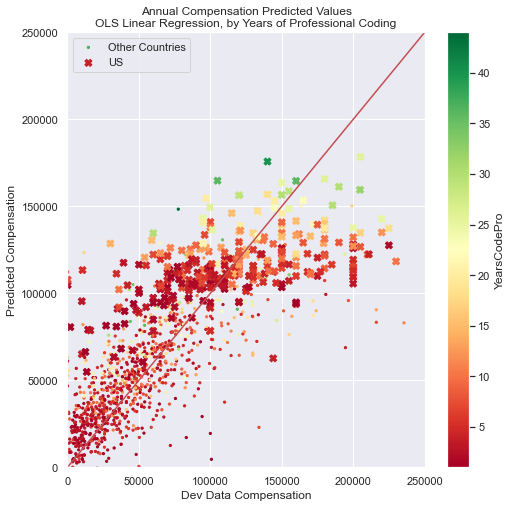

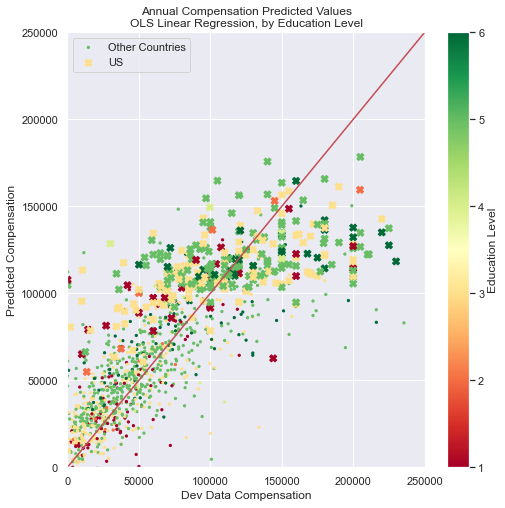

In [14]:
## Base Model - No transformation
# Base Model
lr = LinearRegression()
lr.fit(X_train, y_train[:,0])
y_train_pred = lr.predict(X_train)
y_dev_pred = lr.predict(X_dev)

# Function to print out Evaluation Result
def model_evaluation(X_train, y_train, y_train_pred, X_dev, y_dev, y_dev_pred):
    '''Display the evaluation result of the model'''
    # Root Mean Square Error
    # print('\nRMSE train: %.2f' %np.sqrt(mean_squared_error(np.log(y_train[:,0]), y_train_pred2)))
    print('\nRMSE train: %.2f' %np.sqrt(mean_squared_error(y_train[:,0], y_train_pred)))
    print('RMSE test: %.2f' %np.sqrt(mean_squared_error(y_dev[:,0], y_dev_pred)))

    # R-squared
    r2_train = r2_score(y_train[:,0], y_train_pred)
    r2_test = r2_score(y_dev[:,0], y_dev_pred)
    print('\nR2 Score train: %.3f' %r2_train)
    print('R2 Score test: %.3f' %r2_test)
    
    # Adjusted R-squared
    print('\nAdjusted R2 Score train: %.3f' %adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]))
    print('Adjusted R2 Score test: %.3f' %adjusted_r2(r2_test, X_dev.shape[0], X_dev.shape[1]))

# Function to calculate adjusted R-squared
def adjusted_r2(r2, n, p):
    '''Function to calculate adjusted r-squared from r-square, sample size and number of independent variables'''
    return 1-(1-r2)*(n-1)/(n-p-1)

# Function to plot predicted compensation and actual compensation
def plot_predictions(X_dev, y_dev, y_dev_pred, column_name, title):
    column_idx = X.columns.tolist().index(column_name)
    #fig = plt.figure(figsize=(8, 8))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(figsize=(8, 8))
    
    if column_idx in range(17) or column_idx==21:
        # Subset data for US
        US = [i for i in range(X_dev.shape[0]) if X_dev[i,-3] == 1]
        Others = [i for i in range(X_dev.shape[0]) if X_dev[i,-3] == 0]
        # Plot Continuous & Ordinal Column 
        # Plot Other Countries
        plt.scatter(y_dev[Others], y_dev_pred[Others], c=X_dev[Others,column_idx], 
                cmap="RdYlGn", s=20, alpha=1, marker='.', label='Other Countries',
                vmin=X_dev[:,column_idx].min(), vmax=X_dev[:,column_idx].max())
        # Plot US
        plt.scatter(y_dev[US], y_dev_pred[US], c=X_dev[US,column_idx], 
                cmap="RdYlGn", s=50, alpha=1, marker='X', label='US', edgecolors=None,
                vmin=X_dev[:,column_idx].min(), vmax=X_dev[:,column_idx].max())
        ax.legend()
        cbar = plt.colorbar(ax=ax)
        if column_name == 'ed_ordinal':
            column_name = 'Education Level'
        cbar.set_label(column_name)
    else:
        # Plot binary Column
        sns.scatterplot(y_dev, y_dev_pred, hue=X_dev[:,column_idx], style=X_dev[:,column_idx],
                       palette=['green','k'])
        ax.legend(title=column_name)

        
    ax.set_title("Annual Compensation Predicted Values\n" + title)
    ax.set_ylabel("Predicted Compensation")
    ax.set_xlabel("Dev Data Compensation")
    ax.set_ylim(0,250000)
    ax.set_xlim(0,250000)
    ax.plot(np.linspace(0,250000, 5),np.linspace(0,250000, 5), '-r')

    plt.show()

print('## Base Model - Linear Regression:')
model_evaluation(X_train, y_train, y_train_pred, X_dev, y_dev, y_dev_pred)
plot_predictions(X_dev, y_dev[:,0], y_dev_pred, column_name='United States', 
                 title='OLS Linear Regression, by Countries')    
plot_predictions(X_dev, y_dev[:,0], y_dev_pred, column_name='YearsCodePro', 
                 title='OLS Linear Regression, by Years of Professional Coding')
plot_predictions(X_dev, y_dev[:,0], y_dev_pred, column_name='ed_ordinal', 
                 title='OLS Linear Regression, by Education Level')

**Comment:**
- Our base model using OLS linear regression for the full data set (i.e. all countries and all features) achieved an R2 score of 0.632 and RMSE of $\pm$ 30,144.14 USD. 
- Comparing the predicted values on the development data versus the true values, we observe that the base model tended to predict compensation values lower than true compensation for observations where the true compensation was over \$150K. This could be due to the smaller sample size of observations with high compensation leading to an underfit model for high earners. This indicates that we should apply a log transformation to compensation to reduce the skew observed in the distribution.
- For US data, we observe that the base model tends to over-predict compensation for observations that reported earning less than \\$100K, and under perdicts when the observations reported earning more than \$150K. Later in this report, we will explore models on US only data to evaluate their performance to understand what advantages we can gain by focusing on the US sepearately. 
- Most observations with a reported salary greater than \$150K belong to the US.
- In the second and third plots, we observe that there is a weak relationship between both the number of years of professional coding and education level with our outcome variable as the observations don't appear to follow a clear trend.

## Linear Regression - Transform Compensation to Log scale Model:

RMSE train: 34173.49
RMSE test: 32153.94

R2 Score train: 0.528
R2 Score test: 0.495

Adjusted R2 Score train: 0.522
Adjusted R2 Score test: 0.463


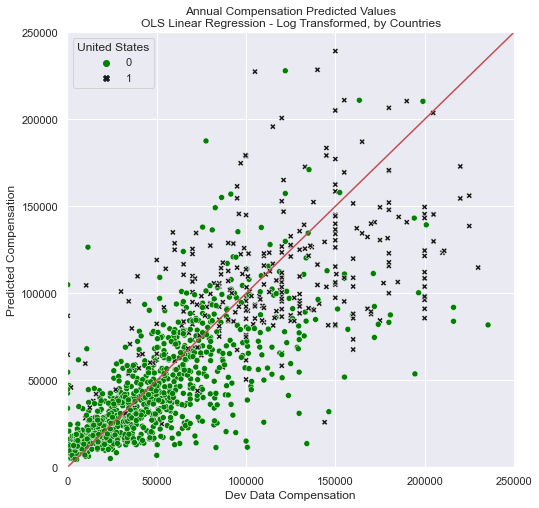

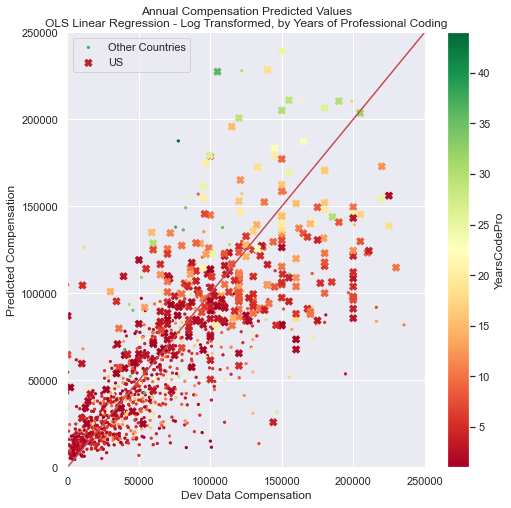

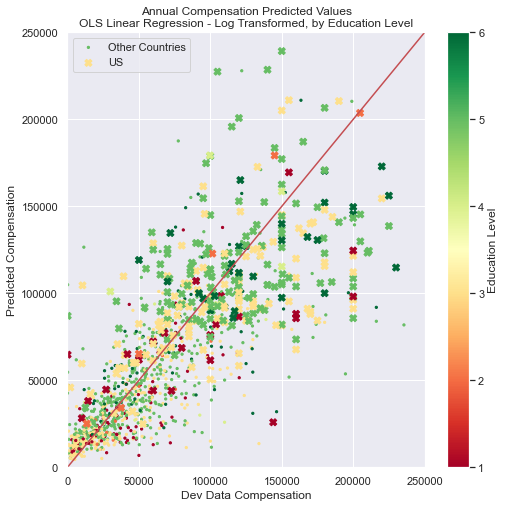

In [46]:
# Transform compensation to Log Scale
lr2 = LinearRegression()
lr2.fit(X_train, np.log(y_train[:,0]))
y_train_pred2 = lr2.predict(X_train)
y_dev_pred2 = lr2.predict(X_dev)

# Function print out Evaluationn for Log transform
def model_evaluation_log(X_train, y_train, y_train_pred, X_dev, y_dev, y_dev_pred):
    '''Display the evaluation result of the model'''
    # Root Mean Square Error
    # print('\nRMSE train: %.2f' %np.sqrt(mean_squared_error(np.log(y_train[:,0]), y_train_pred2)))
    print('\nRMSE train: %.2f' %np.sqrt(mean_squared_error(y_train[:,0], np.exp(y_train_pred))))
    print('RMSE test: %.2f' %np.sqrt(mean_squared_error(y_dev[:,0], np.exp(y_dev_pred))))

    # R-squared
    r2_train = r2_score(np.log(y_train[:,0]), y_train_pred)
    r2_test = r2_score(np.log(y_dev[:,0]), y_dev_pred)
    print('\nR2 Score train: %.3f' %r2_train)
    print('R2 Score test: %.3f' %r2_test)
    
    # Adjusted R-squared
    print('\nAdjusted R2 Score train: %.3f' %adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]))
    print('Adjusted R2 Score test: %.3f' %adjusted_r2(r2_test, X_dev.shape[0], X_dev.shape[1]))

print('## Linear Regression - Transform Compensation to Log scale Model:')
model_evaluation_log(X_train, y_train, y_train_pred2, X_dev, y_dev, y_dev_pred2)

# Plot Predictions Values
plot_predictions(X_dev, y_dev[:,0], np.exp(y_dev_pred2), column_name='United States', 
                 title='OLS Linear Regression - Log Transformed, by Countries')    
plot_predictions(X_dev, y_dev[:,0], np.exp(y_dev_pred2), column_name='YearsCodePro', 
                 title='OLS Linear Regression - Log Transformed, by Years of Professional Coding')
plot_predictions(X_dev, y_dev[:,0], np.exp(y_dev_pred2), column_name='ed_ordinal', 
                 title='OLS Linear Regression - Log Transformed, by Education Level')

**Comment:**
- Making a log transformation of compensation does slightly improve our predictions of salaries above \\$150K, however, our predictions are more spread out and ultimately this model has a lower accuracy than our base model. Linear regression with log transformed compensation is less accurate with a lower R2 score and a higher RMSE than the base model. 

### 6.2. Regression with Penalization
- In the following sections, we will build our linear regression models with L1 regularization (Lasso), L2 regularization (Ridge) and combined L1 and L2 as regularizer (ElasticNet). 
- The hyperparameters tuning will be conducted using GridSearchCV

In [47]:
## Ridge Regression
# Tuning parameters
alphas = {'alpha':[1e-10, 1e-6, 1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100, 1000]}
gs3 = GridSearchCV(Ridge(), param_grid=alphas, cv=5, scoring='r2')
gs3.fit(X_train, y_train[:,0])
y_train_pred3 = gs3.best_estimator_.predict(X_train)
y_dev_pred3 = gs3.best_estimator_.predict(X_dev)

# Evaluation
print('## Ridge Regression:')
print('\nBest alpha:', gs3.best_params_['alpha'])
print('Best estimator:', gs3.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred3, X_dev, y_dev, y_dev_pred3)

## Ridge Regression:

Best alpha: 2
Best estimator: Ridge(alpha=2)

RMSE train: 31799.25
RMSE test: 30161.06

R2 Score train: 0.600
R2 Score test: 0.632

Adjusted R2 Score train: 0.595
Adjusted R2 Score test: 0.609


In [48]:
## Lasso Regression
# Tuning parameters
alphas = {'alpha':[1e-10, 1e-6, 1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100, 1000]}
gs4 = GridSearchCV(Lasso(), param_grid=alphas, cv=5, scoring='r2')
gs4.fit(X_train, y_train[:,0])
y_train_pred4 = gs4.best_estimator_.predict(X_train)
y_dev_pred4 = gs4.best_estimator_.predict(X_dev)

# Evaluation
print('## LASSO Regression:')
print('\nBest alpha:', gs4.best_params_['alpha'])
print('Best estimator:', gs4.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred4, X_dev, y_dev, y_dev_pred4)

## LASSO Regression:

Best alpha: 10
Best estimator: Lasso(alpha=10)

RMSE train: 31803.16
RMSE test: 30144.72

R2 Score train: 0.600
R2 Score test: 0.632

Adjusted R2 Score train: 0.595
Adjusted R2 Score test: 0.609


In [49]:
## ElasticNet Regression
# Tuning parameters
# Combining l1 and l2 regularization
params = {'alpha':[1e-10, 1e-6, 1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100, 1000], 
          'l1_ratio':[0, 0.2, 0.5, 0.8, 1]}
gs5 = GridSearchCV(ElasticNet(), param_grid=params, cv=5, scoring='r2')
gs5.fit(X_train, y_train[:,0])
y_train_pred5 = gs5.best_estimator_.predict(X_train)
y_dev_pred5 = gs5.best_estimator_.predict(X_dev)

# Evaluation
print('## ElasticNet Regression:')
print('\nBest alpha:', gs5.best_params_['alpha'])
print('Best l1_ratio:', gs5.best_params_['l1_ratio'])
print('Best estimator:', gs5.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred5, X_dev, y_dev, y_dev_pred5)

## Observation
# l1_ration = 1 means it's equivalent to Lasso regression

## ElasticNet Regression:

Best alpha: 10
Best l1_ratio: 1
Best estimator: ElasticNet(alpha=10, l1_ratio=1)

RMSE train: 31803.16
RMSE test: 30144.72

R2 Score train: 0.600
R2 Score test: 0.632

Adjusted R2 Score train: 0.595
Adjusted R2 Score test: 0.609


**Comment:**
- There is no improvement of the model using regularization. This indicates that our linear regression model does not suffer from overfitting but rather suffers from underfitting.

### 6.4. Regression with Random Forest

In [15]:
# Regression Forest
# Tuning parameters number of trees, maximum depth of tree, min sample split
params = {'max_depth':[3, 10, 30, 50], 'min_samples_split':[5, 10, 20, 30],
          'min_samples_leaf':[3, 5], 'n_estimators':[50, 100, 150]}

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
gs6 = GridSearchCV(rf, param_grid=params, cv=5, scoring='r2')
gs6.fit(X_train,y_train[:,0])
y_train_pred6 = gs6.best_estimator_.predict(X_train)
y_dev_pred6 = gs6.best_estimator_.predict(X_dev)

# Evaluation
print('## Regression Forest:')
print('\nBest max_depth:', gs6.best_params_['max_depth'])
print('Best min_samples_split:', gs6.best_params_['min_samples_split'])
print('Best n_estimators:', gs6.best_params_['n_estimators'])
print('Best Estimator:', gs6.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred6, X_dev, y_dev, y_dev_pred6)

## Regression Forest:

Best max_depth: 30
Best min_samples_split: 30
Best n_estimators: 150
Best Estimator: RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=30,
                      n_estimators=150, n_jobs=-1, random_state=42)

RMSE train: 26818.10
RMSE test: 29907.63

R2 Score train: 0.716
R2 Score test: 0.638

Adjusted R2 Score train: 0.712
Adjusted R2 Score test: 0.615


**Comment:**
- The model's performance improves slightly with Random Forest Regressor, the R2 score improves from 0.632 to 0.638, and RMSE is reduced from \\$30,144 to \$29,907.
- The best Random Forest Regressor uses 150 decision trees, with max tree depth at 30, and minimum sample split size at 30.

### 6.5. Boosting Regressor
- In the following section, we evaluate models built with gradient boosting and adaptive boosting for regression trees which focus on training samples that are hard to predict (the weak learners). The boosting methods assign larger weight to the weak learners, or boosting weak learners into strong learners.

In [103]:
## Gradient Boosting 
# Gradient Boosting uses the loss function to determine the model's coefficients
# Tuning parameters max depth, min sample split, number of estimators and learning rate
params = {'max_depth':[3, 10, 30, 50], 'min_samples_split':[5, 10, 20, 30], 'min_samples_leaf':[3, 5],
          'n_estimators':[50, 100, 150], 'learning_rate':[0.01, 0.1]}

gbr11= GradientBoostingRegressor(random_state=42)
gs11 = GridSearchCV(gbr11, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs11.fit(X_train,y_train[:,0])
y_train_pred11 = gs11.best_estimator_.predict(X_train)
y_dev_pred11 = gs11.best_estimator_.predict(X_dev)

# Evaluation
print('## Regression with Gradient Boosting:')
print('\nBest max_depth:', gs11.best_params_['max_depth'])
print('Best min_samples_split:', gs11.best_params_['min_samples_split'])
print('Best n_estimators:', gs11.best_params_['n_estimators'])
print('Best learning_rate:', gs11.best_params_['learning_rate'])
print('Best Estimator:', gs11.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred11, X_dev, y_dev, y_dev_pred11)

## Regression with Gradient Boosting:

Best max_depth: 3
Best min_samples_split: 20
Best n_estimators: 150
Best learning_rate: 0.1
Best Estimator: GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=20,
                          n_estimators=150, random_state=42)

RMSE train: 29730.59
RMSE test: 29683.04

R2 Score train: 0.650
R2 Score test: 0.644

Adjusted R2 Score train: 0.646
Adjusted R2 Score test: 0.621


**Comment:**
- Gradient Boosting provides the best performance so far, it improved the R2 score from 0.632 to 0.644 and RMSE from \\$30,144 to \$29,683
- The best Gradient BoostingRegressor uses 150 decision trees, with max tree depth at 3, and minimum sample split size at 20 and learning rate 0.1 for gradient descent.

In [106]:
## ADA Boosting
# ADA Boosting focus more weight on the difficulty to predict instances and less than those already well handled
# Tuning parameters number of estimators and learning rate useing Decision Tree Regressor as base model
params = {'base_estimator':[DecisionTreeRegressor(max_depth=3, min_samples_split=20, min_samples_leaf=3), 
                            DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=3), 
                            DecisionTreeRegressor(max_depth=30, min_samples_split=20, min_samples_leaf=3)],
          'n_estimators':[50, 100, 150], 'learning_rate':[0.01, 0.1, 1]}

abr12= AdaBoostRegressor(random_state=42)
gs12 = GridSearchCV(abr12, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs12.fit(X_train,y_train[:,0])
y_train_pred12 = gs12.best_estimator_.predict(X_train)
y_dev_pred12 = gs12.best_estimator_.predict(X_dev)

# Evaluation
print('## Regression with ADA Boosting:')
print('\nBest base_estimator:', gs12.best_params_['base_estimator'])
print('Best n_estimators:', gs12.best_params_['n_estimators'])
print('Best learning_rate:', gs12.best_params_['learning_rate'])
print('Best Estimator:', gs12.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred12, X_dev, y_dev, y_dev_pred12)

## Regression with ADA Boosting:

Best base_estimator: DecisionTreeRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=20)
Best n_estimators: 150
Best learning_rate: 0.01
Best Estimator: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30,
                                                       min_samples_leaf=3,
                                                       min_samples_split=20),
                  learning_rate=0.01, n_estimators=150, random_state=42)

RMSE train: 18844.23
RMSE test: 29986.60

R2 Score train: 0.860
R2 Score test: 0.636

Adjusted R2 Score train: 0.858
Adjusted R2 Score test: 0.613


**Comment:**
- ADA Boosting only slightly improves the base model, but its performance is worse than both gradient boosting and random forest regressor. It improved the R2 score from 0.632 to 0.636 and RMSE from \\$30,144 to \$29,986 as compared to the base model. 
- The best ADA Boosting Regressor uses 150 decision trees, with max tree depth at 30, minimum sample split size at 20 and learning rate 0.01 for gradient descent.

In [16]:
## XGBoost (or Extreme Gradient Boosting also uses the gradient boosting framework at its core)
# Tuning parameters max depth, min sample split, number of estimators and learning rate
params = {'max_depth':[3, 10, 30, 50], 'colsample_bytree': [0.3, 0.5, 0.7], 'lambda':[1, 10, 100, 1000],
          'n_estimators':[50, 100, 150], 'learning_rate':[0.01, 0.1, 1]}

xgb13= xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
gs13 = GridSearchCV(xgb13, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs13.fit(X_train,y_train[:,0])
y_train_pred13 = gs13.best_estimator_.predict(X_train)
y_dev_pred13 = gs13.best_estimator_.predict(X_dev)

# Evaluation
print('## Regression with XG Boosting:')
print('\nBest max_depth:', gs13.best_params_['max_depth'])
print('Best colsample_bytree:', gs13.best_params_['colsample_bytree'])
print('Best L2 regularization:', gs13.best_params_['lambda'])
print('Best n_estimators:', gs13.best_params_['n_estimators'])
print('Best learning_rate:', gs13.best_params_['learning_rate'])
print('Best Estimator:', gs13.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred13, X_dev, y_dev, y_dev_pred13)

## Regression with XG Boosting:

Best max_depth: 10
Best colsample_bytree: 0.5
Best L2 regularization: 100
Best n_estimators: 150
Best learning_rate: 0.1
Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', lambda=100, learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE train: 24175.85
RMSE test: 29166.97

R2 Score train: 0.769
R2 Score test: 0.656

Adjusted R2 Score train: 0.766
Adjusted R2 Score test: 0.634


**Comment:**
- XG Boosting yields the best performance, as it out-performs random forest regressor, ADA boosting and normal gradient boosting. XGBoost improved the R2 score from 0.632 to 0.656 and reduced the RMSE from \\$30,144 to \$29,167.
- The best XGBoostRegressor uses 150 decision trees, with max tree depth at 10, minimum sample split size at 20, subsample ratio of columns when constructing each tree at 0.5, learning rate at 0.1 for gradient descent, and L2 regularization term on weights at 100.

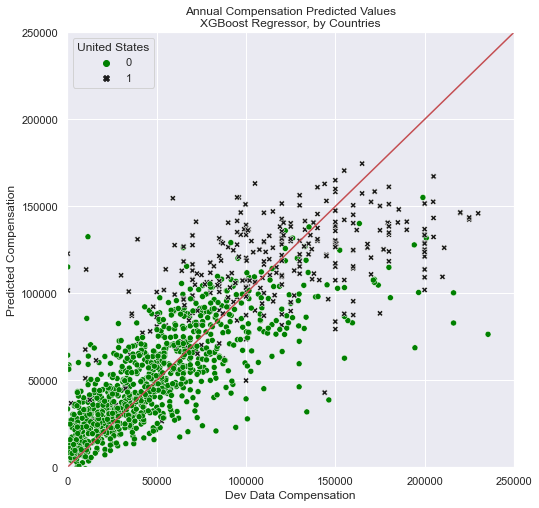

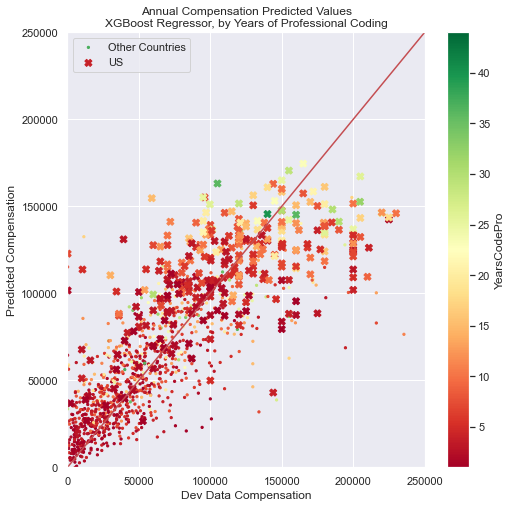

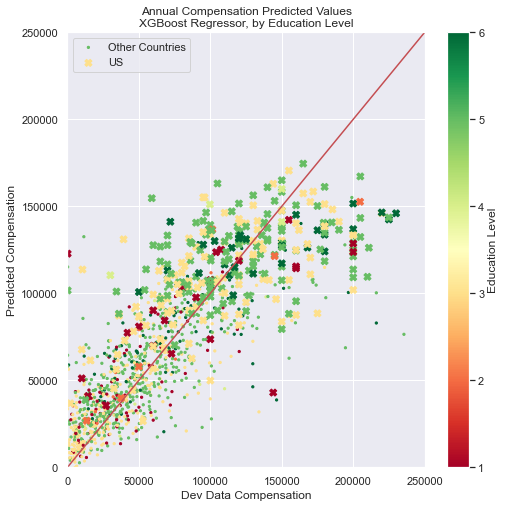

In [139]:
plot_predictions(X_dev, y_dev[:,0], y_dev_pred13, column_name='United States', 
                 title='XGBoost Regressor, by Countries')    
plot_predictions(X_dev, y_dev[:,0], y_dev_pred13, column_name='YearsCodePro', 
                 title='XGBoost Regressor, by Years of Professional Coding')
plot_predictions(X_dev, y_dev[:,0], y_dev_pred13, column_name='ed_ordinal', 
                 title='XGBoost Regressor, by Education Level')

**Comment:**
- We observe that the predicted values in the XGBoost model are more clustered and less spread out than in other models. However, it still under predicts the values of compensation that are more than \\$150K (similar to the base model). Improving this model with the current data set is unlikely, and future work would require collecting additional features like industry, state, number of working hours, as well as modifying our data and approach by adjusting how we are grouping our skill sets or education levels.

### 6.6. Support Vector Regression
- In this section, we built different support vector regression models with different kernel (linear, rbf and poly) to see if non-linear approach could be helpful for our models.

In [53]:
## Support Vector Regression
# Tuning Parameters 
params = [{'kernel':['rbf','poly'], 'C':[ 0.5, 1, 10, 100], 'gamma':[0.001, 0.005, 0.01, 0.1], 'epsilon':[0.001, 0.01]},
          {'kernel':['linear'], 'C':[0.5, 1, 10, 100], 'epsilon':[0.001, 0.01]}]

gs7 = GridSearchCV(SVR(), n_jobs=-1,
                   param_grid=params, cv=5, scoring='r2')
gs7.fit(X_train_std, y_train[:,0])
y_train_pred7 = gs7.best_estimator_.predict(X_train_std)
y_dev_pred7 = gs7.best_estimator_.predict(X_dev_std)

print('## Support Vector Regression:')
print('\nBest kernel:', gs7.best_params_['kernel'])
print('Best C:', gs7.best_params_['C'])
# print('Best gamma:', gs7.best_params_['gamma'])
print('Best epsilon:', gs7.best_params_['epsilon'])
print('Best Estimator:', gs7.best_estimator_)
model_evaluation(X_train_std, y_train, y_train_pred7, X_dev_std, y_dev, y_dev_pred7)

## Support Vector Regression:

Best kernel: linear
Best C: 100
Best epsilon: 0.001
Best Estimator: SVR(C=100, epsilon=0.001, kernel='linear')

RMSE train: 32480.08
RMSE test: 30439.58

R2 Score train: 0.583
R2 Score test: 0.625

Adjusted R2 Score train: 0.577
Adjusted R2 Score test: 0.601


**Comment:**
- The best SVR model has a linear kernel, and the perfomance is actually worse than the base model with both a reduced R2 score (from 0.632 to 0.625), and an increased RMSE (from \\$30,144 to \$30,439). This indicates that we could not improve our model with non-linear approaches.

### 6.7. Feature Extraction with PCA
- In the following sections, we will perform dimensionality reduction using principal component analysis (PCA) to evaluate our model.

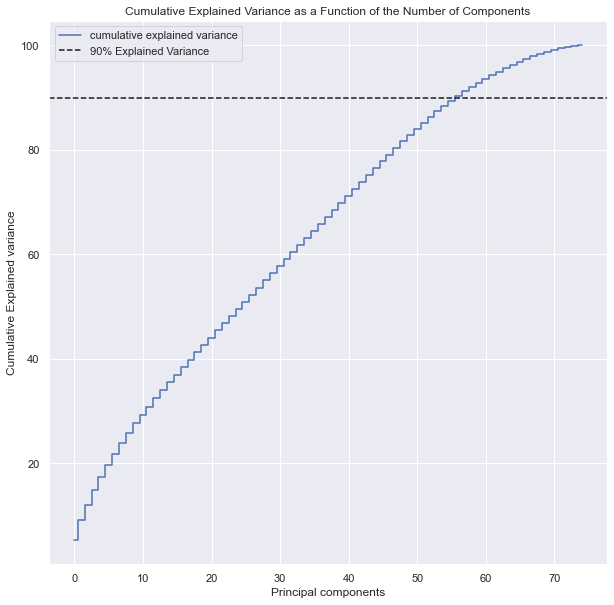

In [55]:
# PCA Plotting 
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_train_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
x_axis = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.step(x_axis, cumsum, where='mid', label='cumulative explained variance') 
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% Explained Variance')
plt.legend(loc='best')

**Comment:**
- The cummulative explained variance shows there is no strong relationship between our features and target. The cummulative explained variance increases almost linearly with each additional principal components. Our model has high bias and low variance and more likely to suffer from under-fitting rather than over-fitting.

## Regression Using PCA for Feature Extraction:

 PCA_Components  RMSE_train  RMSE_test  R2_Score_train  R2_Score_test
            2.0    43358.24   42375.06           0.256          0.274
            5.0    39557.28   37992.67           0.381          0.416
           10.0    36739.58   35225.77           0.466          0.498
           20.0    35287.31   34058.94           0.507          0.531
           30.0    34311.96   32962.93           0.534          0.561
           40.0    33754.69   32216.63           0.549          0.580
           50.0    32994.86   31449.84           0.569          0.600
           60.0    32717.61   31209.58           0.577          0.606
           75.0    31794.68   30144.14           0.600          0.632


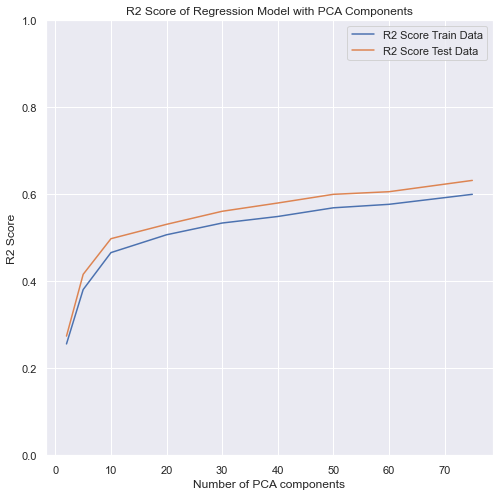

In [91]:
# Apply PCA:
from sklearn.pipeline import Pipeline
n_pcas = [2, 5, 10, 20, 30, 40, 50, 60, 75]
rmse_model8_train = []
rmse_model8_test = []
r2_model8_train = []
r2_model8_test = []

for n in n_pcas:
    lr8 = Pipeline([('pca', PCA(n_components=n,random_state=42)), 
                      ('lr',LinearRegression())])

    lr8.fit(X_train_std,y_train[:,0])
    y_train_pred8 = lr8.predict(X_train_std)
    y_dev_pred8 = lr8.predict(X_dev_std)
    rmse_model8_train.append(round(np.sqrt(mean_squared_error(y_train[:,0], y_train_pred8)),2))
    rmse_model8_test.append(round(np.sqrt(mean_squared_error(y_dev[:,0], y_dev_pred8)),2))
    r2_model8_train.append(round(lr8.score(X_train_std, y_train[:,0]),3))
    r2_model8_test.append(round(lr8.score(X_dev_std, y_dev[:,0]),3))
    
df_model8 = pd.DataFrame([n_pcas, rmse_model8_train, rmse_model8_test, r2_model8_train, r2_model8_test]).T
df_model8.columns = ['PCA_Components', 'RMSE_train', 'RMSE_test', 'R2_Score_train', 'R2_Score_test'] 

print('## Regression Using PCA for Feature Extraction:\n')
print(df_model8.to_string(index=False))

# Plot result with R2
plt.figure(figsize=(8, 8))
plt.plot(df_model8.PCA_Components, df_model8.R2_Score_train, label='R2 Score Train Data') 
plt.plot(df_model8.PCA_Components, df_model8.R2_Score_test, label='R2 Score Test Data') 
plt.title('R2 Score of Regression Model with PCA Components')
plt.ylabel('R2 Score')
plt.ylim((0, 1))
plt.xlabel('Number of PCA components')
plt.legend(loc='best')
plt.show()


**Comment:**
- Using 50 PCA components (about 90% explained variance) could be a good approach for dimensionality reduction. The R2 and RMSE is quite close to the base model (with 75 components)
- In the next section we will run 50 PCA components with our best model so far - the XGBoost

In [138]:
## Run PCA & XGBoost
# Tuning parameters max depth, min sample split, number of estimators and learning rate
params = {'xgb__max_depth':[3, 10, 30, 50], 'xgb__colsample_bytree': [0.3, 0.5, 0.7], 'xgb__lambda':[1, 10, 100, 1000],
          'xgb__n_estimators':[50, 100, 150], 'xgb__learning_rate':[0.01, 0.1, 1],
         'pca__n_components':[50]}

model9 = Pipeline([('pca', PCA(random_state=42)),
                ('xgb', xgb.XGBRegressor(objective ='reg:squarederror', random_state=42))])
                    
gs9 = GridSearchCV(model9, n_jobs=-1,
                   param_grid=params, cv=5, scoring='r2')

gs9.fit(X_train, y_train[:,0])
y_train_pred9 = gs9.best_estimator_.predict(X_train)
y_dev_pred9 = gs9.best_estimator_.predict(X_dev)


# Evaluation
print('## Regression with XGBoost and PCA:')
print('\nBest max_depth:', gs9.best_params_['xgb__max_depth'])
print('Best colsample_bytree:', gs9.best_params_['xgb__colsample_bytree'])
print('Best L2 regularization:', gs9.best_params_['xgb__lambda'])
print('Best n_estimators:', gs9.best_params_['xgb__n_estimators'])
print('Best learning_rate:', gs9.best_params_['xgb__learning_rate'])
print('PCA n_components:', gs9.best_params_['pca__n_components'])
print('Best Estimator:', gs9.best_estimator_)
model_evaluation(X_train, y_train, y_train_pred9, X_dev, y_dev, y_dev_pred9)

## Regression with XGBoost and PCA:

Best max_depth: 3
Best colsample_bytree: 0.3
Best L2 regularization: 1
Best n_estimators: 150
Best learning_rate: 0.1
PCA n_components: 50
Best Estimator: Pipeline(steps=[('pca', PCA(n_components=50, random_state=42)),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.3, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', lambda=1,
                              learning_rate=0.1, max_delta_step=0, max_depth=3,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=150,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambd

**Comment:**
- XGBoost only slightly improved the performance for the models using 50 PCA components (R2 from 0.600 to 0.618). Based on these findings, we determined that PCA for dimensionality reduction is not a good approach for our data. 

### 6.8 Feature Selection Using Random Forest Regressor
- In the following sections, we will use the random forest regressor models built in step 6.5 to rank the most important features for our model. Then we will and evaluate model performance using various quantities of our most important features. 

## Regression with The Top n Important Features:

 Feature_Number  RMSE_train  RMSE_test  R2_Score_train  R2_Score_test
            2.0    38765.38   37963.16           0.406          0.417
            5.0    36385.31   34775.57           0.476          0.511
           10.0    34461.56   32805.05           0.530          0.565
           20.0    33494.93   31874.64           0.556          0.589
           30.0    33052.14   31481.92           0.568          0.599
           40.0    32290.60   30594.95           0.588          0.621
           50.0    32057.17   30311.20           0.594          0.628
           60.0    31901.55   30186.50           0.597          0.631
           75.0    31794.68   30144.14           0.600          0.632


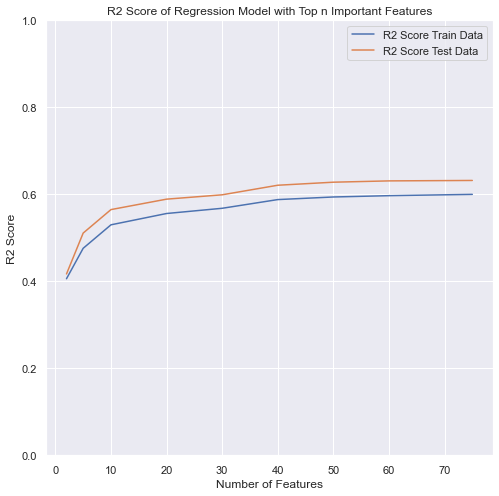

In [17]:
# Apply Feature Selection from Random Forest Regressor:
n_features = [2, 5, 10, 20, 30, 40, 50, 60, 75]  
rmse_model10_train = []
rmse_model10_test = []
r2_model10_train = []
r2_model10_test = []

# Get Feature importances
feature_importance = gs6.best_estimator_.feature_importances_
feature_names = X.columns

# Regression with the most n important features 
for n in n_features:
    # find the column index of the n most 
    top_n_index = np.flip(np.argsort(feature_importance)[-n:])
    
    # Subset X data to top n most important features
    X_train_n = X_train[:,top_n_index]
    X_dev_n = X_dev[:,top_n_index]
    
    # Model Predictions
    lr10 = LinearRegression()
    lr10.fit(X_train_n, y_train[:,0])
    y_train_pred10 = lr10.predict(X_train_n)
    y_dev_pred10 = lr10.predict(X_dev_n)
    
    # Add evaluations to return list
    rmse_model10_train.append(round(np.sqrt(mean_squared_error(y_train[:,0], y_train_pred10)),2))
    rmse_model10_test.append(round(np.sqrt(mean_squared_error(y_dev[:,0], y_dev_pred10)),2))
    r2_model10_train.append(round(lr10.score(X_train_n, y_train[:,0]),3))
    r2_model10_test.append(round(lr10.score(X_dev_n, y_dev[:,0]),3))
    
df_model10 = pd.DataFrame([n_features, rmse_model10_train, rmse_model10_test, r2_model10_train, r2_model10_test]).T
df_model10.columns = ['Feature_Number', 'RMSE_train', 'RMSE_test', 'R2_Score_train', 'R2_Score_test'] 

print('## Regression with The Top n Important Features:\n')
print(df_model10.to_string(index=False))

# Plot result with R2
plt.figure(figsize=(8, 8))
plt.plot(df_model10.Feature_Number, df_model10.R2_Score_train, label='R2 Score Train Data') 
plt.plot(df_model10.Feature_Number, df_model10.R2_Score_test, label='R2 Score Test Data') 
plt.title('R2 Score of Regression Model with Top n Important Features')
plt.ylabel('R2 Score')
plt.ylim((0, 1))
plt.xlabel('Number of Features')
plt.legend(loc='best')
plt.show()

**Comment:**
- Using only the top 30 most important features with linear regression, our model performance is almost equivalent to our XGBoost model with 50 PCA components. 
- Using feature selection like this is a better approach than using PCA for our data.
- We will examine the details of the 30 most important features to check if there any indication of a non-linear relationship that exists between these features and compensation.

In [82]:
# Top 30 important features
top_index30 = np.flip(np.argsort(feature_importance)[-30:])
top30_features = feature_names[top_index30]
print('Top 30 Important Features name:\n')
print(top30_features)
print('\nTop 30 Feature Importances:\n')
print(np.flip(np.sort(feature_importance)[-30:]))

Top 30 important features name:

Index([     'United States',       'YearsCodePro',                'Age',
                   'Yearly',              'India',             'Israel',
                  'OrgSize',        'Switzerland',         'ed_ordinal',
          'cloud_computing',     'nosql_database',            'web_dev',
             'sql_database',            'Denmark',           'ML_tools',
                    'white',        'language_DS',         'Age1stCode',
                   'employ',            'Germany',    'language_others',
            'web_framework',             'Weekly', 'server_dist_config',
       'container_platform',                 2021,              'Spain',
           'United Kingdom',       'command_line',         'app_UI_dev'],
      dtype='object')

Top 30 feature importance:

[0.42849663 0.12372622 0.06398234 0.06207453 0.04354027 0.03794268
 0.02409672 0.01399906 0.01335941 0.01211191 0.01199881 0.0117345
 0.01095817 0.00954074 0.00905964 0.00900909 0.00816

In [83]:
## Subset X data to top 30 with most feature_importance
X_train_top30 = X_train[:,top_index]
X_train_std_top30 = X_train_std[:,top_index]
X_dev_top30 = X_dev[:,top_index]
X_dev_std_top30 = X_dev_std[:,top_index]
print('Dimension of X_train data with top 30 features:', X_train_top30.shape)
print('Dimension of X_dev data with top 30 features:', X_dev_top30.shape)

Dimension of X_train data with top 30 features: (5831, 30)
Dimension of X_dev data with top 30 features: (1250, 30)


In [174]:
# Regression with top 30 features:
lr10 = LinearRegression()
lr10.fit(X_train_top30, y_train[:,0])
y_train_pred10 = lr10.predict(X_train_top30)
y_dev_pred10 = lr10.predict(X_dev_top30)

# Evaluation
print('## Linear Regression - with 30 most important features:')
model_evaluation(X_train_top30, y_train, y_train_pred10, X_dev_top30, y_dev, y_dev_pred10)

## Linear Regression - with 30 most important features:

RMSE train: 33052.14
RMSE test: 31481.92

R2 Score train: 0.568
R2 Score test: 0.599

Adjusted R2 Score train: 0.566
Adjusted R2 Score test: 0.589


Text(0.5, 0, 'Prediction - Compensation')

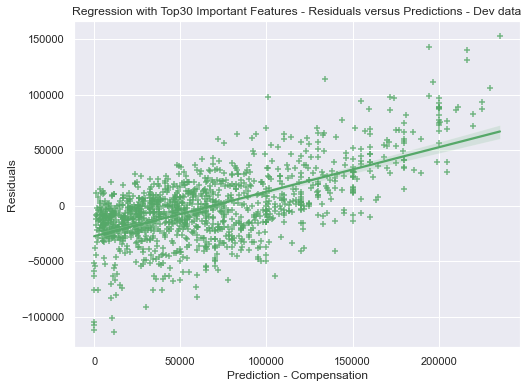

In [176]:
## Checking for Linear Conditional Expection to see if we need Polynomial Transformation or not
# Calculate residuals versus predictions
resid10 = y_dev[:,0] - y_dev_pred10

# Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(y_dev[:,0], resid10, color='g', marker='+')
plt.title('Regression with Top30 Important Features - Residuals versus Predictions - Dev data')
plt.ylabel('Residuals')
plt.xlabel('Prediction - Compensation')

# The plot indicates the linear conditional expectation could be compromised, 
# The model predicts lower values (undershoot) when under 100K, and higher values (overshoot) when above 100K 
# Looks like heavy tail affect the performance of the model

**Comment:**
- The residual plot indicates that the linear conditional expectation assumption could be compromised. The model predicts lower values (undershoots) when salary is under \\$100K, and higher values (overshoot) when above \$100K. It appears as if the tail of our skewed data is likely going to negatively effect the performance of the model.

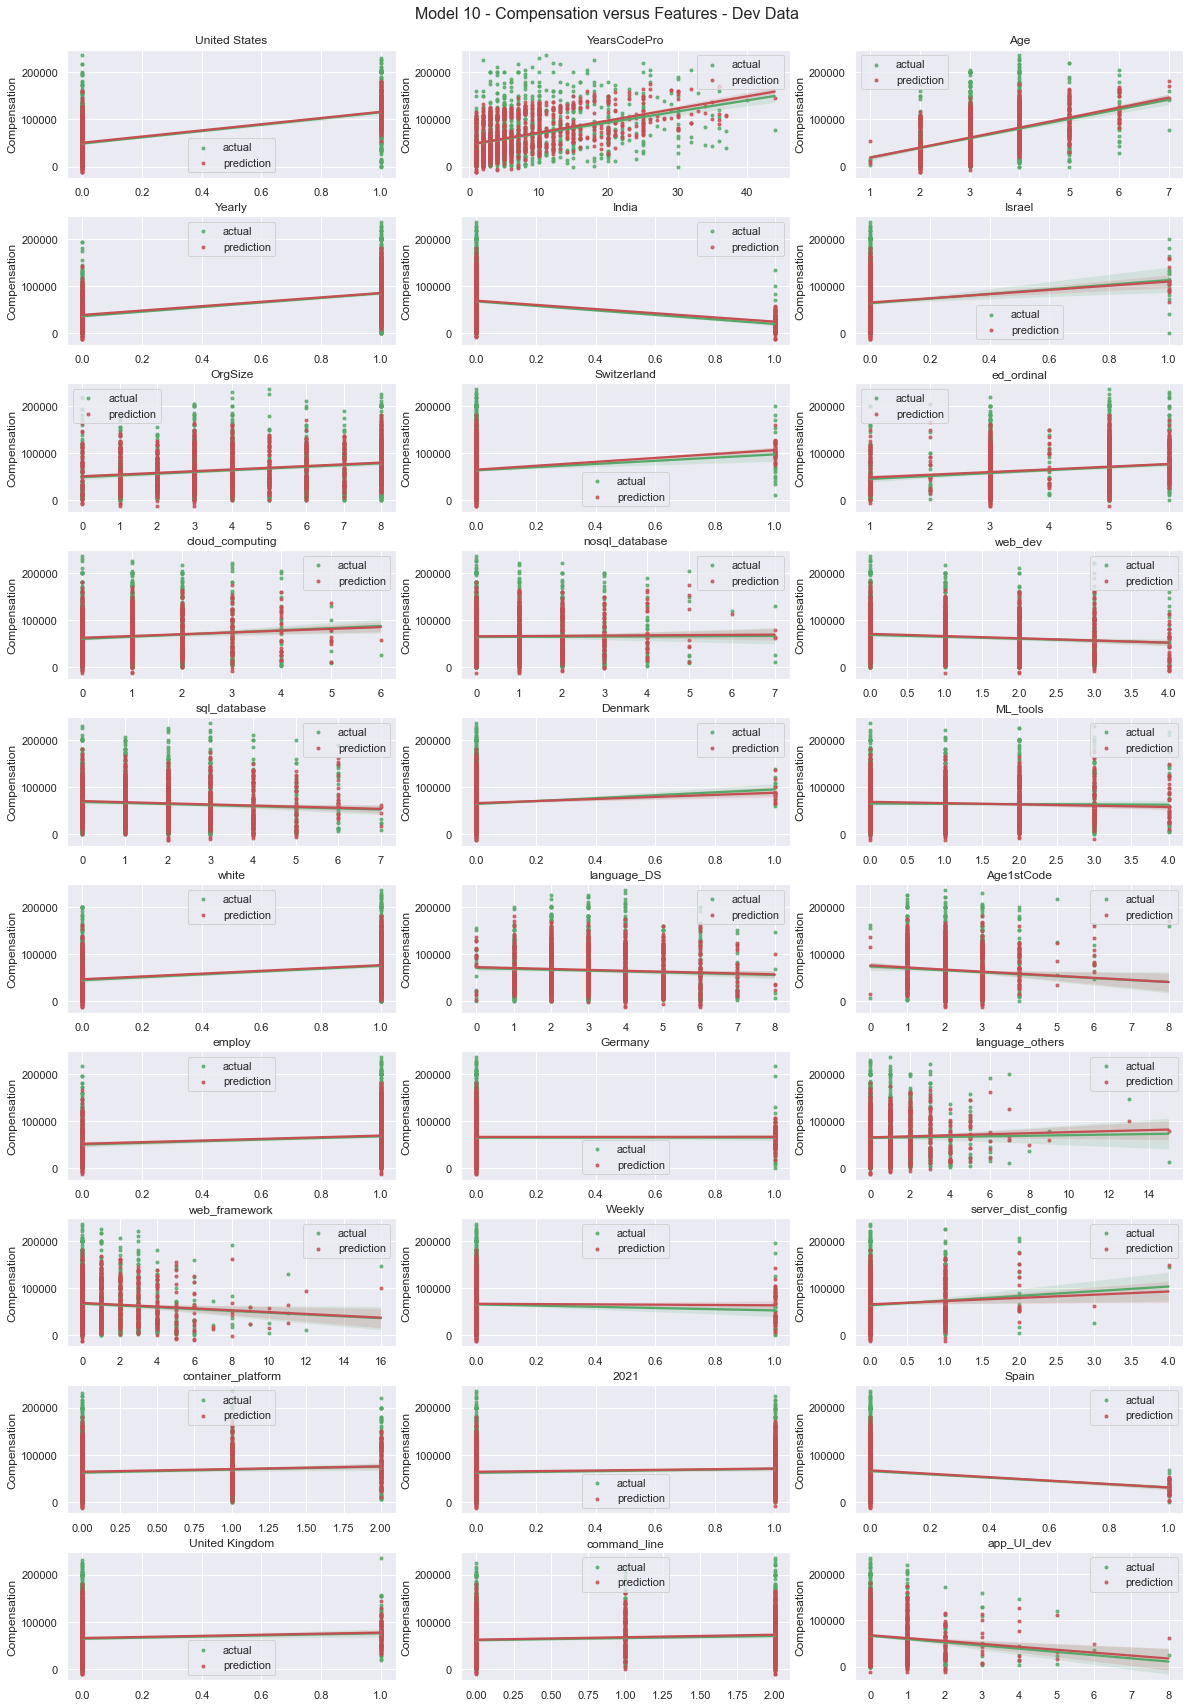

In [180]:
## Check Linear Conditional Expection for the 30 most important features to see which one is not linear
fig = plt.figure(figsize=(20,30))
plt.suptitle('Model 10 - Compensation versus Features - Dev Data', size=16, y = 0.9)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
i = 1
for idx in range(len(top30_features)):
    plt.subplot(10, 3, i)
    sns.regplot(X_dev_top30[:,idx], y_dev[:,0], color='g', marker='.', label='actual')
    sns.regplot(X_dev_top30[:,idx], y_dev_pred10, color='r', marker='.', label='prediction')
    plt.legend()
    plt.ylabel('Compensation')
    plt.title(top30_features[idx])
#     plt.xlabel(top30_features[idx])
    i += 1
    
# From the plots: there is no indication of non-linear relationship for any features

**Comment:**
- Based on the plots, there does not appear to be any indication of non-linear relationship for any of our features, therefore, no further transformations of the features are required.
- The skill features do not provide much to statisical weight for predicting annual compensation of data scientists. They mostly have no effect or are negatively correlated with compensation, which runs counter to our expectations at the outset of our project.

### 6.9.  Model Training - United States
- In the following section we will reduce the model to the US only and evaluate the model performance.

In [122]:
# Overview of features for US only
X_US.head()

OrgSize  Age1stCode  YearsCodePro  Age  language_DS  language_others  \
3         8           2             5    3            3                2   
5         3           2             1    3            3                1   
9         1           2             9    3            4                3   
19        8           0             6    4            2                0   
30        4           1            20    4            2                1   

    command_line  web_dev  sql_database  nosql_database  cloud_computing  \
3              1        2             3               0                3   
5              1        1             0               0                1   
9              0        0             1               2                1   
19             1        0             2               0                2   
30             1        2             2               0                1   

    elec_platform  container_platform  web_framework  ML_tools  app_UI_dev  \
3               0                   0              1         0           0   
5               0                   0              0         0           0   
9               0                   0              2         1           1   
19              0                   0              0         0           0   
30              0                   0              4         0           0   

    server_dist_config  man  woman  sexualitycat  transbin  ed_ordinal  \
3                    0    1      0             0         0           3   
5                    0    1      0             0         0           6   
9                    0    1      0             0         0           5   
19                   0    1      0             0         0           6   
30                   0    1      0             0         0           3   

    employ  employ_parttime  white  asian  black  mideast  hispanic  biracial  \
3        1                0      0      0      0        0         0         0   
5        1                0      0      1      0        0         0         0   
9        1                0      1      0      0        0         0         0   
19       1                0      1      0      0        0         0         0   
30       1                0      1      0      0        0         0         0   

    2020  2021  
3      0     1  
5      0     1  
9      0     1  
19     0     1  
30     0     1

## Linear Regression - Base Model - US Only:

RMSE train: 40859.75
RMSE test: 41957.68

R2 Score train: 0.277
R2 Score test: 0.188

Adjusted R2 Score train: 0.260
Adjusted R2 Score test: 0.090


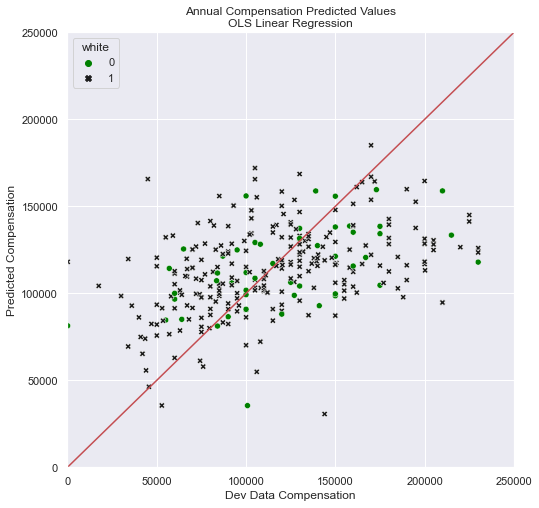

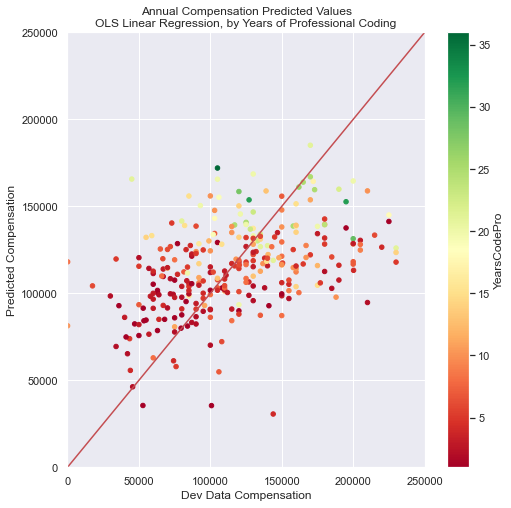

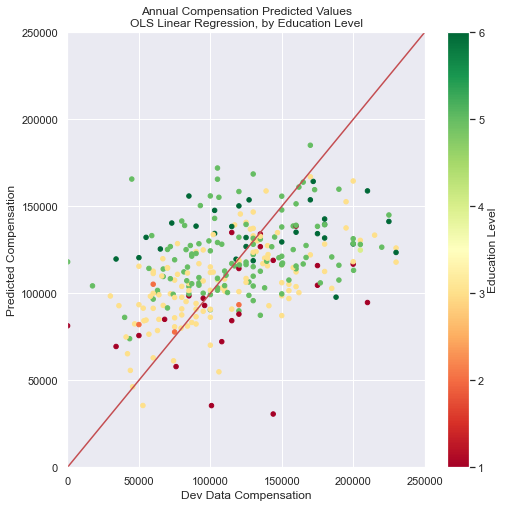

In [140]:
## Base Model US - No transformation
# Base Model Training
lr_US = LinearRegression()
lr_US.fit(X_train_US, y_train_US[:,0])
y_train_pred_US = lr_US.predict(X_train_US)
y_dev_pred_US = lr_US.predict(X_dev_US)

# Function for plotting US data Only
def plot_predictions_US(X_dev, y_dev, y_dev_pred, column_name, title):
    column_idx = X.columns.tolist().index(column_name)
    fig, ax = plt.subplots(figsize=(8, 8))
    
    if column_idx in range(17) or column_idx==21:
        plt.scatter(y_dev, y_dev_pred, c=X_dev[:, column_idx], 
                        cmap="RdYlGn", s=20, alpha=1, marker='o', edgecolors=None,
                        vmin=X_dev[:,column_idx].min(), vmax=X_dev[:,column_idx].max())
        cbar = plt.colorbar(ax=ax)
        if column_name == 'ed_ordinal':
            column_name = 'Education Level'
        cbar.set_label(column_name)
    else:
        # Plot binary Column
        sns.scatterplot(y_dev, y_dev_pred, hue=X_dev[:,column_idx], style=X_dev[:,column_idx],
                       palette=['green','k'])
        ax.legend(title=column_name)

        
    ax.set_title("Annual Compensation Predicted Values\n" + title)
    ax.set_ylabel("Predicted Compensation")
    ax.set_xlabel("Dev Data Compensation")
    ax.set_ylim(0,250000)
    ax.set_xlim(0,250000)
    ax.plot(np.linspace(0,250000, 5),np.linspace(0,250000, 5), '-r')

    plt.show()

# Model evaluation
print('## Linear Regression - Base Model - US Only:')
model_evaluation(X_train_US, y_train_US, y_train_pred_US, X_dev_US, y_dev_US, y_dev_pred_US)
plot_predictions_US(X_dev_US, y_dev_US[:,0], y_dev_pred_US, column_name='white', 
                 title='OLS Linear Regression')    
plot_predictions_US(X_dev_US, y_dev_US[:,0], y_dev_pred_US, column_name='YearsCodePro', 
                 title='OLS Linear Regression, by Years of Professional Coding')
plot_predictions_US(X_dev_US, y_dev_US[:,0], y_dev_pred_US, column_name='ed_ordinal', 
                 title='OLS Linear Regression, by Education Level')

**Comment:**
- When subsetting the data to US observations only, our model's performance, by both R2 score and RMSE, is significantly worse. The base model for US only has low R2 of 0.188 and high RMSE of \\$41,957.

In [128]:
# Transform compensation to Log Scale - US Only
lr2_US = LinearRegression()
lr2_US.fit(X_train_US, np.log(y_train_US[:,0]))
y_train_pred2_US = lr2_US.predict(X_train_US)
y_dev_pred2_US = lr2_US.predict(X_dev_US)

print('## Linear Regression - Transform Compensation to Log scale Model - US Only:')
model_evaluation_log(X_train_US, y_train_US, y_train_pred2_US, X_dev_US, y_dev_US, y_dev_pred2_US)

## Linear Regression - Transform Compensation to Log scale Model - US Only:

RMSE train: 43874.94
RMSE test: 44836.13

R2 Score train: 0.157
R2 Score test: 0.102

Adjusted R2 Score train: 0.137
Adjusted R2 Score test: -0.008


**Comment:**
- Taking a log transformation of compensation does not improve the model at all.

In [129]:
## XGBoost - US Only
# Tuning parameters max depth, min sample split, number of estimators and learning rate
params = {'max_depth':[3, 10, 30, 50], 'colsample_bytree': [0.3, 0.5, 0.7], 'lambda':[1, 10, 100, 1000],
          'n_estimators':[50, 100, 150], 'learning_rate':[0.01, 0.1, 1]}

xgb3_US= xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
gs3_US = GridSearchCV(xgb3_US, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
gs3_US.fit(X_train_US,y_train_US[:,0])
y_train_pred3_US = gs3_US.best_estimator_.predict(X_train_US)
y_dev_pred3_US = gs3_US.best_estimator_.predict(X_dev_US)

# Evaluation
print('## Regression with XG Boosting - US Only:')
print('\nBest max_depth:', gs3_US.best_params_['max_depth'])
print('Best colsample_bytree:', gs3_US.best_params_['colsample_bytree'])
print('Best L2 regularization:', gs3_US.best_params_['lambda'])
print('Best n_estimators:', gs3_US.best_params_['n_estimators'])
print('Best learning_rate:', gs3_US.best_params_['learning_rate'])
print('Best Estimator:', gs3_US.best_estimator_)
model_evaluation(X_train_US, y_train_US, y_train_pred3_US, X_dev_US, y_dev_US, y_dev_pred3_US)

## Regression with XG Boosting - US Only:

Best max_depth: 3
Best colsample_bytree: 0.7
Best L2 regularization: 100
Best n_estimators: 150
Best learning_rate: 0.1
Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', lambda=100, learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE train: 36174.74
RMSE test: 41525.67

R2 Score train: 0.433
R2 Score test: 0.205

Adjusted R2 Score train: 0.420
Adjusted R2 Score test: 0.108


**Comment:**
- XGBoost only slightly improves the model as compared to the US baseline model.

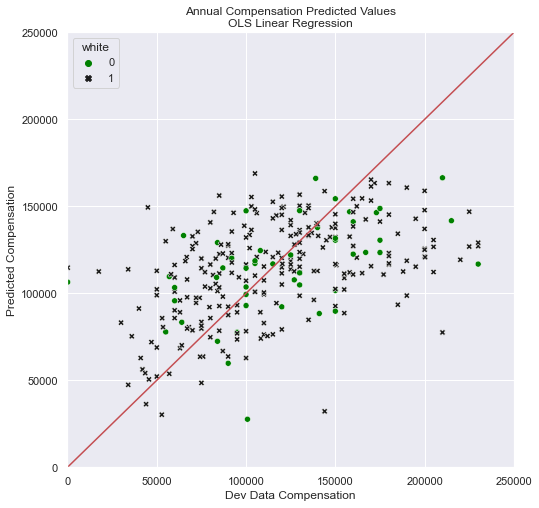

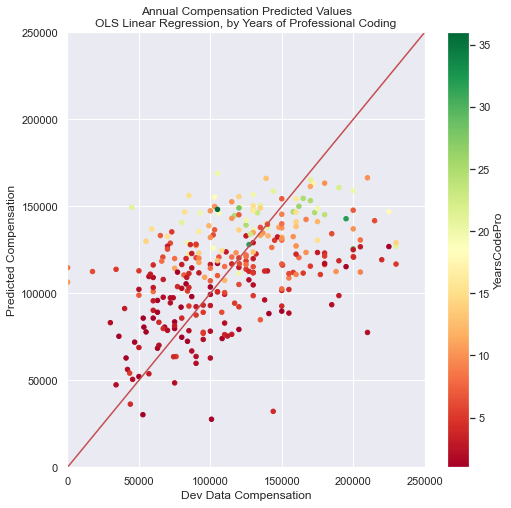

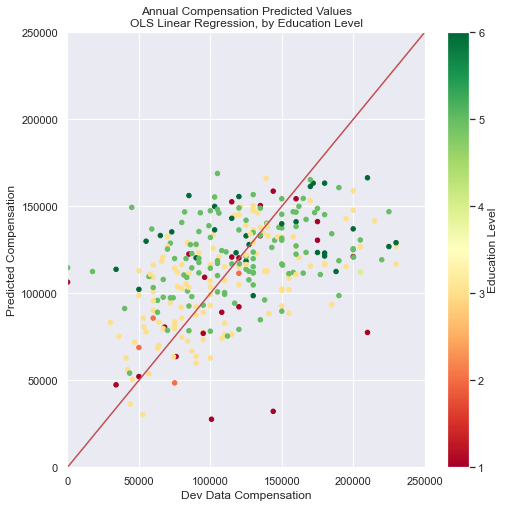

In [141]:
plot_predictions_US(X_dev_US, y_dev_US[:,0], y_dev_pred3_US, column_name='white', 
                 title='OLS Linear Regression')    
plot_predictions_US(X_dev_US, y_dev_US[:,0], y_dev_pred3_US, column_name='YearsCodePro', 
                 title='OLS Linear Regression, by Years of Professional Coding')
plot_predictions_US(X_dev_US, y_dev_US[:,0], y_dev_pred3_US, column_name='ed_ordinal', 
                 title='OLS Linear Regression, by Education Level')

In [132]:
## Support Vector Regression - US Only
# Tuning Parameters 
params = [{'kernel':['rbf','poly'], 'C':[ 0.5, 1, 10, 100], 'gamma':[0.001, 0.005, 0.01, 0.1], 'epsilon':[0.001, 0.01]},
          {'kernel':['linear'], 'C':[0.5, 1, 10, 100], 'epsilon':[0.001, 0.01]}]

gs4_US = GridSearchCV(SVR(), n_jobs=-1,
                   param_grid=params, cv=5, scoring='r2')
gs4_US.fit(X_train_std_US, y_train_US[:,0])
y_train_pred4_US = gs4_US.best_estimator_.predict(X_train_std_US)
y_dev_pred4_US = gs4_US.best_estimator_.predict(X_dev_std_US)

print('## Support Vector Regression - US Only:')
print('\nBest kernel:', gs4_US.best_params_['kernel'])
print('Best C:', gs4_US.best_params_['C'])
# print('Best gamma:', gs7.best_params_['gamma'])
print('Best epsilon:', gs4_US.best_params_['epsilon'])
print('Best Estimator:', gs4_US.best_estimator_)
model_evaluation(X_train_std, y_train_US, y_train_pred4_US, X_dev_std, y_dev_US, y_dev_pred4_US)

## Support Vector Regression - US Only:

Best kernel: linear
Best C: 100
Best epsilon: 0.01
Best Estimator: SVR(C=100, epsilon=0.01, kernel='linear')

RMSE train: 41355.29
RMSE test: 42155.83

R2 Score train: 0.259
R2 Score test: 0.181

Adjusted R2 Score train: 0.249
Adjusted R2 Score test: 0.128


**Comment:**
- SVR with a linear kernel is the best SVR model for the US data, however the performance is worse than US baseline model.

<hr style="border:2px solid gray"> </hr>

## Step 7: Model Selection - Categorical Target

### 7.1: Random Forest - Compensation Brackets

##Base Regression Forest Classification Evaluation:
F1 Score: 0.242
Accuracy: 0.254



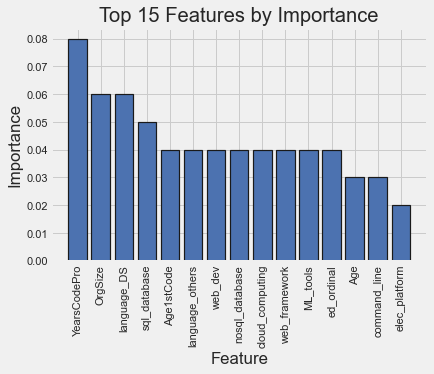

In [110]:
#Base random forest classification
rf1 = RandomForestClassifier(random_state = 42)

# Train the model on training data
rf1.fit(X_train_std, y_train[:,1])

# Use the forest's predict X_test_std on the test data
y_rf1_pred = rf1.predict(X_dev_std)

# Evaluation
print('##Base Regression Forest Classification Evaluation:')
print('F1 Score: %.3f' %f1_score(y_dev[:,1], y_rf1_pred, average = "weighted"))
print('Accuracy: %.3f' %accuracy_score(y_dev[:,1], y_rf1_pred))
print()

# Get numerical feature importances
importances = list(rf1.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Store feature and importances 
important_features = [pair[0] for pair in feature_importances[:15]]

# Plot the top 15 important features
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(important_features)))
importances = [pair[1] for pair in feature_importances[:15]]

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, important_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Top 15 Features by Importance');

**Comment:**
 - Base Random Forest Classification on the compensation brackets do not look very promising, with an F1 score of 0.242.
 - This can partially be explained by the low importance and even distribution of the top 15 features. Because there are no dominating features this type of classifier relies on sensitivities of a larger set of features and will likely fail to adequately produce an accurate model.

In [111]:
print(classification_report(y_dev[:,1], y_rf1_pred))

              precision    recall  f1-score   support

           1       0.38      0.58      0.46       119
           2       0.28      0.30      0.29       132
           3       0.30      0.28      0.29       120
           4       0.21      0.20      0.20       111
           5       0.26      0.25      0.25       105
           6       0.21      0.21      0.21        97
           7       0.25      0.16      0.20        94
           8       0.14      0.08      0.10        78
           9       0.22      0.37      0.27       113
          10       0.18      0.16      0.17        86
          11       0.25      0.24      0.24        75
          12       0.18      0.09      0.12        45
          13       0.24      0.19      0.21        47
          14       0.00      0.00      0.00        28

    accuracy                           0.25      1250
   macro avg       0.22      0.22      0.22      1250
weighted avg       0.24      0.25      0.24      1250



**Comment:**
 - The classification report shows that this model works arguably better on the lower end of the compensation bracket, but fails to predict towards the higher end

#### Hyperparameter tuning to improve upon the base model:
- Utilize RandomSearchCV to do a broad hypertuning attempt
- Utilize the results and fine tune using GridSearchCV

In [112]:
# Regression Forest Random Hyperparameter Grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 3, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [113]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# Search across 120 different combinations, use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 40, 
                               cv = 3, 
                               verbose=2,
                               scoring='f1_weighted',
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_std, y_train[:,1])

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   31.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [114]:
# Predict using the best estimator as determined from RandomSearch
y_dev_pred = rf_random.best_estimator_.predict(X_dev_std)

print('##Best Regression Forest (based on Random Search):')
print('Best estimator:', rf_random.best_estimator_)
print('F1 Score: %.3f' %f1_score(y_dev[:,1], y_dev_pred, average = "weighted"))
print('Accuracy: %.3f' %accuracy_score(y_dev[:,1], y_dev_pred))

##Best Regression Forest (based on Random Search):
Best estimator: RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=500)
F1 Score: 0.237
Accuracy: 0.255


In [115]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [116]:
# Use the grid search based on knowledge from the random grid

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [40, 50, 60],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [400, 500, 600]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1,
                           scoring = 'f1_weighted',
                           verbose = 2)

grid_search.fit(X_train_std, y_train[:,1])

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [400, 500, 600]},
             scoring='f1_weighted', verbose=2)

In [117]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

In [118]:
# Predict using the best estimator as determined from GridSearch
y_dev_pred_gs = grid_search.best_estimator_.predict(X_dev_std)

print('##Best Regression Forest (based on GridSearch):')
print('Best estimator:', grid_search.best_estimator_)
print('F1 Score: %.3f' %f1_score(y_dev[:,1], y_dev_pred_gs, average = "weighted"))
print('Accuracy: %.3f' %accuracy_score(y_dev[:,1], y_dev_pred_gs))

##Best Regression Forest (based on GridSearch):
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=10,
                       n_estimators=400)
F1 Score: 0.261
Accuracy: 0.277


**Comment:**
 - Through hypertuning efforts, the best we could do with this model is improve it by 8%.
 - Because of the poor performance of the model, as seen through a low F1 score and poor model accuracy, we do not reccomend this as a model to use.

### 7.2: Random Forest - High, Medium, Low Compensation Categories

 - Repeat procedure done on the compensation brackets with the HML categorial outcomes

##Base Regression Forest Classification Evaluation:
F1 Score: 0.727
Accuracy: 0.729



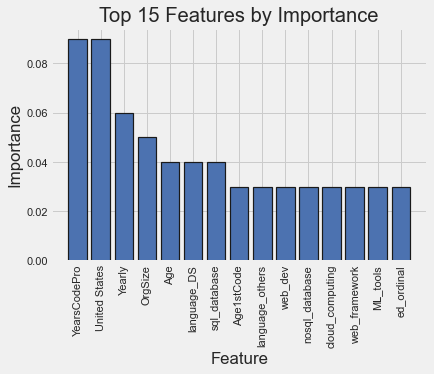

In [119]:
#Base random forest classification
rf1 = RandomForestClassifier(random_state = 42)

# Train the model on training data
rf1.fit(X_train_std, y_train[:,2])

# Use the forest's predict X_test_std on the test data
y_rf1_pred = rf1.predict(X_dev_std)

# Evaluation
print('##Base Regression Forest Classification Evaluation:')
print('F1 Score: %.3f' %f1_score(y_dev[:,2], y_rf1_pred, average = "weighted"))
print('Accuracy: %.3f' %accuracy_score(y_dev[:,2], y_rf1_pred))
print()

# Get numerical feature importances
importances = list(rf1.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Store feature and importances 
important_features = [pair[0] for pair in feature_importances[:15]]

# Plot the top 15 important features
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(important_features)))
importances = [pair[1] for pair in feature_importances[:15]]

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, important_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Top 15 Features by Importance');

**Comment:**
 - Base Random Forest Classification on the HML brackets look signficantly better, with an F1 score of 0.727.
 - In this case, there are higher contributions of importance by the top seven features (0.04 or greater) when compared to the rest of the features (< 0.03 importance). Because there is a better granularity of differences between a small subset of features and the rest of the feature set, this model does better than the previous compensation bracket model.

In [120]:
print(classification_report(y_dev[:,2], y_rf1_pred, target_names = ['Low Salary', 'Medium Salary', 'High Salary']))

               precision    recall  f1-score   support

   Low Salary       0.77      0.68      0.72       339
Medium Salary       0.70      0.80      0.75       607
  High Salary       0.76      0.64      0.70       304

     accuracy                           0.73      1250
    macro avg       0.74      0.71      0.72      1250
 weighted avg       0.73      0.73      0.73      1250



**Comment:**
 - The classification report shows that this model works equally well across all three classification outcomes

#### Hyperparameter tuning to improve upon the base model:
- Utilize RandomSearchCV to do a broad hypertuning attempt
- Utilize the results and fine tune using GridSearchCV

In [121]:
# Regression Forest Random Hyperparameter Grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [122]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 120 different combinations use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 50, 
                               cv = 3, 
                               verbose=2,
                               scoring = 'f1_weighted',
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_std, y_train[:,2])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [123]:
# Predict using the best estimator as determined from RandomSearch
y_dev_pred = rf_random.best_estimator_.predict(X_dev_std)

print('##Best Regression Forest (based on Random Search):')
print('Best estimator:', rf_random.best_estimator_)
print('F1 Score: %.3f' %f1_score(y_dev[:,2], y_dev_pred, average = "weighted"))
print('Accuracy: %.3f' %accuracy_score(y_dev[:,2], y_dev_pred))

##Best Regression Forest (based on Random Search):
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=522)
F1 Score: 0.731
Accuracy: 0.732


In [124]:
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [125]:
# Use the grid search based on knowledge from the RandomSearch

# Create the parameter grid based on the results of RandomSearch 
param_grid = {
    'bootstrap': [False],
    'max_depth': [20, 30, 40],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [1750, 1800, 1850]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           scoring = 'f1_weighted',
                           n_jobs = -1, 
                           verbose = 2)

grid_search.fit(X_train_std, y_train[:,2])

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  5.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [20, 30, 40],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [1750, 1800, 1850]},
             scoring='f1_weighted', verbose=2)

In [126]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1750}

In [127]:
# Predict using the best estimator as determined from GridSearch
y_dev_pred_gs = grid_search.best_estimator_.predict(X_dev_std)

print('##Best Regression Forest (based on GridSearch):')
print('Best estimator:', grid_search.best_estimator_)
print('F1 Score: %.3f' %f1_score(y_dev[:,2], y_dev_pred_gs, average = "weighted"))
print('Accuracy: %.3f' %accuracy_score(y_dev[:,2], y_dev_pred_gs))

##Best Regression Forest (based on GridSearch):
Best estimator: RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=10, n_estimators=1750)
F1 Score: 0.733
Accuracy: 0.734


**Comment:**
 - Through hypertuning efforts, the best we could do with this model is improve it marginally from the baseline model.
 - This results in a higher F1 score, though we are not confident a model on broad catgories like these will provide much value in salary negotations.

## Visualizing the best tree in the forest

In [128]:
# Best model to be displayed
final_model = grid_search.best_estimator_

# Write one of the decision trees as a dot file
visual_tree = final_model.estimators_[1]

export_graphviz(visual_tree, out_file = 'best_tree.dot',
                precision = 2, filled = True, rounded = True, max_depth = 3)

In [129]:
# Use pydot for converting to an image file
# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('best_tree.dot')
graph.write_png('best_tree.png')

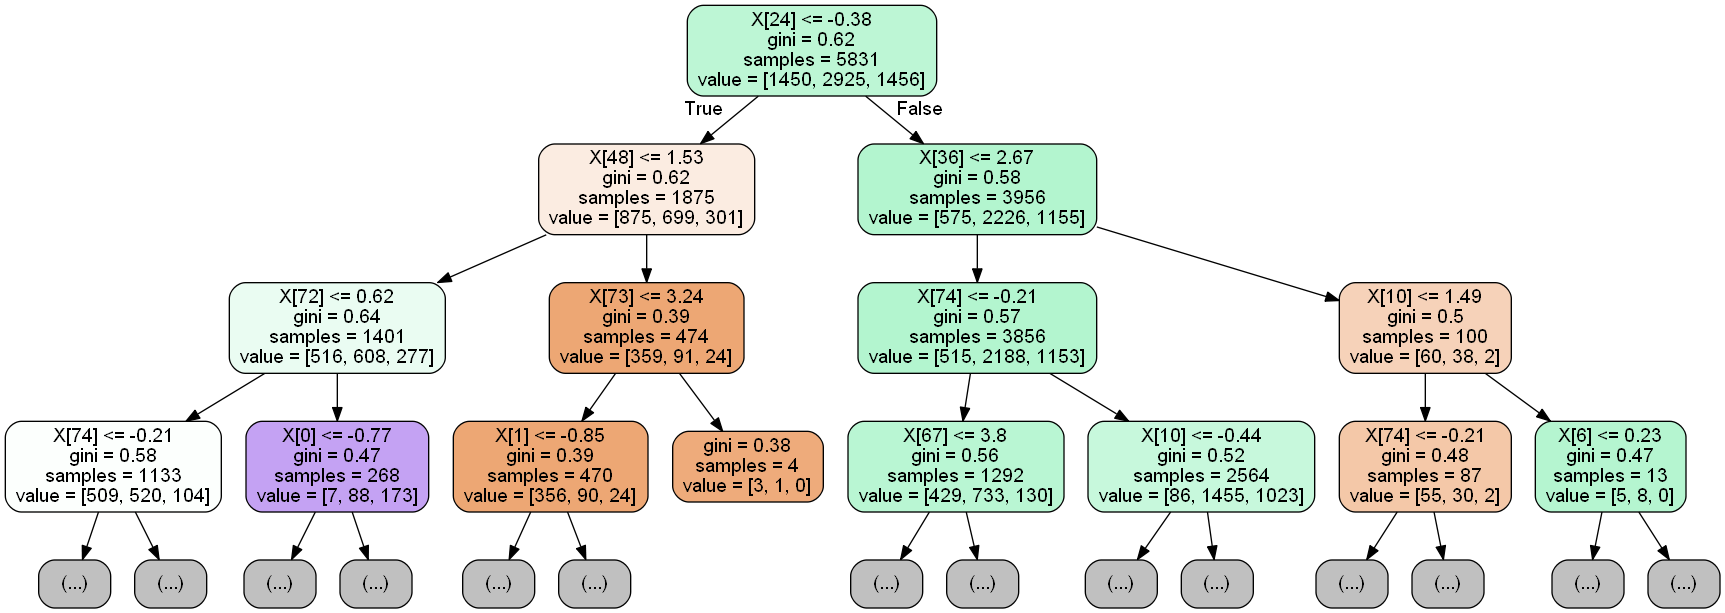

In [130]:
Image("best_tree.png")

---

### 7.3 Modeling with Logistic Regression
- In this section we will examine the performance of Logistic regression models in classifying our data

##### Global Data
We will first explore how well logistic regression does in classifying our compensation brackets for the global population

In [211]:
# Start with a simple model before gridsearch to see if we can improve
# extracting the correct column from the training labels

comp_train_label = np.array([y_train[i][1] for i in range(len(y_train))])

logit_comp_global = LogisticRegression(C=.5, solver="liblinear", multi_class="auto")  # Setting up the Regression
logit_comp_global.fit(X_train, comp_train_label)                                      # Fitting the model to our training vectors
log_pred_comp_global = logit_comp_global.predict(X_dev)                               # Predict on the Dev Data
f1 = f1_score(np.array([y_dev[i][1] for i in range(len(y_dev))]), log_pred_comp_global, average = "weighted")
# Calculate the f1 score
print(f"Simple Logistic Regression has an F1-score of: {round(f1,4)}")

Simple Logistic Regression has an F1-score of: 0.2203


**Comment:**
- Our initial classification model has an F1-score of .22 which is not very good. Let's implement grid searching to see if we can improve our model. As a note, the lbfs solver has a versioning issue with this version of SKlearn so that solver won't be implemented in grid search. 

In [71]:
solvers = ['newton-cg', 'sag', 'liblinear']             # Picking the solvers to iterate through
penalty = ['l2']
c_values = [100, 10, 1.0, .5, 0.1, 0.01]                # Iterating through regularization strengths
model = LogisticRegression()
grid = dict(solver=solvers,penalty=penalty,C=c_values)
# applying our gridsearch on the data
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv = 3, scoring='f1_weighted', error_score=0)
grid_result = grid_search.fit(X_train, comp_train_label)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.246493 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


**Comment**
- Using grid search, the best model we can generate has an F1-score of .24 with a regularization strength of 100 using the newton_cg solver algorithm. 
- Next we will explore the High-Medium-Low categorical data following the same process but starting with the best model found above.

In [67]:
hml_train_label = np.array([y_train[i][2] for i in range(len(y_train))])

logit_hml_global = LogisticRegression(C=100, solver="newton-cg", multi_class="auto")  # Setting up the Regression
logit_hml_global.fit(X_train, hml_train_label)                                        # Fitting the model to our training vectors
log_pred_hml_global = logit_hml_global.predict(X_dev)                                 # Predict on the Dev Data
f1_output = f1_score(np.array([y_dev[i][2] for i in range(len(y_dev))]), log_pred_hml_global, average = "weighted")

print(f"Simple Logistic Regression has an F-score of: {round(f1_output,4)}")


Simple Logistic Regression has an F-score of: 0.7432


**Comment**
- We have a dramatically improved model when we reduce the categories which is expected as the model has less to do in this simplified usecase. Let's apply the same grid searching function as before to examine iif we can improve the model.

In [212]:
model = LogisticRegression()
grid_search_2 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv = 3,scoring='f1',error_score=0)
grid_result_2 = grid_search.fit(X_train, hml_train_label)

print("Best: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_))

Best: 0.737252 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


**Comment**
- Using the more general HML categories, we are able to dramatically increase the accuracy of the models with the best model having the same parameters as the one above.

#### US Data
Now that we have looked at the global data, let's explore the US data explicity following the same steps as above with the parameters we found using grid search.

In [75]:
# Start with a simple model before gridsearch to see if we can improve
# extracting the correct column from the training labels
comp_train_label_us = np.array([y_train_US[i][1] for i in range(len(y_train_US))])

logit_comp_us = LogisticRegression(C=100, solver="newton-cg", multi_class="auto")       # Setting up the Regression
logit_comp_us.fit(X_train_US, comp_train_label_us)                                      # Fitting the model to our training vectors
log_pred_comp_us = logit_comp_us.predict(X_dev_US)                                      # Predict on the Dev Data
f1 = f1_score(np.array([y_dev_US[i][1] for i in range(len(y_dev_US))]), log_pred_comp_us, average = "weighted")

print(f"Simple Logistic Regression has an F-score of: {round(f1,4)}")

Simple Logistic Regression has an F-score of: 0.1533


**Comment**
- The simple logistic regression on the US categorical data does much worse in classifying the compensation brackets with the same model params as the best model on the global data. Since it does worse than the global data we will move on directly to the HML compensation brackets.

In [213]:
hml_train_label_us = np.array([y_train_US[i][2] for i in range(len(y_train_US))])

hml_us = LogisticRegression(C=100, solver="newton-cg", multi_class="auto")  # Setting up the Regression
hml_us.fit(X_train_US, hml_train_label_us)                                      # Fitting the model to our training vectors
log_pred_hml_us = hml_us.predict(X_dev_US)                                      # Predict on the Dev Data
f1 = f1_score(np.array([y_dev_US[i][2] for i in range(len(y_dev_US))]), log_pred_hml_us, average = "weighted")

print(f"Simple Logistic Regression has an F-score of: {round(f1,4)}")

Simple Logistic Regression has an F-score of: 0.7227


**Comment**
- The F1 score for the HML categories on US observations is in line with the best model on global data. Let's do gridsearch on the US data to see if the best params are the same or if we can improve the model.

In [85]:
model = LogisticRegression()
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search_3 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv = 3, scoring='f1', error_score=0)
grid_result_3 = grid_search.fit(X_train_US, hml_train_label_us)

print("Best: %f using %s" % (grid_result_3.best_score_, grid_result_3.best_params_))

Best: 0.701255 using {'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'}


**Comment**
- The best model on the US only data uses the same solver, but has a much lower regularization strength. Ultimately, we were unable to beat the model accuracy of the global data set with just the US data, although the categorization of the US data into HML categories was comparable to the global data.
- Now that we have our best model parameters we can get to the accuracy of the data against our test sets.

In [93]:
# Best Global model:
hml_global = LogisticRegression(C=100, solver="newton-cg", multi_class="auto")       # Setting up the Regression
hml_global.fit(X_train, hml_train_label)                                             # Fitting the model to our training vectors
log_pred_hml_global = hml_global.predict(X_test)                                     # Predict on the Dev Data
f1 = f1_score(np.array([y_test[i][2] for i in range(len(y_test))]), log_pred_hml_global, average = "weighted")
print(f"The F1 score model accuracy on the Global test data is: {round(f1,4)}")

The F1 score model accuracy on the Global test data is: 0.7366


In [187]:
# Best Global model:
hml_us = LogisticRegression(C=100, solver="newton-cg", multi_class="auto")       # Setting up the Regression
hml_us.fit(X_train_US, hml_train_label_us)                                       # Fitting the model to our training vectors
log_pred_hml_us = hml_us.predict(X_test_US)                                      # Predict on the Dev Data
f1 = f1_score(np.array([y_test_US[i][2] for i in range(len(y_test_US))]), log_pred_hml_us, average = "weighted")
print(f"The F1 score model accuracy on the US test data is: {round(f1,4)}")

The F1 score model accuracy on the US test data is: 0.7216


**Comment**
- When we predict on the test data with our best logistic regression models we can see that overall the accuracies between the best two logistic models (one for Global data and one for US only) are very close. This can be considered a good outcome considering many of our other models tended to do worse when we delimited the data to just US only.
- Next, let's compare coefficients for each of our features across models to see what were the strongest indicators of HML compensation

In [131]:
# First for Global
global_features = {'Features' : [col for col in X.columns],
                   'Low'      : hml_global.coef_[0],
                   'Medium'   : hml_global.coef_[1],
                   'High'     : hml_global.coef_[2]}
global_coef_df = pd.DataFrame(global_features)
global_coef_df.sort_values(by=['High'], ascending=False).head(10)

Features       Low    Medium      High
52         Israel -2.386244 -0.330122  2.716366
72  United States -2.634347  0.099896  2.534451
68    Switzerland -2.907593  0.465069  2.442524
58         Norway -4.418748  2.067867  2.350881
42        Denmark -1.591964  0.212040  1.379924
51        Ireland -3.672717  2.309114  1.363603
35        Belgium -2.526257  1.360440  1.165817
33      Australia -1.751040  0.586666  1.164373
57    New Zealand -1.971421  1.080935  0.890486
74         Yearly -1.049810  0.220143  0.829667

**Comment**
- In the case of the global HML data, the most important indicator of a high income bracket prediction is Israel, closely followed by the US and then Switzerland. This makes sense based on our EDA since we saw the compensation in countries can be dramatically different and so it's no surprise that countries dominate the top ten in terms of size of coefficients for high classification.

In [132]:
# Then for US
us_features = {'Features' : [col for col in X_US.columns],
                   'Low'      : hml_us.coef_[0],
                   'Medium'   : hml_us.coef_[1],
                   'High'     : hml_us.coef_[2]}
us_coef_df = pd.DataFrame(us_features)
us_coef_df.sort_values(by=['High'], ascending=False).head(10)

Features       Low    Medium      High
26            black -2.254274  1.219321  1.034953
22           employ -1.165479  0.623904  0.541575
3               Age -0.567293  0.132034  0.435259
24            white -0.454241  0.118424  0.335816
6      command_line -0.723376  0.406733  0.316643
14         ML_tools -0.309446  0.051134  0.258312
5   language_others -0.229971  0.061623  0.168348
10  cloud_computing -0.217743  0.067523  0.150220
30             2020 -0.285369  0.165992  0.119378
21       ed_ordinal  0.042999 -0.142380  0.099380

**Comment**
- The US observations have dramatically different coefficients than the global data as the model is forced to rely on weaker indicators than country. As we can see in the coefficients for US the scale of the classification coefficients is much less than it was for the global data. This tells us that unit increases in our features only marginally increase the odds that an observation will be classified as a 'high earner'
- Finally, let's examine the confusion matrix of our two models.

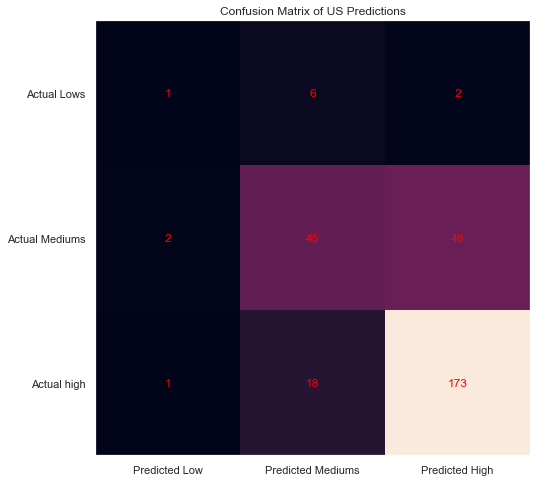

In [207]:
us_test_labels = np.array([y_test_US[i][2] for i in range(len(y_test_US))])
cm = metrics.confusion_matrix(us_test_labels, log_pred_hml_us)


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted Low', 'Predicted Mediums', 'Predicted High'))
ax.yaxis.set(ticks=(0, 1,2), ticklabels=('Actual Lows', 'Actual Mediums','Actual high'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Red')
plt.title('Confusion Matrix of US Predictions')
plt.show()


**Comment:**
- In the confusion matrix for the US we can see that the data is skewed heavily towards high earners as there are almost no 'low earners.' The biggest mistake the model makes is that the model thinks medium earners should be classified as high earners. 
- The confusion matrix reveals a fatal flaw in our preparation for US only data: HML was determined on a global scale, and not re-evaluated or US only. As a result, most of the US observations fall into the 'high' category, leading to a heavily biased distribution and potentially incorrect inferences.

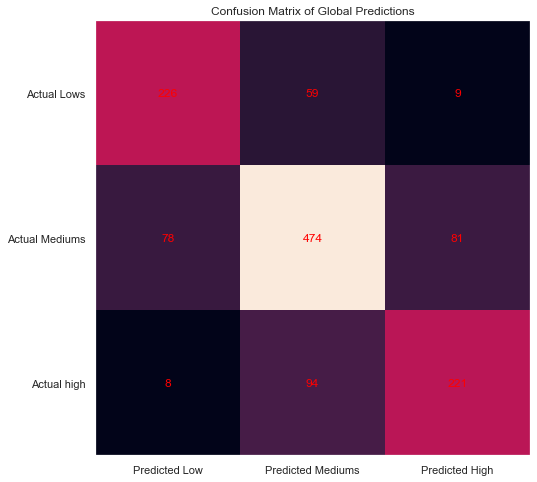

In [208]:
global_test_labels = np.array([y_test[i][2] for i in range(len(y_test))])
cm_2 = metrics.confusion_matrix(global_test_labels, log_pred_hml_global)


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_2)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted Low', 'Predicted Mediums', 'Predicted High'))
ax.yaxis.set(ticks=(0, 1,2), ticklabels=('Actual Lows', 'Actual Mediums','Actual high'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_2[i, j], ha='center', va='center', color='Red')
plt.title('Confusion Matrix of Global Predictions')
plt.show()


**Comment:**
- In the global model, we can see that the biggest problem the model has is in trying to predict medium expected earners. This is the biggest population, and is likely a reflection of our coefficients having insufficient statistical power to generate strong predictions, so the model learns to classify into the expected category when it is unsure.
- Overall, the Logistic regression classification models run into similar problems as previous models. None of our features represent strong indicators of compensation, and more data would be required to improve these models.

<hr style="border:2px solid gray"> </hr>

## 7.4 SVM Model Global Data

- In this section we will review the performance of SVM models in classifying our data.

### Linear SVM

### Compensation Bracket

##### Baseline SVM - Linear

In [198]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_std, y_train[:,1])
y_pred = svm_linear.predict(X_dev_std)
linear_default_f1 = f1_score(y_dev[:,1], y_pred, average='weighted')
print(f'Baseline F1 score: {linear_default_f1}')

Baseline F1 score: 0.23883099730377316


##### Improved SVM - Linear

In [130]:
Cs = {'C': [0.001, 0.01, 0.1, 0.5, .75, 1.0, 10]}

svm_linear = SVC(kernel='linear')
svm_linear_grid = GridSearchCV(estimator=svm_linear, param_grid=Cs, cv=5, scoring='f1_weighted')
svm_linear_grid.fit(X_train_std, y_train[:,1])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [131]:
df_linear_comp_global = pd.DataFrame(svm_linear_grid.cv_results_)

In [132]:
#display results
df_linear_comp_global.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C        params  split0_test_score  split1_test_score  \
2     0.1    {'C': 0.1}           0.234438           0.269076   
3     0.5    {'C': 0.5}           0.245316           0.255822   
4    0.75   {'C': 0.75}           0.243961           0.253382   
5     1.0    {'C': 1.0}           0.245584           0.253103   
6      10     {'C': 10}           0.249262           0.253549   
1    0.01   {'C': 0.01}           0.216813           0.238411   
0   0.001  {'C': 0.001}           0.150187           0.162863   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
2           0.243615           0.253100           0.256126         0.251271   
3           0.242917           0.251265           0.257097         0.250484   
4           0.243201           0.251534           0.259457         0.250307   
5           0.242160           0.249455           0.261114         0.250283   
6           0.241403           0.250541           0.255176         0.249986   
1           0.232137           0.239178           0.239922         0.233292   
0           0.151860           0.154533           0.161490         0.156187   

   std_test_score  rank_test_score  
2        0.011712                1  
3        0.005600                2  
4        0.006090                3  
5        0.006542                4  
6        0.004778                5  
1        0.008691                6  
0        0.005102                7

In [133]:
print("Best: %f using %s" % (svm_linear_grid.best_score_, svm_linear_grid.best_params_))

Best: 0.251271 using {'C': 0.1}


**Comment:**
- Linear SVM performs poorly, adjusting the C parameter doesn't make a difference.

---

### High, Medium, Low

##### Baseline SVM - Linear

In [189]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_std, y_train[:,2])
y_pred = svm_linear.predict(X_dev_std)
linear_default_f1 = f1_score(y_dev[:,2], y_pred, average='weighted')
print(f'Default F1 score: {linear_default_f1}')

Default F1 score: 0.7390422392231347


##### Improved SVM - Linear

In [190]:
Cs = {'C': [0.001, 0.01, 0.1, 0.5, .75, 1.0, 10, 100]}

svm_linear = SVC(kernel='linear')
svm_linear_grid = GridSearchCV(estimator=svm_linear, param_grid=Cs, cv=5, scoring='f1_weighted')
svm_linear_grid.fit(X_train_std, y_train[:,2])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [191]:
df_linear_HML_global = pd.DataFrame(svm_linear_grid.cv_results_)

In [192]:
#display results
df_linear_HML_global.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C        params  split0_test_score  split1_test_score  \
7     100    {'C': 100}           0.727756           0.719371   
6      10     {'C': 10}           0.727756           0.718527   
5     1.0    {'C': 1.0}           0.726055           0.718497   
4    0.75   {'C': 0.75}           0.726055           0.718497   
3     0.5    {'C': 0.5}           0.726055           0.718538   
2     0.1    {'C': 0.1}           0.725212           0.716809   
1    0.01   {'C': 0.01}           0.725455           0.703183   
0   0.001  {'C': 0.001}           0.718721           0.686533   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
7           0.724867           0.743116           0.746086         0.732239   
6           0.724867           0.742278           0.746086         0.731903   
5           0.726587           0.743955           0.744359         0.731891   
4           0.725706           0.743955           0.744359         0.731714   
3           0.722282           0.743116           0.744359         0.730870   
2           0.722305           0.743867           0.746073         0.730853   
1           0.707761           0.731192           0.736642         0.720847   
0           0.691271           0.702964           0.727433         0.705385   

   std_test_score  rank_test_score  
7        0.010489                1  
6        0.010530                2  
5        0.010417                3  
4        0.010512                4  
3        0.010779                5  
2        0.011858                6  
1        0.013122                7  
0        0.015649                8

In [193]:
print("Best: %f using %s" % (svm_linear_grid.best_score_, svm_linear_grid.best_params_))

Best: 0.732239 using {'C': 100}


**Comment:**
- Linear SVM performs okay, but the HML is not a viable outcome for a user.

---

### RBF SVM

### Compensation Bracket

##### Baseline SVM - RBF

In [199]:
svm_rbf = SVC(kernel='rbf',)
svm_rbf.fit(X_train_std, y_train[:,1])
y_pred = svm_rbf.predict(X_dev_std)
rbf_default_f1 = f1_score(y_dev[:,1], y_pred, average='weighted')
print(f'Default F1 score: {rbf_default_f1}')

Default F1 score: 0.23746094971155804


##### Improved SVM - RBF

In [95]:
cs_gamma = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100], 'gamma':['auto', 'scale']}

svm_rbf = SVC(kernel='rbf')
svm_rbf_grid = GridSearchCV(estimator=svm_rbf, param_grid=cs_gamma, cv=5, scoring='f1_weighted')
svm_rbf_grid.fit(X_train_std, y_train[:,1])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100],
                         'gamma': ['auto', 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [96]:
df_rbf_comp_global = pd.DataFrame(svm_rbf_grid.cv_results_)

In [97]:
#display results
df_rbf_comp_global.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C param_gamma                          params  split0_test_score  \
8      1.0        auto     {'C': 1.0, 'gamma': 'auto'}           0.236878   
9      1.0       scale    {'C': 1.0, 'gamma': 'scale'}           0.236914   
11      10       scale     {'C': 10, 'gamma': 'scale'}           0.207745   
10      10        auto      {'C': 10, 'gamma': 'auto'}           0.207745   
6      0.5        auto     {'C': 0.5, 'gamma': 'auto'}           0.218985   
7      0.5       scale    {'C': 0.5, 'gamma': 'scale'}           0.218985   
13     100       scale    {'C': 100, 'gamma': 'scale'}           0.191248   
12     100        auto     {'C': 100, 'gamma': 'auto'}           0.191248   
4      0.1        auto     {'C': 0.1, 'gamma': 'auto'}           0.123740   
5      0.1       scale    {'C': 0.1, 'gamma': 'scale'}           0.123740   
0    0.001        auto   {'C': 0.001, 'gamma': 'auto'}           0.018872   
1    0.001       scale  {'C': 0.001, 'gamma': 'scale'}           0.018872   
2     0.01        auto    {'C': 0.01, 'gamma': 'auto'}           0.018872   
3     0.01       scale   {'C': 0.01, 'gamma': 'scale'}           0.018872   

    split1_test_score  split2_test_score  split3_test_score  \
8            0.239706           0.260249           0.237912   
9            0.239706           0.259581           0.237912   
11           0.255075           0.238082           0.226795   
10           0.255075           0.238220           0.225861   
6            0.234180           0.223591           0.224340   
7            0.234180           0.222767           0.224327   
13           0.234709           0.229752           0.217738   
12           0.234709           0.228840           0.218514   
4            0.109892           0.097507           0.118399   
5            0.109892           0.097507           0.119135   
0            0.018903           0.018903           0.019207   
1            0.018903           0.018903           0.019207   
2            0.018903           0.018903           0.019207   
3            0.018903           0.018903           0.019207   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
8            0.243310         0.243611        0.008602                1  
9            0.241535         0.243130        0.008376                2  
11           0.238640         0.233267        0.015626                3  
10           0.238614         0.233103        0.015715                4  
6            0.214286         0.223077        0.006621                5  
7            0.214279         0.222908        0.006617                6  
13           0.227133         0.220116        0.015454                7  
12           0.227066         0.220075        0.015318                8  
4            0.120969         0.114101        0.009504                9  
5            0.119656         0.113986        0.009404               10  
0            0.018903         0.018957        0.000125               11  
1            0.018903         0.018957        0.000125               11  
2            0.018903         0.018957        0.000125               11  
3            0.018903         0.018957        0.000125               11

In [98]:
print("Best: %f using %s" % (svm_rbf_grid.best_score_, svm_rbf_grid.best_params_))

Best: 0.243611 using {'C': 1.0, 'gamma': 'auto'}


**Comment:**
- RBF SVM performs worst than linear. There's also barely any difference between the baseline RBF SVM and the tuned one.

---

### High, Medium Low

##### Baseline SVM - RBF

In [200]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_std, y_train[:,2])
y_pred = svm_rbf.predict(X_dev_std)
rbf_default_f1 = f1_score(y_dev[:,2], y_pred, average='weighted')
print(rbf_default_f1)

0.7461008162067407


##### Improved SVM - RBF

In [99]:
cs_gamma = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100], 'gamma':['auto', 'scale']}

svm_rbf = SVC(kernel='rbf')
svm_rbf_grid = GridSearchCV(estimator=svm_rbf, param_grid=cs_gamma, cv=5, scoring='f1_weighted')
svm_rbf_grid.fit(X_train_std, y_train[:,2])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100],
                         'gamma': ['auto', 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [100]:
df_rbf_HML_global = pd.DataFrame(svm_rbf_grid.cv_results_)

In [101]:
#display results
df_rbf_HML_global.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C param_gamma                          params  split0_test_score  \
8      1.0        auto     {'C': 1.0, 'gamma': 'auto'}           0.736720   
9      1.0       scale    {'C': 1.0, 'gamma': 'scale'}           0.736720   
7      0.5       scale    {'C': 0.5, 'gamma': 'scale'}           0.728508   
6      0.5        auto     {'C': 0.5, 'gamma': 'auto'}           0.728508   
11      10       scale     {'C': 10, 'gamma': 'scale'}           0.723045   
10      10        auto      {'C': 10, 'gamma': 'auto'}           0.723045   
4      0.1        auto     {'C': 0.1, 'gamma': 'auto'}           0.681754   
5      0.1       scale    {'C': 0.1, 'gamma': 'scale'}           0.681754   
12     100        auto     {'C': 100, 'gamma': 'auto'}           0.673170   
13     100       scale    {'C': 100, 'gamma': 'scale'}           0.673170   
0    0.001        auto   {'C': 0.001, 'gamma': 'auto'}           0.334762   
1    0.001       scale  {'C': 0.001, 'gamma': 'scale'}           0.334762   
2     0.01        auto    {'C': 0.01, 'gamma': 'auto'}           0.334762   
3     0.01       scale   {'C': 0.01, 'gamma': 'scale'}           0.334762   

    split1_test_score  split2_test_score  split3_test_score  \
8            0.724328           0.713212           0.741146   
9            0.724328           0.713212           0.741146   
7            0.711940           0.703866           0.733096   
6            0.711940           0.702979           0.733096   
11           0.711912           0.698793           0.728542   
10           0.711912           0.698793           0.729373   
4            0.675524           0.678751           0.688528   
5            0.674535           0.679620           0.688528   
12           0.666167           0.678156           0.677449   
13           0.666167           0.678156           0.677439   
0            0.335241           0.335241           0.335241   
1            0.335241           0.335241           0.335241   
2            0.335241           0.335241           0.335241   
3            0.335241           0.335241           0.335241   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
8            0.751097         0.733301        0.013221                1  
9            0.751097         0.733301        0.013221                1  
7            0.744759         0.724434        0.014723                3  
6            0.744759         0.724257        0.014973                4  
11           0.724132         0.717285        0.010748                5  
10           0.722399         0.717104        0.010734                6  
4            0.705009         0.685913        0.010469                7  
5            0.705009         0.685890        0.010563                8  
12           0.672652         0.673519        0.004287                9  
13           0.672652         0.673517        0.004285               10  
0            0.335241         0.335145        0.000191               11  
1            0.335241         0.335145        0.000191               11  
2            0.335241         0.335145        0.000191               11  
3            0.335241         0.335145        0.000191               11

In [102]:
print("Best: %f using %s" % (svm_rbf_grid.best_score_, svm_rbf_grid.best_params_))

Best: 0.733301 using {'C': 1.0, 'gamma': 'auto'}


## 7.5 SVM US Data

### Linear SVM

### Compensation Bracket

##### Baseline SVM - Linear

In [201]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_std_US, y_train_US[:,1])
y_pred = svm_linear.predict(X_dev_std_US)
linear_default_f1 = f1_score(y_dev_US[:,1], y_pred, average='weighted')
print(f'Default F1 score: {linear_default_f1}')

Default F1 score: 0.15482028638995676


##### Improved SVM - Linear

In [84]:
Cs = {'C': [0.001, 0.01, 0.1, 0.5, .75, 1.0, 10, 100]}

svm_linear = SVC(kernel='linear')
svm_linear_grid = GridSearchCV(estimator=svm_linear, param_grid=Cs, cv=5, scoring='f1_weighted')
svm_linear_grid.fit(X_train_std_US, y_train_US[:,1])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [85]:
df_linear_comp_us = pd.DataFrame(svm_linear_grid.cv_results_)

In [86]:
#display results
df_linear_comp_us.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C        params  split0_test_score  split1_test_score  \
7     100    {'C': 100}           0.151977           0.226787   
6      10     {'C': 10}           0.144840           0.221789   
5     1.0    {'C': 1.0}           0.142175           0.223836   
2     0.1    {'C': 0.1}           0.127854           0.210777   
4    0.75   {'C': 0.75}           0.147610           0.198297   
3     0.5    {'C': 0.5}           0.131392           0.208596   
1    0.01   {'C': 0.01}           0.127032           0.162823   
0   0.001  {'C': 0.001}           0.045713           0.043841   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
7           0.188349           0.163131           0.189396         0.183928   
6           0.188825           0.170612           0.189499         0.183113   
5           0.170226           0.170888           0.197207         0.180867   
2           0.180904           0.170702           0.195452         0.177138   
4           0.167608           0.174551           0.192364         0.176086   
3           0.174087           0.176609           0.184264         0.174990   
1           0.166709           0.160538           0.175080         0.158436   
0           0.043841           0.043978           0.046167         0.044708   

   std_test_score  rank_test_score  
7        0.025845                1  
6        0.025260                2  
5        0.027652                3  
2        0.028113                4  
4        0.018130                5  
3        0.024979                6  
1        0.016464                7  
0        0.001018                8

In [87]:
print("Best: %f using %s" % (svm_linear_grid.best_score_, svm_linear_grid.best_params_))

Best: 0.183928 using {'C': 100}


---

### High, Medium, Low

##### Baseline SVM - Linear

In [202]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_std_US, y_train_US[:,2])
y_pred = svm_linear.predict(X_dev_std_US)
linear_default_f1 = f1_score(y_dev_US[:,2], y_pred, average='weighted')
print(f'Default F1 score: {linear_default_f1}')

Default F1 score: 0.687766152023487


##### Improved SVM - Linear

In [88]:
Cs = {'C': [0.001, 0.01, 0.1, 0.5, .75, 1.0, 10, 100]}

svm_linear = SVC(kernel='linear')
svm_linear_grid = GridSearchCV(estimator=svm_linear, param_grid=Cs, cv=5, scoring='f1_weighted')
svm_linear_grid.fit(X_train_std_US, y_train_US[:,2])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [89]:
df_linear_HML_us = pd.DataFrame(svm_linear_grid.cv_results_)

In [90]:
#display results
df_linear_HML_us.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C        params  split0_test_score  split1_test_score  \
2     0.1    {'C': 0.1}           0.651838           0.706735   
6      10     {'C': 10}           0.656451           0.697422   
7     100    {'C': 100}           0.656451           0.692782   
3     0.5    {'C': 0.5}           0.656225           0.696108   
4    0.75   {'C': 0.75}           0.656451           0.693114   
5     1.0    {'C': 1.0}           0.656451           0.693114   
1    0.01   {'C': 0.01}           0.619746           0.622941   
0   0.001  {'C': 0.001}           0.528701           0.533333   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
2           0.692155           0.705854           0.704482         0.692213   
6           0.688815           0.698445           0.706633         0.689553   
7           0.694691           0.695460           0.706633         0.689203   
3           0.684619           0.702337           0.706633         0.689184   
4           0.674351           0.698445           0.706633         0.685799   
5           0.674351           0.698445           0.706633         0.685799   
1           0.675981           0.643778           0.676078         0.647705   
0           0.533333           0.533333           0.536439         0.533028   

   std_test_score  rank_test_score  
2        0.020869                1  
6        0.017487                2  
7        0.017080                3  
3        0.018069                4  
4        0.018110                5  
5        0.018110                5  
1        0.024556                7  
0        0.002475                8

In [91]:
print("Best: %f using %s" % (svm_linear_grid.best_score_, svm_linear_grid.best_params_))

Best: 0.692213 using {'C': 0.1}


---

## US Data - RBF SVM

### Compensation Bracket

##### Baseline SVM - RBF

In [203]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_std_US, y_train_US[:,1])
y_pred = svm_rbf.predict(X_dev_std_US)
rbf_default_f1 = f1_score(y_dev_US[:,1], y_pred, average='weighted')
print(f'Default F1 score: {rbf_default_f1}')

Default F1 score: 0.15126370280198245


##### Improved SVM - RBF

In [103]:
cs_gamma = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100], 'gamma':['auto', 'scale']}

svm_rbf = SVC(kernel='rbf')
svm_rbf_grid = GridSearchCV(estimator=svm_rbf, param_grid=cs_gamma, cv=5, scoring='f1_weighted')
svm_rbf_grid.fit(X_train_std_US, y_train_US[:,1])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100],
                         'gamma': ['auto', 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [104]:
df_rbf_comp_global = pd.DataFrame(svm_rbf_grid.cv_results_)

In [105]:
#display results
df_rbf_comp_global.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C param_gamma                          params  split0_test_score  \
9      1.0       scale    {'C': 1.0, 'gamma': 'scale'}           0.140369   
8      1.0        auto     {'C': 1.0, 'gamma': 'auto'}           0.140369   
10      10        auto      {'C': 10, 'gamma': 'auto'}           0.169161   
11      10       scale     {'C': 10, 'gamma': 'scale'}           0.172141   
12     100        auto     {'C': 100, 'gamma': 'auto'}           0.115447   
13     100       scale    {'C': 100, 'gamma': 'scale'}           0.108631   
7      0.5       scale    {'C': 0.5, 'gamma': 'scale'}           0.122888   
6      0.5        auto     {'C': 0.5, 'gamma': 'auto'}           0.120575   
5      0.1       scale    {'C': 0.1, 'gamma': 'scale'}           0.046732   
4      0.1        auto     {'C': 0.1, 'gamma': 'auto'}           0.046732   
0    0.001        auto   {'C': 0.001, 'gamma': 'auto'}           0.045713   
1    0.001       scale  {'C': 0.001, 'gamma': 'scale'}           0.045713   
2     0.01        auto    {'C': 0.01, 'gamma': 'auto'}           0.045713   
3     0.01       scale   {'C': 0.01, 'gamma': 'scale'}           0.045713   

    split1_test_score  split2_test_score  split3_test_score  \
9            0.171758           0.160551           0.152174   
8            0.171758           0.160551           0.152174   
10           0.141011           0.156002           0.144227   
11           0.141125           0.155891           0.144227   
12           0.155870           0.155617           0.160231   
13           0.156056           0.155617           0.160231   
7            0.148193           0.126429           0.129703   
6            0.148193           0.126426           0.129703   
5            0.066355           0.051038           0.061761   
4            0.066156           0.051038           0.061761   
0            0.043841           0.043841           0.043841   
1            0.043841           0.043841           0.043841   
2            0.043841           0.043841           0.043841   
3            0.043841           0.043841           0.043841   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
9            0.173670         0.159704        0.012423                1  
8            0.168046         0.158580        0.011312                2  
10           0.159153         0.153911        0.010243                3  
11           0.156095         0.153896        0.010939                4  
12           0.155467         0.148527        0.016635                5  
13           0.151231         0.146353        0.019075                6  
7            0.150294         0.135502        0.011445                7  
6            0.145101         0.134000        0.010777                8  
5            0.046023         0.054382        0.008214                9  
4            0.046023         0.054342        0.008156               10  
0            0.046023         0.044652        0.000998               11  
1            0.046023         0.044652        0.000998               11  
2            0.046023         0.044652        0.000998               11  
3            0.046023         0.044652        0.000998               11

In [106]:
print("Best: %f using %s" % (svm_rbf_grid.best_score_, svm_rbf_grid.best_params_))

Best: 0.159704 using {'C': 1.0, 'gamma': 'scale'}


---

### High, Medium Low

##### Baseline SVM - RBF

In [204]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_std_US, y_train_US[:,2])
y_pred = svm_rbf.predict(X_dev_std_US)
rbf_default_f1 = f1_score(y_dev_US[:,2], y_pred, average='weighted')
print(f'Default F1 score: {rbf_default_f1}')

Default F1 score: 0.6778909190881022


##### Improved SVM - RBF

In [107]:
cs_gamma = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100], 'gamma':['auto', 'scale']}

svm_rbf = SVC(kernel='rbf')
svm_rbf_grid = GridSearchCV(estimator=svm_rbf, param_grid=cs_gamma, cv=5, scoring='f1_weighted')
svm_rbf_grid.fit(X_train_std_US, y_train_US[:,2])


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100],
                         'gamma': ['auto', 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [108]:
df_rbf_HML_global = pd.DataFrame(svm_rbf_grid.cv_results_)

In [109]:
#display results
df_rbf_HML_global.iloc[:, 4:].sort_values('rank_test_score',ascending=True)

param_C param_gamma                          params  split0_test_score  \
8      1.0        auto     {'C': 1.0, 'gamma': 'auto'}           0.659147   
9      1.0       scale    {'C': 1.0, 'gamma': 'scale'}           0.656733   
10      10        auto      {'C': 10, 'gamma': 'auto'}           0.644622   
11      10       scale     {'C': 10, 'gamma': 'scale'}           0.640440   
7      0.5       scale    {'C': 0.5, 'gamma': 'scale'}           0.650855   
6      0.5        auto     {'C': 0.5, 'gamma': 'auto'}           0.650855   
12     100        auto     {'C': 100, 'gamma': 'auto'}           0.602312   
13     100       scale    {'C': 100, 'gamma': 'scale'}           0.592091   
0    0.001        auto   {'C': 0.001, 'gamma': 'auto'}           0.528701   
1    0.001       scale  {'C': 0.001, 'gamma': 'scale'}           0.528701   
2     0.01        auto    {'C': 0.01, 'gamma': 'auto'}           0.528701   
3     0.01       scale   {'C': 0.01, 'gamma': 'scale'}           0.528701   
4      0.1        auto     {'C': 0.1, 'gamma': 'auto'}           0.528701   
5      0.1       scale    {'C': 0.1, 'gamma': 'scale'}           0.528701   

    split1_test_score  split2_test_score  split3_test_score  \
8            0.675935           0.678589           0.662414   
9            0.675935           0.678589           0.662414   
10           0.670649           0.666530           0.663208   
11           0.670649           0.666530           0.663208   
7            0.655355           0.668363           0.641325   
6            0.655355           0.668363           0.641325   
12           0.628541           0.667467           0.641666   
13           0.624276           0.667467           0.641666   
0            0.533333           0.533333           0.533333   
1            0.533333           0.533333           0.533333   
2            0.533333           0.533333           0.533333   
3            0.533333           0.533333           0.533333   
4            0.533333           0.533333           0.533333   
5            0.533333           0.533333           0.533333   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
8            0.683303         0.671878        0.009420                1  
9            0.679108         0.670556        0.009208                2  
10           0.696739         0.668350        0.016757                3  
11           0.689029         0.665971        0.015578                4  
7            0.657611         0.654702        0.008824                5  
6            0.654868         0.654153        0.008710                6  
12           0.656469         0.639291        0.022705                7  
13           0.650271         0.635154        0.025643                8  
0            0.536439         0.533028        0.002475                9  
1            0.536439         0.533028        0.002475                9  
2            0.536439         0.533028        0.002475                9  
3            0.536439         0.533028        0.002475                9  
4            0.536439         0.533028        0.002475                9  
5            0.536439         0.533028        0.002475                9

In [110]:
print("Best: %f using %s" % (svm_rbf_grid.best_score_, svm_rbf_grid.best_params_))

Best: 0.671878 using {'C': 1.0, 'gamma': 'auto'}


**Comment:**
- US data across all SVM models performed worse than any other model.

---

### Winning SVM Model

The winning SVM model was the tuned linear SVM with C = .1 on the global data set. Even with turning the C parameter didn't help our F1 score. The difference between setting C .1 to 10 only fluctuated the F1 score by .001.

*Disclamer: When originally running these models it was on <= 250,000 but our final report is <250,000 which is why there may be slight difference from the presentation.*

To see how the final winning model compares to the test data we see that the F1 score is still incredibly low.

In [207]:
#Best model and parameters
svm_linear = SVC(kernel='linear', C = .1)
svm_linear.fit(X_train_std, y_train[:,1])

#predict
y_pred = svm_linear.predict(X_test_std)

#calculate F1 Score
linear_f1 = f1_score(y_test[:,1], y_pred, average='weighted')
print(f'Test Data: F1 score: {linear_f1}')

Test Data: F1 score: 0.24228563531756445


In [208]:
support_vector_indices = len(svm_linear.support_)
support_vectors_class = svm_linear.n_support_

print(f'Total Number of support vectors: {support_vector_indices}')
print(f'Total Number of support vectors per class: {support_vectors_class}')

Total Number of support vectors: 5699
Total Number of support vectors per class: [416 562 482 510 480 483 448 389 591 399 336 229 227 147]


**Comment:**

- After reviewing the confusion matrix on the test data we can see that it's having difficulty predicting all classes paticularly from 80,000 USD to 139,999 USD. 

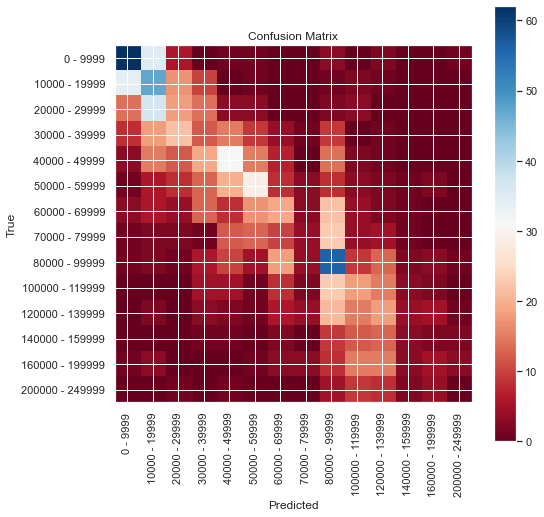

In [209]:
#create confusion matrix
cm = (confusion_matrix(y_test[:,1], y_pred))

#display confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(cm, cmap='RdBu')
plt.colorbar()
plt.title('Confusion Matrix')
ax.set_xticks(range(0,len(comp_cat[:14])), comp_cat[:14], rotation = 'vertical')
ax.set_yticks(range(0,len(comp_cat[:14])), comp_cat[:14])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Step 8: Final Model Prediction
- In this section we will evaluate our final model - XGBoost on the test data

In [18]:
# Predict compensation with XGBoostRegressor Best Model
# Best model overview
gs13.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', lambda=100, learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
# Predict test data
y_test_pred = gs13.best_estimator_.predict(X_test)
print('RMSE test data: %.2f' %np.sqrt(mean_squared_error(y_test[:,0], y_test_pred)))
print('R2 Score test data: %.3f' %r2_score(y_test[:,0], y_test_pred))

RMSE test data: 32615.69
R2 Score test data: 0.593


**Comment:**
- Using the best model with XGBoost, we got an R2 score of 0.593 and a RMSE \$32,615.69 on the test data. 

## Step 9: Conclusion
<br>

#### Best Model
- Using XGBoost Regressor with all 75 features for all countries in the dataset. 
- Best model performance:

<br>

|         Model        | RMSE Dev Data | R2 Score Dev Data |                                      Hyperparameters Tuning                                 |
|:---------------------|--------------:|------------------:|:--------------------------------------------------------------------------------------------|
| XGBoosting Regressor |     29,166.97 |             0.656 | max_depth=10, n_estimators=150, <br>colsample_bytree=0.5, lambda=100, <br>learning_rate=0.1 |

<br>

|       Model          | RMSE Test Data | R2 Score Test Data |
|:---------------------|--------------:|--------------------:|
| XGBoosting Regressor |     32,615.69 |               0.593 |

<br><br>


## Step 10: Limitations

Out of all these different models, we believe that the limitations of our models primarily lie with the data. We're restricted because we only have access to survey data. If we were to take this forward we would like to collect more data, specifically industry, state/metropolitan area and number of hours worked fields. We believe having this data would greatly improve our models.

Our models also take into consideration all different levels of work, i.e. full-time, part-time, contractor, we think that if we were to narrow down the scope to be just full-time we might also be able to get better results.

Another area of improvement would be to create different a outcome bracket for the classifiers. For all we know we just might not have the most optimal brackets. 

<hr style="border:2px solid gray"> </hr>

## Step 11: Contributions

Mai La: 
- Data cleaning & processing: 2.2. Skills, 2.3. Countries & compensation frequency
- EDA: 4.1. Compensation distribution, 4.2. Skills distribution, 4.3. Features distribution
- Model data: 5.1. All countries. Model Training - Continuous Target : Step 6
- Report: Initial writing, Project Summary & Conclusion. Presentation: Slides 8-11

Matt Pribadi: 
- Data cleaning: 2.1. Cleaned up Years Programmed (professionally and amature), Age, organizational size; 
- Developed framework for functions
- Modeling: 7.1 to 7.2. RandomForestClassification Model, US and Global data, Important Features EDA, Tree printing
- Presentation: Random Forest Model & Conclusion. Slides 12, 17
- Report: Editing

Charlie Boatwright: 
- Data Cleaning: 2.3 Categorical Features Ethnicity, Education, Gender, Sexual Orientation, Employment status
- Modeling: 7.3 US and Global categorical modeling with Logistic Regression and analysis
- Presentation: Introduction, EDA, (slides 1, 2, 3, 7) Logistic Regression slides 13 and 14
- Report: Editing

Jacquie Nesbitt:
- Data Master: 3 - 3.2 Made starting master data document combining 3 years of survey data, matched columns
- Data Cleaning: 2.1, also built the categorical outcome variables for the categorical models, age, country cleaning
- Modeling:  7.4 - 7.5 US and Global categorical modeling for SVM Linear and SVM Radial Basis Function
- Presentation: Build outline for baseline and final presentation, SVM Model and Limitations. Slides 13, 14, 18
- Report: Edits and responsible for submission
- Project Management: team notes, meetings, timeline management
